# Análisis Paleontológico Comparativo y Geográfico de Fósiles entre Chile, Argentina y la Antártida

## Contexto y Motivación

La paleontología es una disciplina científica que estudia la historia de la vida en la Tierra a través de los fósiles, proporcionando una ventana única hacia los ecosistemas y la biodiversidad de épocas pasadas. En regiones como Chile, Argentina y la Antártida, los hallazgos fósiles ofrecen una oportunidad invaluable para estudiar la evolución de las especies y los ecosistemas.

Según Alexander Vargas, director de la Red Paleontológica de la Universidad de Chile, en un reportaje de *La Tercera*, Chile posee episodios únicos en la evolución del planeta, dados por su geografía, que aún permanecen en gran parte sin ser revelados. Sin embargo, a pesar de la relevancia científica de estos hallazgos, la paleontología ha sido un área del conocimiento subestimada en Chile, tanto a nivel académico como en términos de inversión en investigación.

Una de las bases fundamentales de este proyecto es la teoría de la deriva continental, la cual sostiene que los continentes actuales no siempre han estado en las mismas posiciones. Hace millones de años, Sudamérica, la Antártida y otras regiones formaban parte del supercontinente Gondwana. A medida que estos enormes bloques de tierra se desplazaban sobre la superficie terrestre, las especies que los habitaban también migraban y se adaptaban a los cambios geográficos y climáticos.

Los fósiles encontrados en Chile, Argentina y la Antártida nos brindan una oportunidad única para estudiar cómo estaba conectada la vida entre estas regiones en el pasado. Al identificar y analizar estos fósiles, podemos reconstruir la historia de cómo especies como dinosaurios, plantas o moluscos migraron y evolucionaron en respuesta a los movimientos tectónicos. Este análisis nos permitirá entender mejor los patrones biogeográficos y las conexiones ecológicas entre estas áreas durante diferentes períodos geológicos.




## Preguntas Objetivo

1. **¿Cuáles son las especies fósiles más comunes en cada una de las tres regiones (Chile, Argentina y Antártida)?**
   - Esta pregunta busca identificar las especies predominantes en cada región y establecer patrones de dominancia taxonómica.

2. **¿Qué diferencias y similitudes existen en la biodiversidad fósil entre estas regiones a lo largo de diferentes eras geológicas?**
   - A través de índices de biodiversidad, esta pregunta analiza la riqueza y equitatividad de las especies fósiles, proporcionando un marco comparativo entre las regiones.

3. **¿Cómo varía la distribución de especies fósiles a lo largo del tiempo en cada región?**
   - Busca comprender cómo los cambios geológicos y climáticos han afectado la distribución de las especies fósiles a lo largo de diferentes períodos geológicos.

4. **¿Existen similitudes en la distribución de especies fósiles entre las costas de Chile y Argentina durante períodos geológicos específicos?**
   - Investiga posibles conexiones biogeográficas entre las costas de estas regiones, considerando su historia tectónica compartida.

5. **¿Cómo se distribuyen las especies fósiles en Chile según sus hábitos alimenticios y ubicación geográfica?**
   - Esta pregunta evolucionó durante el desarrollo del proyecto. Inicialmente enfocada en las tres regiones, el análisis se limitó a Chile, aplicando un modelo de clustering (K-means) para identificar patrones espaciales y ecológicos basados en dieta y ubicación.

---

### Evolución de las Preguntas

- **Originalidad de las preguntas**:
  - Las preguntas 1 a 4 permanecieron prácticamente intactas desde el inicio del proyecto, ya que se ajustan directamente a los objetivos principales del análisis.

- **Evolución de la pregunta 5**:
  - Inicialmente, esta pregunta abarcaba las tres regiones (Chile, Argentina y Antártida) para analizar la distribución según dieta. Sin embargo, durante el desarrollo, se decidió centrar el análisis en Chile y aplicar un modelo de clustering para identificar patrones específicos.

- **Aparición de nuevas preguntas**:
  - Durante el análisis, surgieron preguntas exploratorias relacionadas con niveles taxonómicos más amplios (géneros, familias, órdenes) para entender si los patrones observados a nivel de especies se mantenían en niveles superiores.
  - Adicionalmente, se planteó investigar la influencia de la era geológica en la distribución de especies dentro de Chile.

## **Datos**

#### **Fuente**
Los datos utilizados en este proyecto provienen de la plataforma **Paleobiology Database (PBDB)**, una base de datos colaborativa y abierta que recopila información sobre fósiles a nivel global. Esta plataforma es una de las más completas para estudios paleontológicos y permite explorar aspectos relacionados con la biodiversidad a lo largo del tiempo geológico.





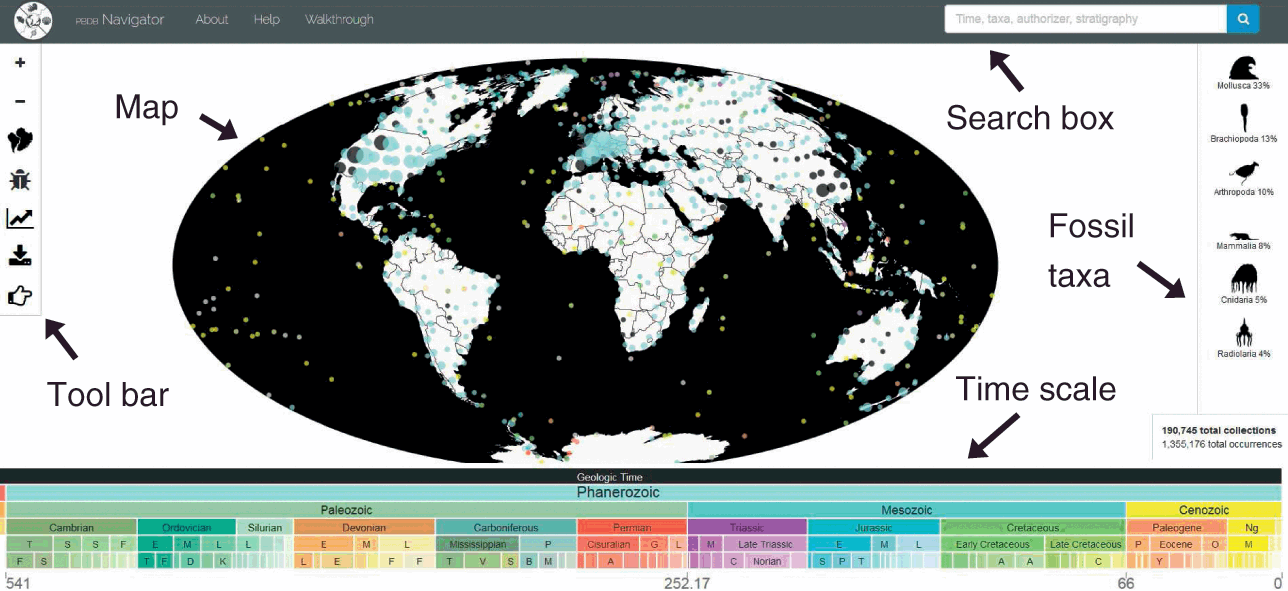

In [13]:
from IPython.display import Image
Image(filename=r'data\img\paleobio.png')

#### **Procedimientos de recolección**
1. **Fuente de descarga:** Utilizamos el apartado **Download** de PBDB, seleccionando la opción `Occurrences` para obtener datos de ubicación de fósiles.
2. **Filtros aplicados:**
   - Regiones geográficas: Chile, Argentina y la Antártida.
   - Todos los períodos geológicos
3. **Formato de exportación:** Archivos CSV (`Comma-separated values`) con todos los parámetros disponibles (`Show all available parameters`) para maximizar la información recolectada.
4. **Visualización del procedimiento:** A continuación, se muestra la interfaz utilizada para la recolección:

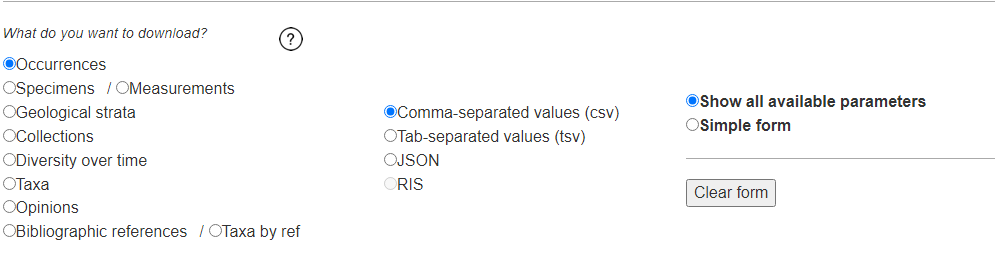

In [15]:
from IPython.display import Image
Image(filename=r'data\img\downloadbio.png')

#### **Preparación de datos**
1. **Revisión inicial:** Los datos descargados fueron revisados para eliminar duplicados y registros con información faltante en las variables clave:
   - Coordenadas geográficas (`lat`, `lng`).
   - Clasificación taxonómica (`family`, `genus`, `species`, etc.).
   - Ambiente (`environment`).
2. **Transformación de variables:**
   - Clasificación de los registros por períodos geológicos (`early_interval`, `late_interval`).
   - Creación de nuevas variables derivadas, como `diet`, que clasifica a las especies por hábitos alimenticios (carnívoros, herbívoros, etc.).
3. **Agrupación de sub-eras en eras generales:**
   - Las sub-eras y períodos geológicos específicos (`early_interval`, `late_interval`) fueron consolidados en eras más generales para facilitar el análisis y la visualización. Por ejemplo:
     - `Upper Permian` y `Lower Permian` fueron agrupados bajo **Permian**.
     - `Middle Jurassic` y `Lower Jurassic` bajo **Jurassic**.
     - Otros períodos como `Neogene`, `Quaternary` y `Cretaceous` mantuvieron sus nombres originales.
   - Este agrupamiento permite identificar patrones temporales más claros en las especies fósiles.

   A continuación un ejemplo visual de la agrupación utilizada:

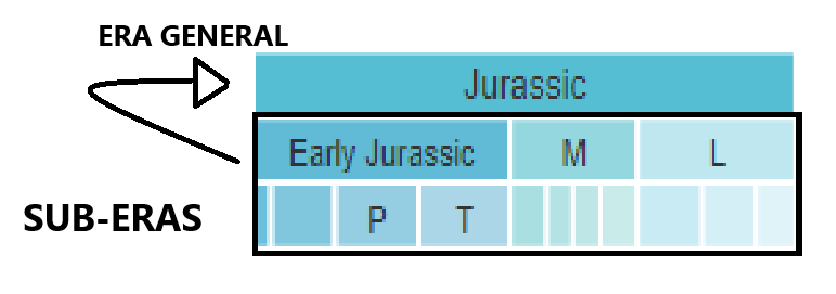

In [17]:
from IPython.display import Image
Image(filename=r'data\img\ejemplosuberas.png')

- **Elementos descritos:**
  - Coordenadas geográficas.
  - Clasificación taxonómica jerárquica (desde phylum hasta species).
  - Tipos de ambiente asociados a los fósiles.
  - Períodos geológicos en los que existieron las especies, agrupados en eras generales.
  - Hábitos alimenticios, cuando están disponibles.
  - Código único de identificación de cada registro fósil.

  En particular:

  - `accepted_name`: Nombre aceptado del fósil.
  - `lat`, `lng`: Coordenadas geográficas. (Latitud y Longitud)
  - `family`, `genus`, `species`, `order`, `class`, `phylum`: Clasificación taxonómica.
  - `environment`: Tipo de ambiente (marino, terrestre, etc.).
  - `early_interval`, `late_interval`: Períodos geológicos.
  - `diet`: Hábitos alimenticios.
  - `ocurrence_no`: Código único identificador del registro fósil, utilizado para distinguir registros y evitar duplicados.


## Limpieza y EDA

El análisis exploratorio inicial se centró en la limpieza de los datos, asegurando consistencia en las variables clave, como nombres taxonómicos, ambientes y coordenadas geográficas. Para explorar la única variable directamente modelable (latitud y longitud), se construyó un mapa de distribución de fósiles para Chile. 

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
import os
import seaborn as sns

In [2]:
chile_df = pd.read_csv('data/chile.csv',  low_memory=False)
argentina_df = pd.read_csv('data/argentina.csv',  low_memory=False)
antartica_df = pd.read_csv('data/antartica.csv',  low_memory=False)

In [3]:
chile_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9481 entries, 0 to 9480
Data columns (total 146 columns):
 #    Column               Dtype  
---   ------               -----  
 0    occurrence_no        int64  
 1    record_type          object 
 2    reid_no              float64
 3    flags                object 
 4    collection_no        int64  
 5    accepted_name        object 
 6    accepted_attr        float64
 7    accepted_rank        object 
 8    accepted_no          float64
 9    early_interval       object 
 10   late_interval        object 
 11   max_ma               float64
 12   min_ma               float64
 13   ref_author           object 
 14   ref_pubyr            int64  
 15   reference_no         int64  
 16   phylum               object 
 17   phylum_no            object 
 18   class                object 
 19   class_no             object 
 20   order                object 
 21   order_no             object 
 22   family               object 
 23   family_no  

In [4]:
argentina_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31881 entries, 0 to 31880
Data columns (total 146 columns):
 #    Column               Dtype  
---   ------               -----  
 0    occurrence_no        int64  
 1    record_type          object 
 2    reid_no              float64
 3    flags                object 
 4    collection_no        int64  
 5    accepted_name        object 
 6    accepted_attr        float64
 7    accepted_rank        object 
 8    accepted_no          float64
 9    early_interval       object 
 10   late_interval        object 
 11   max_ma               float64
 12   min_ma               float64
 13   ref_author           object 
 14   ref_pubyr            int64  
 15   reference_no         int64  
 16   phylum               object 
 17   phylum_no            object 
 18   class                object 
 19   class_no             object 
 20   order                object 
 21   order_no             object 
 22   family               object 
 23   family_no

In [5]:
antartica_df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11311 entries, 0 to 11310
Data columns (total 146 columns):
 #    Column               Dtype  
---   ------               -----  
 0    occurrence_no        int64  
 1    record_type          object 
 2    reid_no              float64
 3    flags                object 
 4    collection_no        int64  
 5    accepted_name        object 
 6    accepted_attr        float64
 7    accepted_rank        object 
 8    accepted_no          float64
 9    early_interval       object 
 10   late_interval        object 
 11   max_ma               float64
 12   min_ma               float64
 13   ref_author           object 
 14   ref_pubyr            int64  
 15   reference_no         int64  
 16   phylum               object 
 17   phylum_no            object 
 18   class                object 
 19   class_no             object 
 20   order                object 
 21   order_no             object 
 22   family               object 
 23   family_no

In [6]:
columns = [
    'species_name',
    'occurrence_no',
    'accepted_name',
    'early_interval',
    'late_interval',
    'phylum',
    'class',
    'order',
    'family',
    'genus',
    'lat',
    'lng',
    'diet',
    'life_habit',
    "environment",
    "taxon_environment",
    "primary_name"
]

chile_df = chile_df[columns].copy()
argentina_df = argentina_df[columns].copy()
antartica_df = antartica_df[columns].copy()

Veamos si tenemos duplicados

In [8]:
obtener_duplicados_chile = chile_df.duplicated(keep=False)
datos_duplicados_chile = chile_df[obtener_duplicados_chile]
datos_duplicados_chile

Empty DataFrame
Columns: [species_name, occurrence_no, accepted_name, early_interval, late_interval, phylum, class, order, family, genus, lat, lng, diet, life_habit, environment, taxon_environment, primary_name]
Index: []

In [9]:
obtener_duplicados_argentina = argentina_df.duplicated(keep=False)
datos_duplicados_argentina = argentina_df[obtener_duplicados_argentina]
datos_duplicados_argentina

Empty DataFrame
Columns: [species_name, occurrence_no, accepted_name, early_interval, late_interval, phylum, class, order, family, genus, lat, lng, diet, life_habit, environment, taxon_environment, primary_name]
Index: []

In [10]:
obtener_duplicados_antartica = antartica_df.duplicated(keep=False)
datos_duplicados_antartica = antartica_df[obtener_duplicados_antartica]
datos_duplicados_antartica

Empty DataFrame
Columns: [species_name, occurrence_no, accepted_name, early_interval, late_interval, phylum, class, order, family, genus, lat, lng, diet, life_habit, environment, taxon_environment, primary_name]
Index: []

Notamos que no hay datos duplicados, por ende no es necesario realizar ninguna acción adicional.


In [12]:
chile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9481 entries, 0 to 9480
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_name       9481 non-null   object 
 1   occurrence_no      9481 non-null   int64  
 2   accepted_name      9343 non-null   object 
 3   early_interval     9481 non-null   object 
 4   late_interval      1605 non-null   object 
 5   phylum             9337 non-null   object 
 6   class              9292 non-null   object 
 7   order              9123 non-null   object 
 8   family             8914 non-null   object 
 9   genus              8574 non-null   object 
 10  lat                9481 non-null   float64
 11  lng                9481 non-null   float64
 12  diet               8749 non-null   object 
 13  life_habit         8743 non-null   object 
 14  environment        9402 non-null   object 
 15  taxon_environment  5847 non-null   object 
 16  primary_name       9481 

In [13]:
argentina_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31881 entries, 0 to 31880
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_name       31881 non-null  object 
 1   occurrence_no      31881 non-null  int64  
 2   accepted_name      31253 non-null  object 
 3   early_interval     31881 non-null  object 
 4   late_interval      5288 non-null   object 
 5   phylum             31226 non-null  object 
 6   class              31038 non-null  object 
 7   order              29738 non-null  object 
 8   family             29056 non-null  object 
 9   genus              27398 non-null  object 
 10  lat                31881 non-null  float64
 11  lng                31881 non-null  float64
 12  diet               24717 non-null  object 
 13  life_habit         22808 non-null  object 
 14  environment        31192 non-null  object 
 15  taxon_environment  18471 non-null  object 
 16  primary_name       318

In [14]:
antartica_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11311 entries, 0 to 11310
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_name       11311 non-null  object 
 1   occurrence_no      11311 non-null  int64  
 2   accepted_name      10977 non-null  object 
 3   early_interval     11311 non-null  object 
 4   late_interval      2888 non-null   object 
 5   phylum             10960 non-null  object 
 6   class              10926 non-null  object 
 7   order              10744 non-null  object 
 8   family             10604 non-null  object 
 9   genus              10375 non-null  object 
 10  lat                11311 non-null  float64
 11  lng                11311 non-null  float64
 12  diet               7706 non-null   object 
 13  life_habit         6012 non-null   object 
 14  environment        10351 non-null  object 
 15  taxon_environment  5410 non-null   object 
 16  primary_name       113

Hacemos el grupeo por era geologica

In [16]:
chile_df['era_early'] = None
argentina_df['era_early'] = None
antartica_df['era_early'] = None

In [17]:
chile_df['era_late'] = None
argentina_df['era_late'] = None
antartica_df['era_late'] = None

In [18]:
cambrian_intervals = [
    "Early Terreneuvian", "Middle Terreneuvian", "Late Terreneuvian", "Terreneuvian",
    "Early Series 2", "Middle Series 2", "Late Series 2", "Series 2",
    "Early Miaolingian", "Middle Miaolingian", "Late Miaolingian", "Miaolingian",
    "Early Furongian", "Middle Furongian", "Late Furongian", "Furongian",
    "Early Fortunian", "Middle Fortunian", "Late Fortunian", "Fortunian",
    "Early Stage 2", "Middle Stage 2", "Late Stage 2", "Stage 2",
    "Early Stage 3", "Middle Stage 3", "Late Stage 3", "Stage 3",
    "Early Stage 4", "Middle Stage 4", "Late Stage 4", "Stage 4",
    "Early Wuliuan", "Middle Wuliuan", "Late Wuliuan", "Wuliuan",
    "Early Drumian", "Middle Drumian", "Late Drumian", "Drumian",
    "Early Guzhangian", "Middle Guzhangian", "Late Guzhangian", "Guzhangian",
    "Early Paibian", "Middle Paibian", "Late Paibian", "Paibian",
    "Early Jiangshanian", "Middle Jiangshanian", "Late Jiangshanian", "Jiangshanian",
    "Early Stage 10", "Middle Stage 10", "Late Stage 10", "Stage 10","Middle Cambrian", "Atdabanian",
    "Toyonian", "Botomian", "Early Cambrian", 'Floran', 'Lenian', 'Dresbachian',
    'Dolgellian', 'Merioneth', 'Trempealeauan', 'Idamean',
       'Sunwaptan','St Davids', 'Solvan', 'Dyeran', 'Wonokan',
        'Tulean', 'Blackhillsian'

]


silurian_intervals = [
    "Early Rhuddanian", "Middle Rhuddanian", "Late Rhuddanian", "Rhuddanian",
    "Early Aeronian", "Middle Aeronian", "Late Aeronian", "Aeronian",
    "Early Telychian", "Middle Telychian", "Late Telychian", "Telychian",
    "Early Sheinwoodian", "Middle Sheinwoodian", "Late Sheinwoodian", "Sheinwoodian",
    "Early Homerian", "Middle Homerian", "Late Homerian", "Homerian",
    "Early Gorstian", "Middle Gorstian", "Late Gorstian", "Gorstian",
    "Early Ludfordian", "Middle Ludfordian", "Late Ludfordian", "Ludfordian",
    "Early Llandovery", "Middle Llandovery", "Late Llandovery", "Llandovery",
    "Early Wenlock", "Middle Wenlock", "Late Wenlock", "Wenlock",
    "Early Ludlow", "Middle Ludlow", "Late Ludlow", "Ludlow",
    "Early Pridoli", "Middle Pridoli", "Late Pridoli", "Pridoli"
]


devonian_intervals = [
    "Early Lochkovian", "Middle Lochkovian", "Late Lochkovian", "Lochkovian",
    "Early Pragian", "Middle Pragian", "Late Pragian", "Pragian",
    "Early Emsian", "Middle Emsian", "Late Emsian", "Emsian",
    "Early Eifelian", "Middle Eifelian", "Late Eifelian", "Eifelian",
    "Early Givetian", "Middle Givetian", "Late Givetian", "Givetian",
    "Early Fransnian", "Middle Fransnian", "Late Fransnian", "Fransnian",
    "Early Famennian", "Middle Famennian", "Late Famennian", "Famennian",
    "Early Devonian", "Middle Devonian", "Late Devonian"
]


carboniferous_intervals = [
    "Early Tournaisian", "Middle Tournaisian", "Late Tournaisian", "Tournaisian",
    "Early Visean", "Middle Visean", "Late Visean", "Visean",
    "Early Serpukhovian", "Middle Serpukhovian", "Late Serpukhovian", "Serpukhovian",
    "Early Bashkirian", "Middle Bashkirian", "Late Bashkirian", "Bashkirian",
    "Early Moscovian", "Middle Moscovian", "Late Moscovian", "Moscovian",
    "Early Kasimovian", "Middle Kasimovian", "Late Kasimovian", "Kasimovian",
    "Early Gzhelian", "Middle Gzhelian", "Late Gzhelian", "Gzhelian",
    "Early Mississippian", "Middle Mississippian", "Late Mississippian", "Mississippian",
    "Early Pennsylvanian", "Middle Pennsylvanian", "Late Pennsylvanian", "Pennsylvanian",
    'Namurian', 'Virgilian', "Arnsbergian", 
]

permian_intervals = [
    "Early Asselian", "Middle Asselian", "Late Asselian", "Asselian",
    "Early Sakmarian", "Middle Sakmarian", "Late Sakmarian", "Sakmarian",
    "Early Artinskian", "Middle Artinskian", "Late Artinskian", "Artinskian",
    "Early Kungurian", "Middle Kungurian", "Late Kungurian", "Kungurian",
    "Early Roadian", "Middle Roadian", "Late Roadian", "Roadian",
    "Early Wordian", "Middle Wordian", "Late Wordian", "Wordian",
    "Early Capitanian", "Middle Capitanian", "Late Capitanian", "Capitanian",
    "Early Wuchiapingian", "Middle Wuchiapingian", "Late Wuchiapingian", "Wuchiapingian",
    "Early Changhsingian", "Middle Changhsingian", "Late Changhsingian", "Changhsingian",
    "Early Cisuralian", "Middle Cisuralian", "Late Cisuralian", "Cisuralian",
    "Early Guadalupian", "Middle Guadalupian", "Late Guadalupian", "Guadalupian",
    "Early Lopingian", "Middle Lopingian", "Late Lopingian", "Lopingian"
]


ordovician_intervals = [
    "Early Ordovician", "Middle Ordovician", "Late Ordovician",
    "Early Tremadocian", "Middle Tremadocian", "Late Tremadocian", "Tremadocian",
    "Early Floian", "Middle Floian", "Late Floian", "Floian",
    "Early Dapingian", "Middle Dapingian", "Late Dapingian", "Dapingian",
    "Early Darriwilian", "Middle Darriwilian", "Late Darriwilian", "Darriwilian",
    "Early Sandbian", "Middle Sandbian", "Late Sandbian", "Sandbian",
    "Early Katian", "Middle Katian", "Late Katian", "Katian",
    "Early Hirnantian", "Middle Hirnantian", "Late Hirnantian", "Hirnantian",
    'Arenig', 'Early Llanvirn', 'Ibex', 'Tremadoc', 'Llanvirn', 'Gisbornian',
    'Caradoc', 'Early Llandeilo','Costonian', 'Actonian', 'Late Llandeilo',
    'Longvillian', 'Llandeilo', 'Arenigian', 'Late Llanvirn', 'Whiterockian',
    'Skullrockian', 'Stairsian'
]

triassic_intervals = [
    "Early Induan", "Middle Induan", "Late Induan", "Induan",
    "Early Anisian", "Middle Anisian", "Late Anisian", "Anisian",
    "Early Ladinian", "Middle Ladinian", "Late Ladinian", "Ladinian",
    "Early Carnian", "Middle Carnian", "Late Carnian", "Carnian",
    "Early Norian", "Middle Norian", "Late Norian", "Norian",
    "Early Rhaetian", "Middle Rhaetian", "Late Rhaetian", "Rhaetian",
    "Early Triassic", "Middle Triassic", "Late Triassic", 'Sevatian',
    'Olenekian', 'Longobardian'
]


neogene_intervals = [
    "Early Miocene", "Middle Miocene", "Late Miocene", "Miocene",
    "Early Pliocene", "Middle Pliocene", "Late Pliocene", "Pliocene",
    "Early Aquitanian", "Middle Aquitanian", "Late Aquitanian", "Aquitanian",
    "Early Burdigalian", "Middle Burdigalian", "Late Burdigalian", "Burdigalian",
    "Early Langhian", "Middle Langhian", "Late Langhian", "Langhian",
    "Early Serrevallian", "Middle Serrevallian", "Late Serrevallian", "Serrevallian",
    "Early Tortonian", "Middle Tortonian", "Late Tortonian", "Tortonian",
    "Early Messinian", "Middle Messinian", "Late Messinian", "Messinian",
    "Early Zanclean", "Middle Zanclean", "Late Zanclean", "Zanclean",
    "Early Piacenzian", "Middle Piacenzian", "Late Piacenzian", "Piacenzian",
    'Serravallian', 'Colhuehuapian', 'Santacrucian','Friasian',
    'Chasicoan', 'Montehermosan', 'Huayquerian', 'Chapadmalalan',
    'Colloncuran', 'Mayoan'
]


quaternary_intervals = [
    "Early Pleistocene", "Middle Pleistocene", "Late Pleistocene", "Pleistocene",
    "Early Gelasian", "Middle Gelasian", "Late Gelasian", "Gelasian",
    "Early Calabrian", "Middle Calabrian", "Late Calabrian", "Calabrian",
    "Early Chibanian", "Middle Chibanian", "Late Chibanian", "Chibanian",
    'Holocene', 'Lujanian', 'Ensenadan', 'Ionian', 'Uquian'
]


jurassic_intervals = [
    "Early Hettangian", "Middle Hettangian", "Late Hettangian", "Hettangian",
    "Early Sinemurian", "Middle Sinemurian", "Late Sinemurian", "Sinemurian",
    "Early Pliensbachian", "Middle Pliensbachian", "Late Pliensbachian", "Pliensbachian",
    "Early Toarcian", "Middle Toarcian", "Late Toarcian", "Toarcian",
    "Early Aalenian", "Middle Aalenian", "Late Aalenian", "Aalenian",
    "Early Bajocian", "Middle Bajocian", "Late Bajocian", "Bajocian",
    "Early Bathonian", "Middle Bathonian", "Late Bathonian", "Bathonian",
    "Early Callovian", "Middle Callovian", "Late Callovian", "Callovian",
    "Early Oxfordian", "Middle Oxfordian", "Late Oxfordian", "Oxfordian",
    "Early Kimmeridgian", "Middle Kimmeridgian", "Late Kimmeridgian", "Kimmeridgian",
    "Early Tithonian", "Middle Tithonian", "Late Tithonian", "Tithonian",
    "Early Jurassic", "Middle Jurassic", "Late Jurassic", 'Planorbis',
    'Margaritatus', 'Variabilis', 'Opalinum','Angulata', 'Obtusum',
    'Falciferum', 'Bifrons', 'Murchisonae', 'Jamesoni', 'Spinatum',
    'Davoei', 'Liasicus', 'Bucklandi', 'Concavum'
]


paleogene_intervals = [
    "Early Paleocene", "Middle Paleocene", "Late Paleocene", "Paleocene",
    "Early Eocene", "Middle Eocene", "Late Eocene", "Eocene",
    "Early Oligocene", "Middle Oligocene", "Late Oligocene", "Oligocene",
    "Early Danian", "Middle Danian", "Late Danian", "Danian",
    "Early Selandian", "Middle Selandian", "Late Selandian", "Selandian",
    "Early Thanetian", "Middle Thanetian", "Late Thanetian", "Thanetian",
    "Early Ypresian", "Middle Ypresian", "Late Ypresian", "Ypresian",
    "Early Lutetian", "Middle Lutetian", "Late Lutetian", "Lutetian",
    "Early Bartonian", "Middle Bartonian", "Late Bartonian", "Bartonian",
    "Early Priabonian", "Middle Priabonian", "Late Priabonian", "Priabonian",
    "Early Rupelian", "Middle Rupelian", "Late Rupelian", "Rupelian",
    "Early Chattian", "Middle Chattian", "Late Chattian", "Chattian",
    'Casamayoran', 'Tinguirirican', 'Riochican', 'Deseadan', 'Mustersan',
    'Divisaderan'
]

cretaceous_intervals = [
    "Early Berriasian", "Middle Berriasian", "Late Berriasian", "Berriasian",
    "Early Valanginian", "Middle Valanginian", "Late Valanginian", "Valanginian",
    "Early Hauterivian", "Middle Hauterivian", "Late Hauterivian", "Hauterivian",
    "Early Barremian", "Middle Barremian", "Late Barremian", "Barremian",
    "Early Aptian", "Middle Aptian", "Late Aptian", "Aptian",
    "Early Albian", "Middle Albian", "Late Albian", "Albian",
    "Early Cenomanian", "Middle Cenomanian", "Late Cenomanian", "Cenomanian",
    "Early Turonian", "Middle Turonian", "Late Turonian", "Turonian",
    "Early Coniacian", "Middle Coniacian", "Late Coniacian", "Coniacian",
    "Early Santonian", "Middle Santonian", "Late Santonian", "Santonian",
    "Early Campanian", "Middle Campanian", "Late Campanian", "Campanian",
    "Early Maastrichtian", "Middle Maastrichtian", "Late Maastrichtian", "Maastrichtian",
    "Early Cretaceous", "Late Cretaceous", 'Neocomian','Senonian'
]

ediacaran_intervals = ["Ediacaran"]

cryogenian_intervals = ["Cryogenian"]

tonian_intervals = ["Tonian"]

siderian_intervals = ["Siderian"]
rhyacian_intervals = ["Rhyacian"]
orosirian_intervals = ["Orosirian"]
statherian_intervals = ["Statherian"]
calymmian_intervals = ["Calymmian"]
ectasian_intervals = ["Ectasian"]
stenian_intervals = ["Stenian"]

nan = [np.nan]

In [19]:
def assign_era(row):
    if row['early_interval'] in cambrian_intervals:
        return 'Cambrian'
    elif row['early_interval'] in ordovician_intervals:
        return 'Ordovician'
    elif row['early_interval'] in silurian_intervals:
        return 'Silurian'
    elif row['early_interval'] in devonian_intervals:
        return 'Devonian'
    elif row['early_interval'] in carboniferous_intervals:
        return 'Carboniferous'
    elif row['early_interval'] in permian_intervals:
        return 'Permian'
    elif row['early_interval'] in triassic_intervals:
        return 'Triassic'
    elif row['early_interval'] in jurassic_intervals:
        return 'Jurassic'
    elif row['early_interval'] in cretaceous_intervals:
        return 'Cretaceous'
    elif row['early_interval'] in paleogene_intervals:
        return 'Paleogene'
    elif row['early_interval'] in neogene_intervals:
        return 'Neogene'
    elif row['early_interval'] in quaternary_intervals:
        return 'Quaternary'
    elif row['early_interval'] in nan:
        return "No especificado"
    else:
        return row['early_interval']

In [20]:
def assign_era_late(row):
    if row['late_interval'] in cambrian_intervals:
        return 'Cambrian'
    elif row['late_interval'] in ordovician_intervals:
        return 'Ordovician'
    elif row['late_interval'] in silurian_intervals:
        return 'Silurian'
    elif row['late_interval'] in devonian_intervals:
        return 'Devonian'
    elif row['late_interval'] in carboniferous_intervals:
        return 'Carboniferous'
    elif row['late_interval'] in permian_intervals:
        return 'Permian'
    elif row['late_interval'] in triassic_intervals:
        return 'Triassic'
    elif row['late_interval'] in jurassic_intervals:
        return 'Jurassic'
    elif row['late_interval'] in cretaceous_intervals:
        return 'Cretaceous'
    elif row['late_interval'] in paleogene_intervals:
        return 'Paleogene'
    elif row['late_interval'] in neogene_intervals:
        return 'Neogene'
    elif row['late_interval'] in quaternary_intervals:
        return 'Quaternary'
    elif row['late_interval'] in nan:
        return "No especificado"
    else:
        return row['late_interval']

In [21]:
chile_df['era_early'] = chile_df.apply(assign_era, axis=1)
argentina_df['era_early'] = argentina_df.apply(assign_era, axis=1)
antartica_df['era_early'] = antartica_df.apply(assign_era, axis=1)

In [22]:
chile_df['era_late'] = chile_df.apply(assign_era_late, axis=1)
argentina_df['era_late'] = argentina_df.apply(assign_era_late, axis=1)
antartica_df['era_late'] = antartica_df.apply(assign_era_late, axis=1)

In [23]:
chile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9481 entries, 0 to 9480
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_name       9481 non-null   object 
 1   occurrence_no      9481 non-null   int64  
 2   accepted_name      9343 non-null   object 
 3   early_interval     9481 non-null   object 
 4   late_interval      1605 non-null   object 
 5   phylum             9337 non-null   object 
 6   class              9292 non-null   object 
 7   order              9123 non-null   object 
 8   family             8914 non-null   object 
 9   genus              8574 non-null   object 
 10  lat                9481 non-null   float64
 11  lng                9481 non-null   float64
 12  diet               8749 non-null   object 
 13  life_habit         8743 non-null   object 
 14  environment        9402 non-null   object 
 15  taxon_environment  5847 non-null   object 
 16  primary_name       9481 

In [24]:
argentina_df.head()

species_name  occurrence_no accepted_name early_interval late_interval  \
0              sp.          17744      Nuculana  Maastrichtian           NaN   
1           rocana          17745     Cucullaea  Maastrichtian           NaN   
2       feruglioli          17746   Glycymerita  Maastrichtian           NaN   
3              sp.          17747   Glycymerita  Maastrichtian           NaN   
4  mechanquilensis          17748    Inoceramus  Maastrichtian           NaN   

     phylum     class       order          family        genus   lat   lng  \
0  Mollusca  Bivalvia  Nuculanida     Nuculanidae     Nuculana -39.0 -69.0   
1  Mollusca  Bivalvia      Arcida    Cucullaeidae    Cucullaea -39.0 -69.0   
2  Mollusca  Bivalvia      Arcida  Glycymerididae  Glycymerita -39.0 -69.0   
3  Mollusca  Bivalvia      Arcida  Glycymerididae  Glycymerita -39.0 -69.0   
4  Mollusca  Bivalvia   Myalinida    Inoceramidae   Inoceramus -39.0 -69.0   

                                diet     life_habit environment  \
0  deposit feeder, suspension feeder       infaunal         NaN   
1                  suspension feeder       infaunal         NaN   
2                  suspension feeder  semi-infaunal         NaN   
3                  suspension feeder  semi-infaunal         NaN   
4                  suspension feeder      epifaunal         NaN   

                         taxon_environment primary_name   era_early  \
0  coastal,inner shelf,outer shelf,oceanic     Nuculana  Cretaceous   
1                                      NaN    Cucullaea  Cretaceous   
2  coastal,inner shelf,outer shelf,oceanic  Glycymerita  Cretaceous   
3  coastal,inner shelf,outer shelf,oceanic  Glycymerita  Cretaceous   
4                                      NaN   Inoceramus  Cretaceous   

          era_late  
0  No especificado  
1  No especificado  
2  No especificado  
3  No especificado  
4  No especificado

In [25]:
antartica_df.head()

species_name  occurrence_no                   accepted_name  \
0       rossiana          16484                         Solemya   
1     suboblonga          16485  Nucula (Leionucula) suboblonga   
2  nordenskjoldi          16486                 Nordenskjoeldia   
3       oliveroi          16487                             NaN   
4     antarctica          16488            Cucullaea antarctica   

  early_interval late_interval    phylum     class      order  \
0  Maastrichtian           NaN  Mollusca  Bivalvia  Solemyida   
1  Maastrichtian           NaN  Mollusca  Bivalvia   Nuculida   
2  Maastrichtian           NaN  Mollusca  Bivalvia     Arcida   
3  Maastrichtian           NaN       NaN       NaN        NaN   
4  Maastrichtian           NaN  Mollusca  Bivalvia     Arcida   

              family            genus   lat   lng  \
0         Solemyidae          Solemya -64.0 -57.0   
1          Nuculidae       Leionucula -64.0 -57.0   
2  Parallelodontidae  Nordenskjoeldia -64.0 -57.0   
3                NaN              NaN -64.0 -57.0   
4       Cucullaeidae        Cucullaea -64.0 -57.0   

                                diet           life_habit environment  \
0     deposit feeder, chemosymbiotic        deep infaunal         NaN   
1  deposit feeder, suspension feeder             infaunal         NaN   
2                  suspension feeder  low-level epifaunal         NaN   
3                                NaN                  NaN         NaN   
4                  suspension feeder             infaunal         NaN   

                                  taxon_environment     primary_name  \
0  lagoonal,coastal,inner shelf,outer shelf,oceanic          Solemya   
1           coastal,inner shelf,outer shelf,oceanic       Leionucula   
2                                               NaN  Nordenskjoeldia   
3                                               NaN  Austrocucullaea   
4                                               NaN        Cucullaea   

    era_early         era_late  
0  Cretaceous  No especificado  
1  Cretaceous  No especificado  
2  Cretaceous  No especificado  
3  Cretaceous  No especificado  
4  Cretaceous  No especificado

In [50]:
chile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9481 entries, 0 to 9480
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_name       9481 non-null   object 
 1   occurrence_no      9481 non-null   int64  
 2   accepted_name      9343 non-null   object 
 3   early_interval     9481 non-null   object 
 4   late_interval      1605 non-null   object 
 5   phylum             9337 non-null   object 
 6   class              9292 non-null   object 
 7   order              9123 non-null   object 
 8   family             8914 non-null   object 
 9   genus              8574 non-null   object 
 10  lat                9481 non-null   float64
 11  lng                9481 non-null   float64
 12  diet               8749 non-null   object 
 13  life_habit         8743 non-null   object 
 14  environment        9402 non-null   object 
 15  taxon_environment  5847 non-null   object 
 16  primary_name       9481 

In [52]:
import zipfile

# Extraemos provincia.zip y Regiones.zip que están en la carpeta data
with zipfile.ZipFile('data/provincia.zip', 'r') as zip_ref:
    zip_ref.extractall('data/')

with zipfile.ZipFile('data/Regiones.zip', 'r') as zip_ref:
    zip_ref.extractall('data/')

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\ignac\AppData\Local\Temp\ipykernel_9856\1777113717.py:1: SyntaxWarning: invalid escape sequence '\R'
  mapa = gpd.read_file('data\Regional.shp')


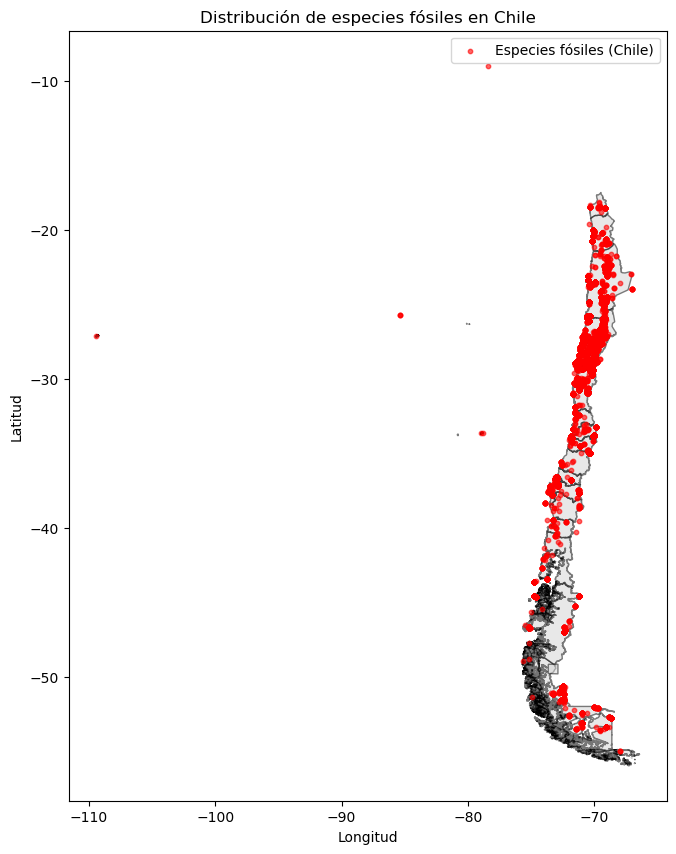

In [53]:
mapa = gpd.read_file('data\Regional.shp')
mapa = mapa.to_crs("EPSG:4326")

fosils_geo = gpd.GeoDataFrame(chile_df, geometry=gpd.points_from_xy(chile_df['lng'], chile_df['lat']), crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(10, 10))
mapa.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)

fosils_geo.plot(ax=ax, markersize=10, color='red', alpha=0.6, label='Especies fósiles (Chile)')

plt.title('Distribución de especies fósiles en Chile')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()


## Analisis 

### ¿Cuáles son las especies fósiles más comunes en cada una de las tres regiones (Chile, Argentina y Antártida)?

### **Chile**


C:\Users\ignac\AppData\Local\Temp\ipykernel_9856\1847757293.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_especies_chile.values, y=top_10_especies_chile.index, palette='viridis')


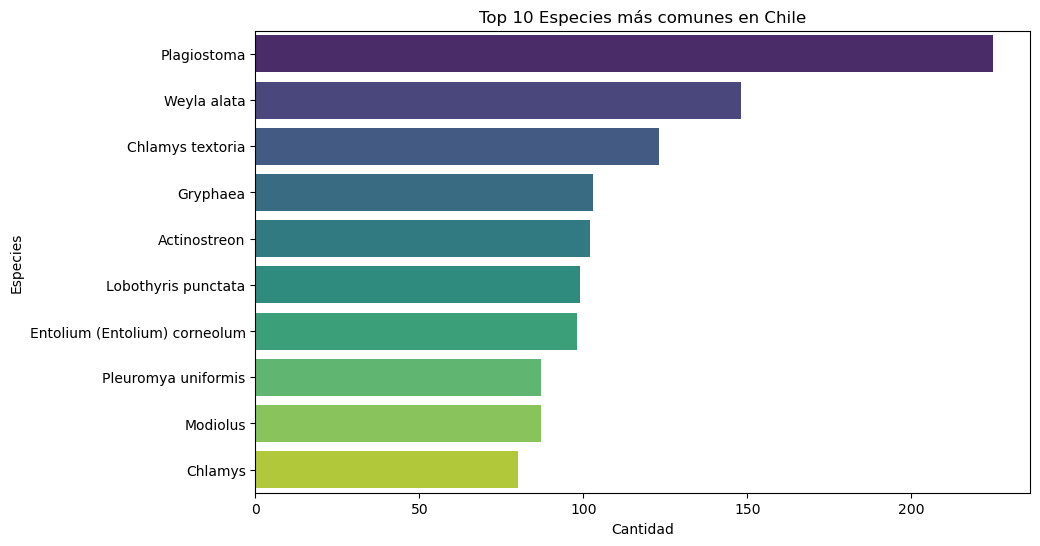

In [57]:
top_10_especies_chile = chile_df['accepted_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_especies_chile.values, y=top_10_especies_chile.index, palette='viridis')
plt.title('Top 10 Especies más comunes en Chile')
plt.xlabel('Cantidad')
plt.ylabel('Especies')
plt.show()

### **Argentina**


C:\Users\ignac\AppData\Local\Temp\ipykernel_9856\3176372099.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_especies_argentina.values, y=top_10_especies_argentina.index, palette='viridis')


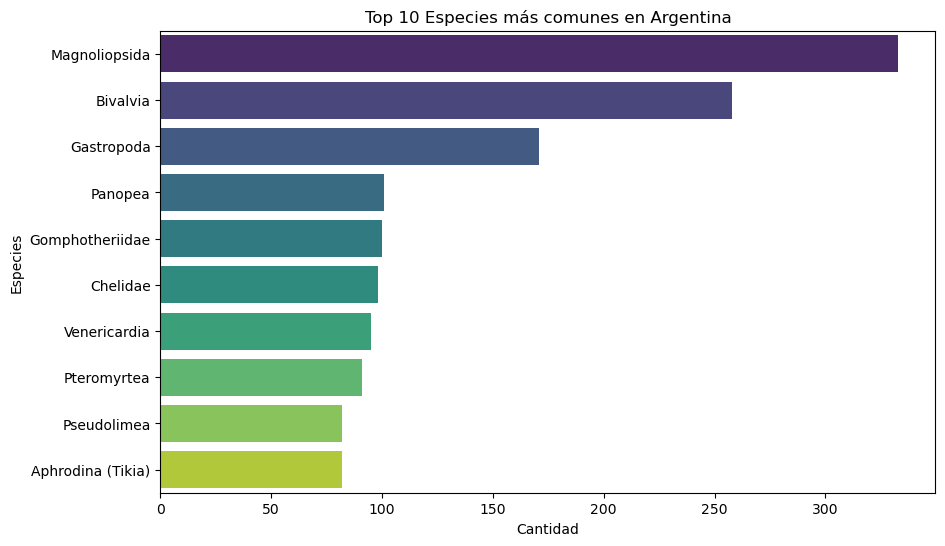

In [59]:
top_10_especies_argentina = argentina_df['accepted_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_especies_argentina.values, y=top_10_especies_argentina.index, palette='viridis')
plt.title('Top 10 Especies más comunes en Argentina')
plt.xlabel('Cantidad')
plt.ylabel('Especies')
plt.show()

### **Antártida**

C:\Users\ignac\AppData\Local\Temp\ipykernel_9856\1893660038.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_especies_antartica.values, y=top_10_especies_antartica.index, palette='viridis')


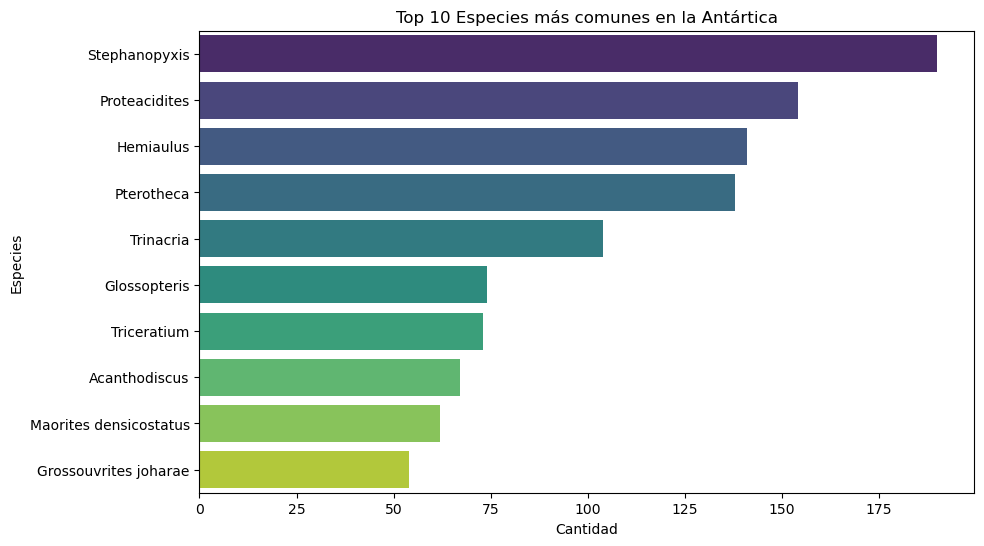

In [61]:
top_10_especies_antartica = antartica_df['accepted_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_especies_antartica.values, y=top_10_especies_antartica.index, palette='viridis')
plt.title('Top 10 Especies más comunes en la Antártica')
plt.xlabel('Cantidad')
plt.ylabel('Especies')
plt.show()

###  **Comparación de las especies fósiles más comunes entre regiones**

### **Enfoque del análisis**
Para identificar similitudes y diferencias entre las especies fósiles más comunes en Chile, Argentina y Antártida, realizaremos una comparación basada en sus características taxonómicas y ambientales.

### **Aspectos a comparar**
1. **Ambiente (`environment`)**:
   - Analizaremos en qué tipo de ambiente (acuático, terrestre, marino, etc.) se encuentran las especies más comunes en cada región.
   - Esto nos ayudará a entender la distribución ecológica y los hábitats predominantes en cada región.

2. **Familia (`family`)**:
   - Compararemos las familias a las que pertenecen las especies más comunes, para identificar si hay similitudes en términos de taxonomía general entre las regiones.

3. **Género (`genus`)**:
   - Evaluaremos si las especies más comunes pertenecen a géneros similares, lo que indicaría una conexión taxonómica más específica entre las regiones.

4. **Orden (`order`)**:
   - Investigaremos si las especies más comunes comparten un orden similar, proporcionando un nivel intermedio de comparación taxonómica entre las familias y las clases.

5. **Clase (`class`)**:
   - Examinaremos si las especies más comunes pertenecen a las mismas clases, lo que indicaría similitudes más amplias entre los grupos taxonómicos.

6. **Filo (`phylum`)**:
   - Compararemos los filos a los que pertenecen las especies más comunes, para observar patrones a un nivel taxonómico más general.

7. **Distribución por era (`era_early`)**:
   - Compararemos cómo se distribuyen las especies más comunes a lo largo de las eras geológicas, para identificar si hay eras dominantes en cada región.

---

Antes importante recordar los niveles taxonomicos

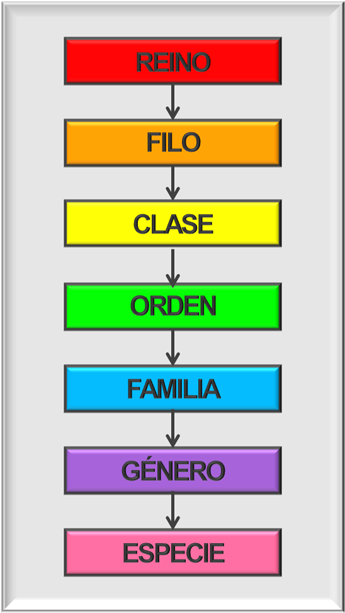

In [64]:
from IPython.display import Image
Image(filename=r'data\img\tax.png')

### **Ambiente (`environment`)**

C:\Users\ignac\AppData\Local\Temp\ipykernel_9856\2374532693.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chile_env_top_especies.values, y=chile_env_top_especies.index, palette='viridis')


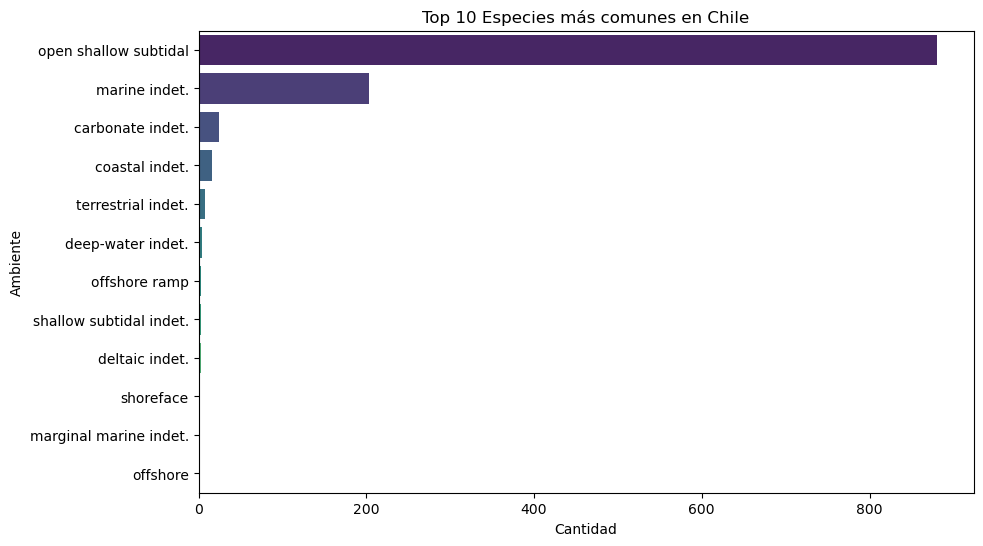

C:\Users\ignac\AppData\Local\Temp\ipykernel_9856\2374532693.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=argentina_env_top_especies.values, y=argentina_env_top_especies.index, palette='viridis')


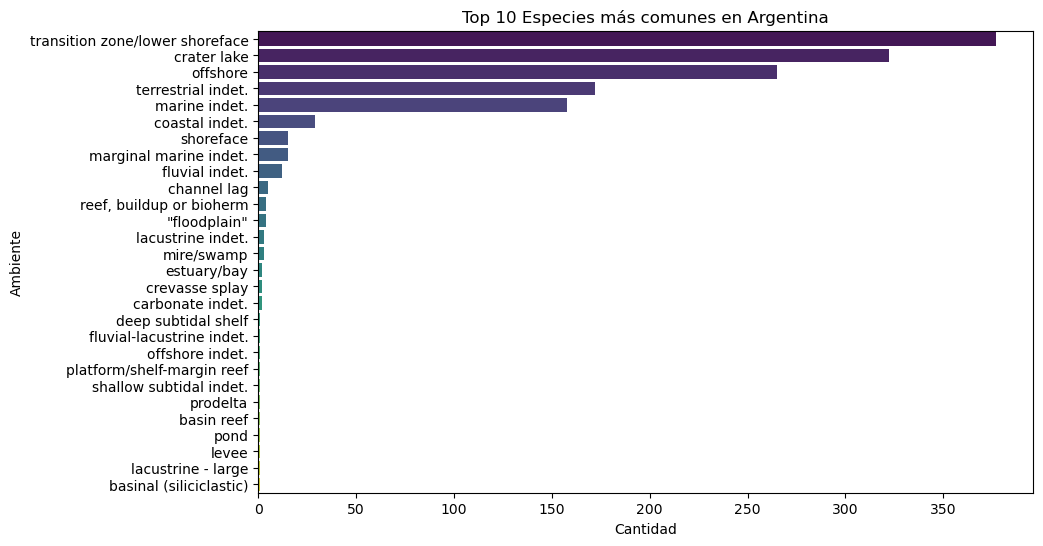

C:\Users\ignac\AppData\Local\Temp\ipykernel_9856\2374532693.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=antartica_env_top_especies.values, y=antartica_env_top_especies.index, palette='viridis')


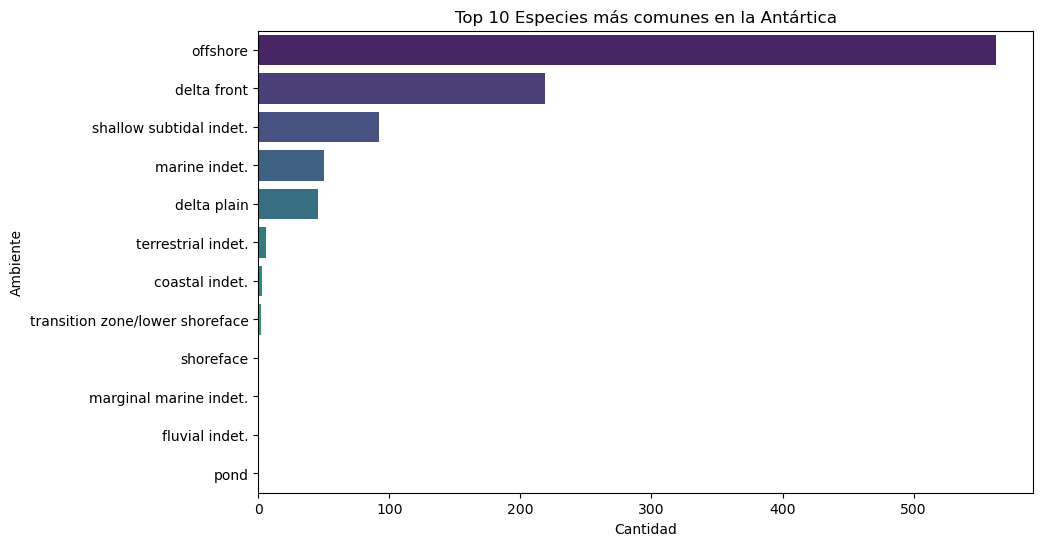

In [66]:
#df con las especies más comunes
chile_top_especies_df = chile_df[chile_df['accepted_name'].isin(top_10_especies_chile.index)]
argentina_top_especies_df = argentina_df[argentina_df['accepted_name'].isin(top_10_especies_argentina.index)]
antartica_top_especies_df = antartica_df[antartica_df['accepted_name'].isin(top_10_especies_antartica.index)]

#filtramos por environment
chile_env_top_especies = chile_top_especies_df['environment'].value_counts()
argentina_env_top_especies = argentina_top_especies_df['environment'].value_counts() 
antartica_env_top_especies = antartica_top_especies_df['environment'].value_counts() 


#graficamos
plt.figure(figsize=(10, 6))
sns.barplot(x=chile_env_top_especies.values, y=chile_env_top_especies.index, palette='viridis')
plt.title('Top 10 Especies más comunes en Chile')
plt.xlabel('Cantidad')
plt.ylabel('Ambiente')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=argentina_env_top_especies.values, y=argentina_env_top_especies.index, palette='viridis')
plt.title('Top 10 Especies más comunes en Argentina')
plt.xlabel('Cantidad')
plt.ylabel('Ambiente')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=antartica_env_top_especies.values, y=antartica_env_top_especies.index, palette='viridis')
plt.title('Top 10 Especies más comunes en la Antártica')
plt.xlabel('Cantidad')
plt.ylabel('Ambiente')
plt.show()

### Observaciones

1. **Dominancia de ambientes marinos en todas las regiones**:
   - En **Chile**, los ambientes dominantes son *open shallow subtidal* y *marine indet.*, lo que muestra una fuerte preservación fósil en ecosistemas marinos poco profundos.
   - En **Argentina**, aunque hay una mayor diversidad de ambientes, destacan tanto ambientes acuaticos como terrestres, siendo *transition_zone/lower_shoreface*, *crater_lake* y *terrestrial indet* ambientes abundantes
   - En **Antártida**, los ambientes *offshore* y *delta front* son los predominantes, reflejando la preservación en zonas marinas más profundas y costeras.



2. **Poca representación de ambientes terrestres en general**:
   - Aunque están presentes en **Argentina** y de forma limitada en **Chile** y **Antártida**, los ambientes terrestres (*terrestrial indet.*) son minoritarios en comparación con los marinos.

3. **Ambientes comunes y distintivos**:
   - Los ambientes *marine indet.* y *offshore* son comunes entre las tres regiones, sugiriendo una fuerte preservación en ecosistemas marinos.
   - Ambientes como *transition zone/lower shoreface* son más característicos de **Argentina**, mientras que *open shallow subtidal* es distintivo de **Chile**.

4. **Conclusión general**:
   - Las diferencias en los ambientes fósiles reflejan la diversidad ecológica y geológica de cada región. Mientras que **Chile** y **Antártida** tienen un enfoque claro en ecosistemas marinos, **Argentina** muestra una mayor diversidad, incluyendo ecosistemas continentales y costeros.


### **Género (`genus`)**

In [69]:
#DROPEAMOS LOS NO ESPECIFICADOS
chile_df_genus = chile_df[chile_df['genus'] != 'NO_GENUS_SPECIFIED']
argentina_df_genus = argentina_df[argentina_df['genus'] != 'NO_GENUS_SPECIFIED']
antartica_df_genus = antartica_df[antartica_df['genus'] != 'NO_GENUS_SPECIFIED']


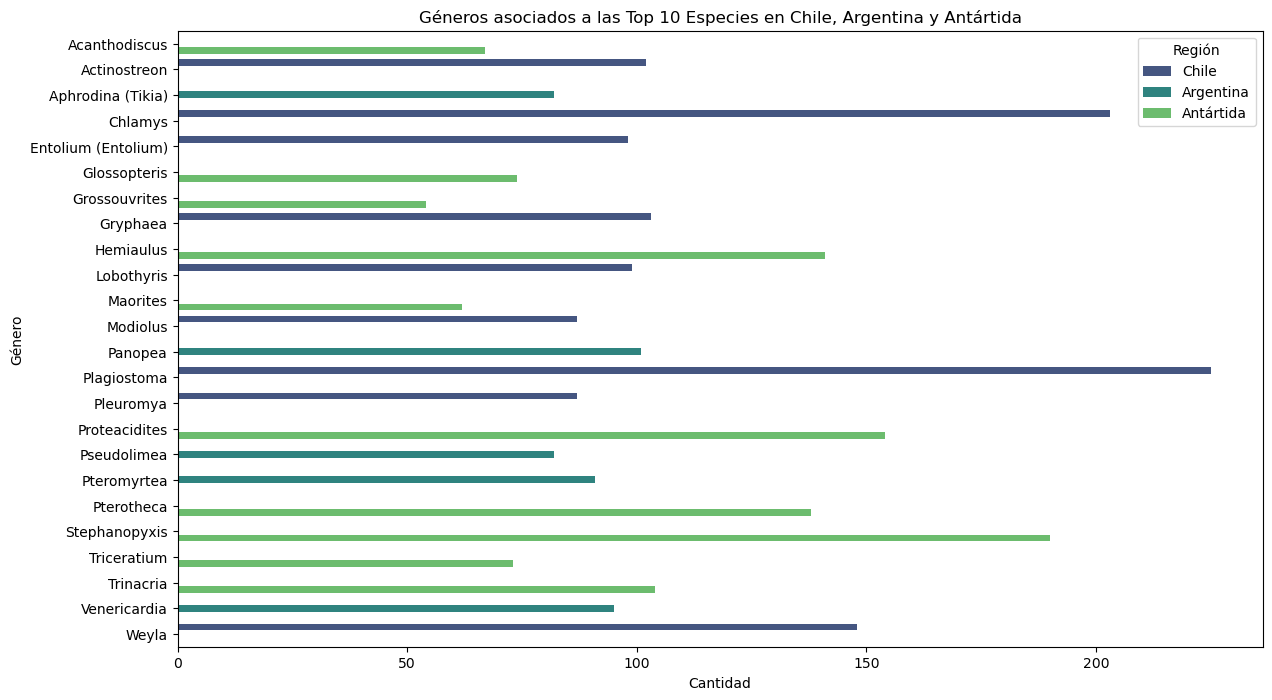

In [70]:
chile_top_especies_df = chile_df_genus[chile_df_genus['accepted_name'].isin(top_10_especies_chile.index)]
argentina_top_especies_df = argentina_df_genus[argentina_df_genus['accepted_name'].isin(top_10_especies_argentina.index)]
antartica_top_especies_df = antartica_df_genus[antartica_df_genus['accepted_name'].isin(top_10_especies_antartica.index)]

chile_genus_top_especies = chile_top_especies_df['genus'].value_counts()
argentina_genus_top_especies = argentina_top_especies_df['genus'].value_counts()
antartica_genus_top_especies = antartica_top_especies_df['genus'].value_counts()

combined_genus_df = pd.DataFrame({
    'Chile': chile_genus_top_especies,
    'Argentina': argentina_genus_top_especies,
    'Antártida': antartica_genus_top_especies
}).fillna(0)

combined_genus_df_reset = combined_genus_df.reset_index().melt(id_vars='genus', var_name='Región', value_name='Cantidad')

plt.figure(figsize=(14, 8))
sns.barplot(data=combined_genus_df_reset, x='Cantidad', y='genus', hue='Región', palette='viridis')
plt.title('Géneros asociados a las Top 10 Especies en Chile, Argentina y Antártida')
plt.xlabel('Cantidad')
plt.ylabel('Género')
plt.legend(title='Región')
plt.show()


### Observaciones

**Distribución única por región**:
   - Los géneros asociados a las especies fósiles más comunes son completamente únicos para cada región, lo que evidencia diferencias significativas en la biodiversidad fósil de Chile, Argentina y Antártida, lo que implica que no hay géneros en común entre las tres regiones, lo que podría deberse a diferencias geográficas y climáticas marcadas entre estas áreas durante los períodos geológicos analizados.


### **Familia (`family`)**

In [73]:
chile_df_family = chile_df[chile_df['family'] != 'NO_FAMILY_SPECIFIED']
argentina_df_family = argentina_df[argentina_df['family'] != 'NO_FAMILY_SPECIFIED']
antartica_df_family = antartica_df[antartica_df['family'] != 'NO_FAMILY_SPECIFIED']

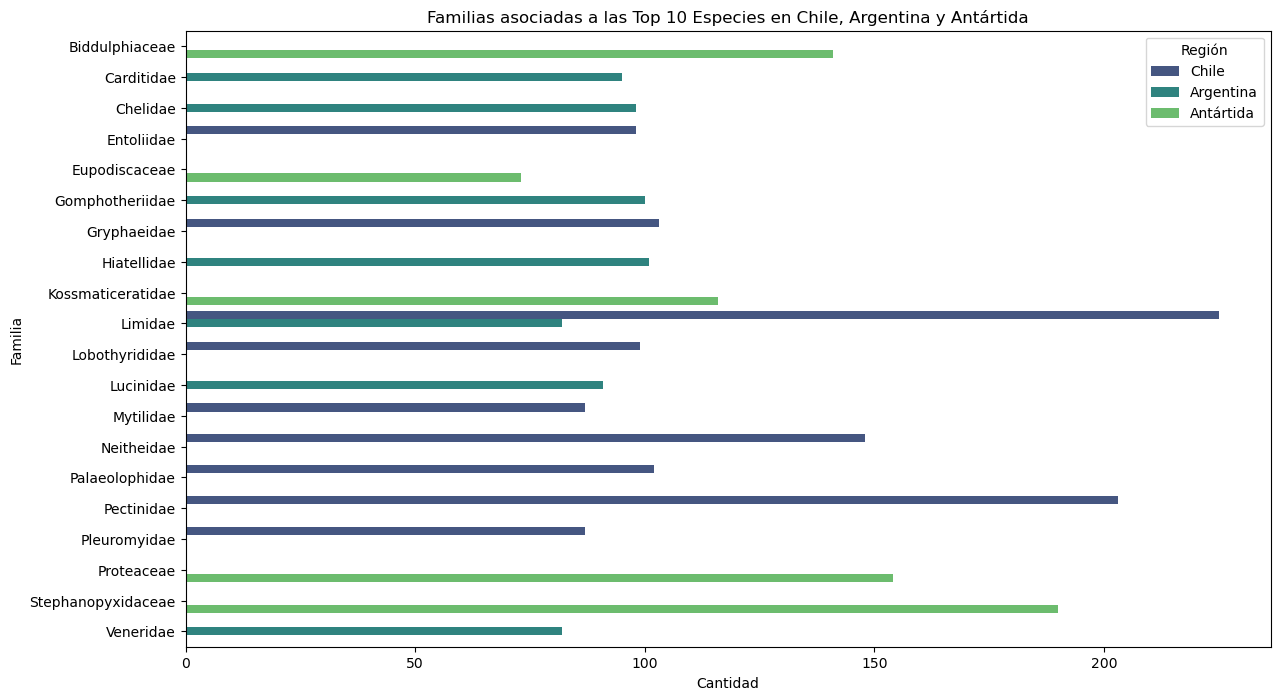

In [74]:
chile_top_especies_df = chile_df_family[chile_df_family['accepted_name'].isin(top_10_especies_chile.index)]
argentina_top_especies_df = argentina_df_family[argentina_df_family['accepted_name'].isin(top_10_especies_argentina.index)]
antartica_top_especies_df = antartica_df_family[antartica_df_family['accepted_name'].isin(top_10_especies_antartica.index)]

chile_family_top_especies = chile_top_especies_df['family'].value_counts()
argentina_family_top_especies = argentina_top_especies_df['family'].value_counts()
antartica_family_top_especies = antartica_top_especies_df['family'].value_counts()

combined_family_df = pd.DataFrame({
    'Chile': chile_family_top_especies,
    'Argentina': argentina_family_top_especies,
    'Antártida': antartica_family_top_especies
}).fillna(0)

combined_family_df_reset = combined_family_df.reset_index().melt(id_vars='family', var_name='Región', value_name='Cantidad')

plt.figure(figsize=(14, 8))
sns.barplot(data=combined_family_df_reset, x='Cantidad', y='family', hue='Región', palette='viridis')
plt.title('Familias asociadas a las Top 10 Especies en Chile, Argentina y Antártida')
plt.xlabel('Cantidad')
plt.ylabel('Familia')
plt.legend(title='Región')
plt.show()


### Observaciones

**Familias compartidas entre regiones**:
   - *Limidae* es la única familia compartida entre Chile y Argentina, lo que evidencia una conexión ecológica en ambientes marinos entre estas dos regiones.


**Conclusión general**:
   - La familia *Limidae* refleja una conexión marina entre Chile y Argentina, mientras que el resto de las familias destacan la diversidad ecológica única de cada región.


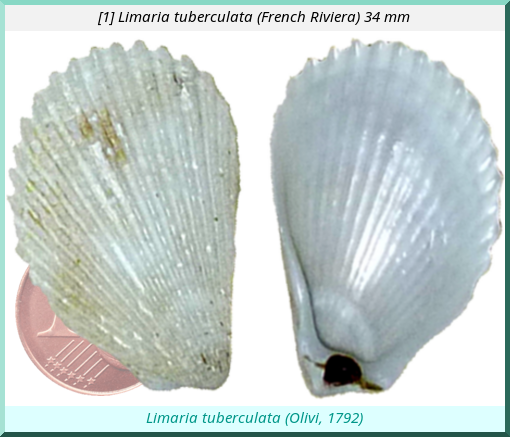

In [76]:
from IPython.display import Image
Image(filename=r'data\img\limidae.png')

<!-- ### Observaciones

**Familias compartidas entre regiones**:
   - *Limidae* es la única familia compartida entre Chile y Argentina, lo que evidencia una conexión ecológica en ambientes marinos entre estas dos regiones.

**Conclusión general**:
   - La familia *Limidae* refleja una conexión marina entre Chile y Argentina, mientras que el resto de las familias destacan la diversidad ecológica única de cada región. -->


### **Orden (`order`)**

In [79]:
chile_df_order = chile_df[chile_df['order'] != 'NO_ORDER_SPECIFIED']
argentina_df_order = argentina_df[argentina_df['order'] != 'NO_ORDER_SPECIFIED']
antartica_df_order = antartica_df[antartica_df['order'] != 'NO_ORDER_SPECIFIED']

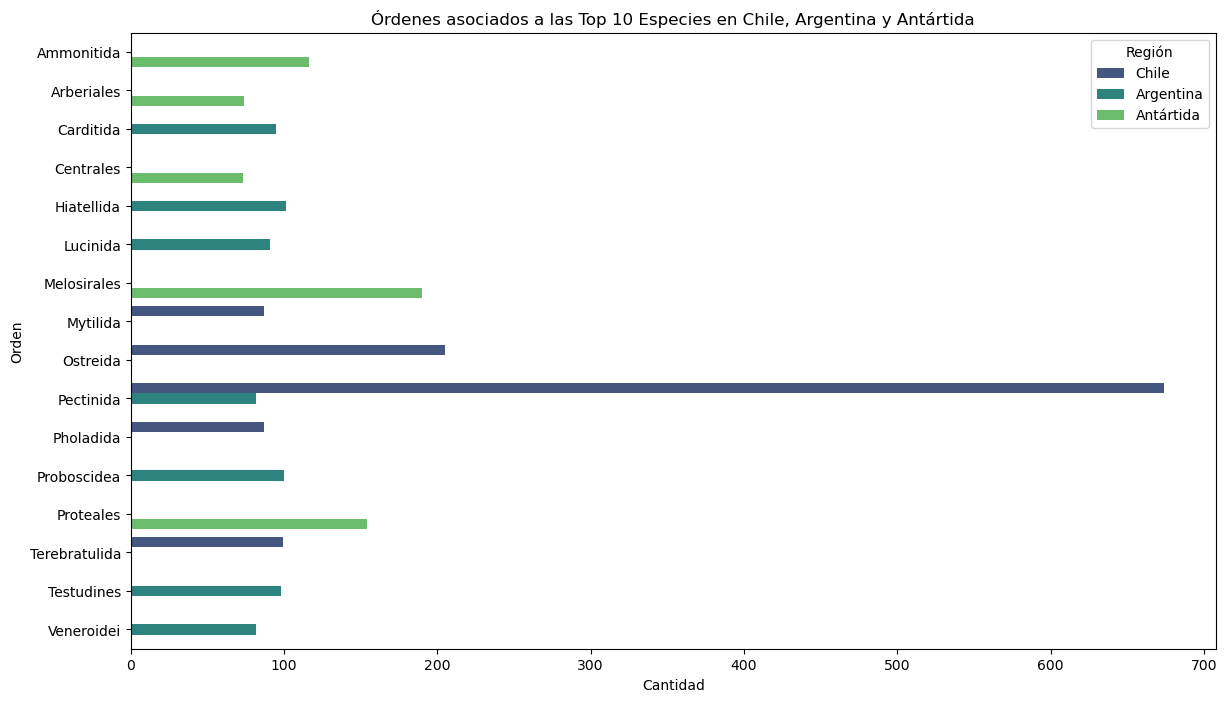

In [80]:
chile_top_especies_df = chile_df_order[chile_df_order['accepted_name'].isin(top_10_especies_chile.index)]
argentina_top_especies_df = argentina_df_order[argentina_df_order['accepted_name'].isin(top_10_especies_argentina.index)]
antartica_top_especies_df = antartica_df_order[antartica_df_order['accepted_name'].isin(top_10_especies_antartica.index)]

chile_order_top_especies = chile_top_especies_df['order'].value_counts()
argentina_order_top_especies = argentina_top_especies_df['order'].value_counts()
antartica_order_top_especies = antartica_top_especies_df['order'].value_counts()

combined_order_df = pd.DataFrame({
    'Chile': chile_order_top_especies,
    'Argentina': argentina_order_top_especies,
    'Antártida': antartica_order_top_especies
}).fillna(0)

combined_order_df_reset = combined_order_df.reset_index().melt(id_vars='order', var_name='Región', value_name='Cantidad')

plt.figure(figsize=(14, 8))
sns.barplot(data=combined_order_df_reset, x='Cantidad', y='order', hue='Región', palette='viridis')
plt.title('Órdenes asociados a las Top 10 Especies en Chile, Argentina y Antártida')
plt.xlabel('Cantidad')
plt.ylabel('Orden')
plt.legend(title='Región')
plt.show()


### Observaciones

1. **Órdenes compartidos entre regiones**:
   - *Pectinida* (orden de moluscos bivalvos que incluye vieiras y similares) es compartido entre Chile y Argentina, reflejando una conexión marina entre estas regiones.

2. **Diferencias regionales**:
   - **Chile**: Destaca el orden *Ostreida* (ostras y sus parientes) como el más abundante, evidenciando un ecosistema marino predominante.
   - **Argentina**: Además de *Pectinida*, sobresale *Proboscidea* (orden que incluye **elefantes** y sus parientes extintos), lo que resalta una biodiversidad más enfocada en ecosistemas terrestres.
   - **Antártida**: Resalta *Melosirales* (un orden de diatomeas), representando un fuerte componente acuático con énfasis en ecosistemas marinos fríos.

**Conclusión general**: Las diferencias en la composición de los órdenes destacan las particularidades ecológicas y geográficas de cada región. El orden *Pectinida* actúa como un indicador de conexión entre Chile y Argentina en términos de biodiversidad marina.


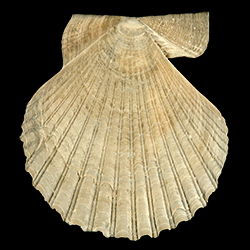

In [82]:
from IPython.display import Image
Image(filename=r'data\img\pectinidae.png')

### **Clase (`class`)**

In [84]:
chile_df_class = chile_df[chile_df['class'] != 'NO_CLASS_SPECIFIED']
argentina_df_class = argentina_df[argentina_df['class'] != 'NO_CLASS_SPECIFIED']
antartica_df_class = antartica_df[antartica_df['class'] != 'NO_CLASS_SPECIFIED']

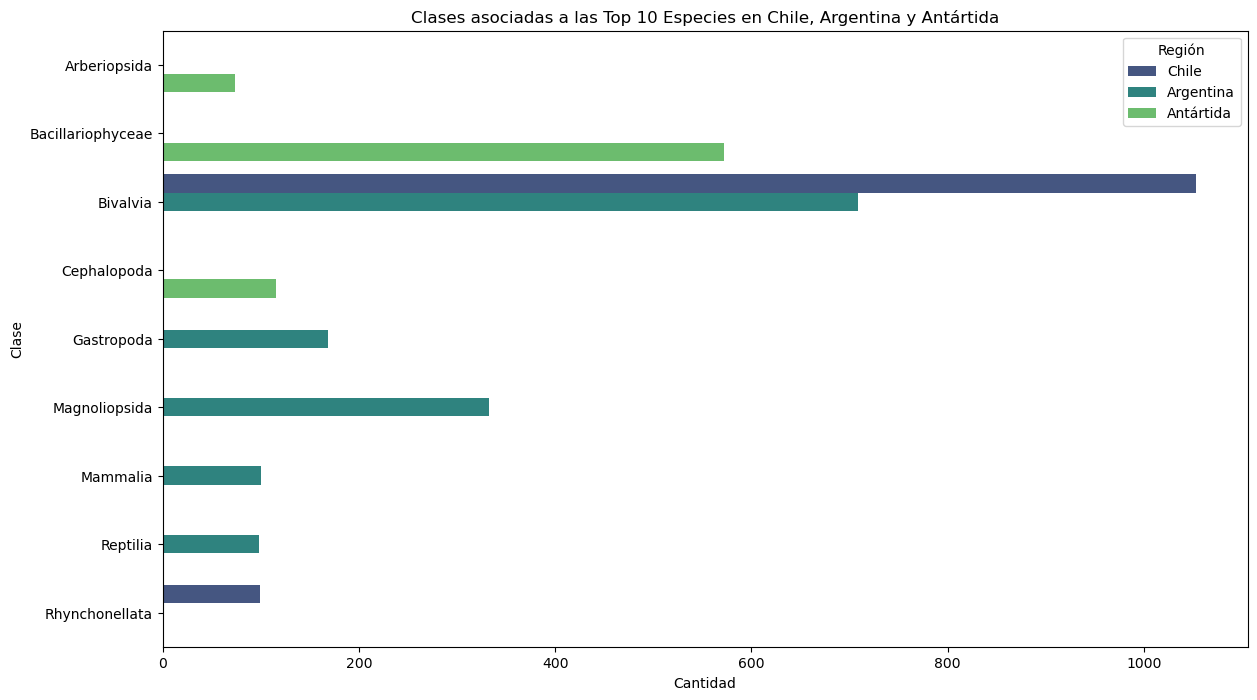

In [85]:
chile_top_especies_df = chile_df_class[chile_df_class['accepted_name'].isin(top_10_especies_chile.index)]
argentina_top_especies_df = argentina_df_class[argentina_df_class['accepted_name'].isin(top_10_especies_argentina.index)]
antartica_top_especies_df = antartica_df_class[antartica_df_class['accepted_name'].isin(top_10_especies_antartica.index)]

chile_class_top_especies = chile_top_especies_df['class'].value_counts()
argentina_class_top_especies = argentina_top_especies_df['class'].value_counts()
antartica_class_top_especies = antartica_top_especies_df['class'].value_counts()

combined_class_df = pd.DataFrame({
    'Chile': chile_class_top_especies,
    'Argentina': argentina_class_top_especies,
    'Antártida': antartica_class_top_especies
}).fillna(0)

combined_class_df_reset = combined_class_df.reset_index().melt(id_vars='class', var_name='Región', value_name='Cantidad')

plt.figure(figsize=(14, 8))
sns.barplot(data=combined_class_df_reset, x='Cantidad', y='class', hue='Región', palette='viridis')
plt.title('Clases asociadas a las Top 10 Especies en Chile, Argentina y Antártida')
plt.xlabel('Cantidad')
plt.ylabel('Clase')
plt.legend(title='Región')
plt.show()


### Observaciones

1. **Clases compartidas entre regiones**:
   - *Bivalvia* (moluscos bivalvos, como almejas y mejillones) es una clase ampliamente representada en Chile y Argentina.

3. **Conclusión general**:
   - La clase *Bivalvia* actúa como un punto de conexión entre Chile y Argentina, destacando su amplia distribución y preservación en fósiles. Sin embargo, las diferencias en las demás clases reflejan las particularidades ecológicas y geográficas únicas de cada región.


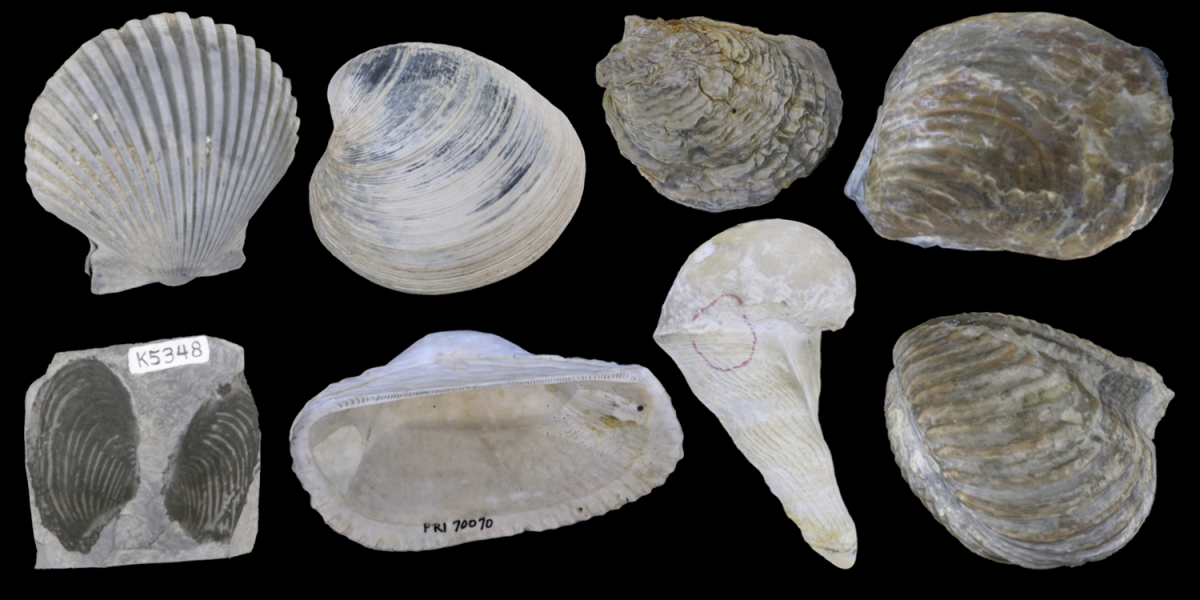

In [87]:
from IPython.display import Image
Image(filename=r'data\img\bivalvia.png')

### **Filo (`phylum`)**

In [89]:
chile_df_phylum = chile_df[chile_df['phylum'] != 'NO_PHYLUM_SPECIFIED']
argentina_df_phylum = argentina_df[argentina_df['phylum'] != 'NO_PHYLUM_SPECIFIED']
antartica_df_phylum = antartica_df[antartica_df['phylum'] != 'NO_PHYLUM_SPECIFIED']

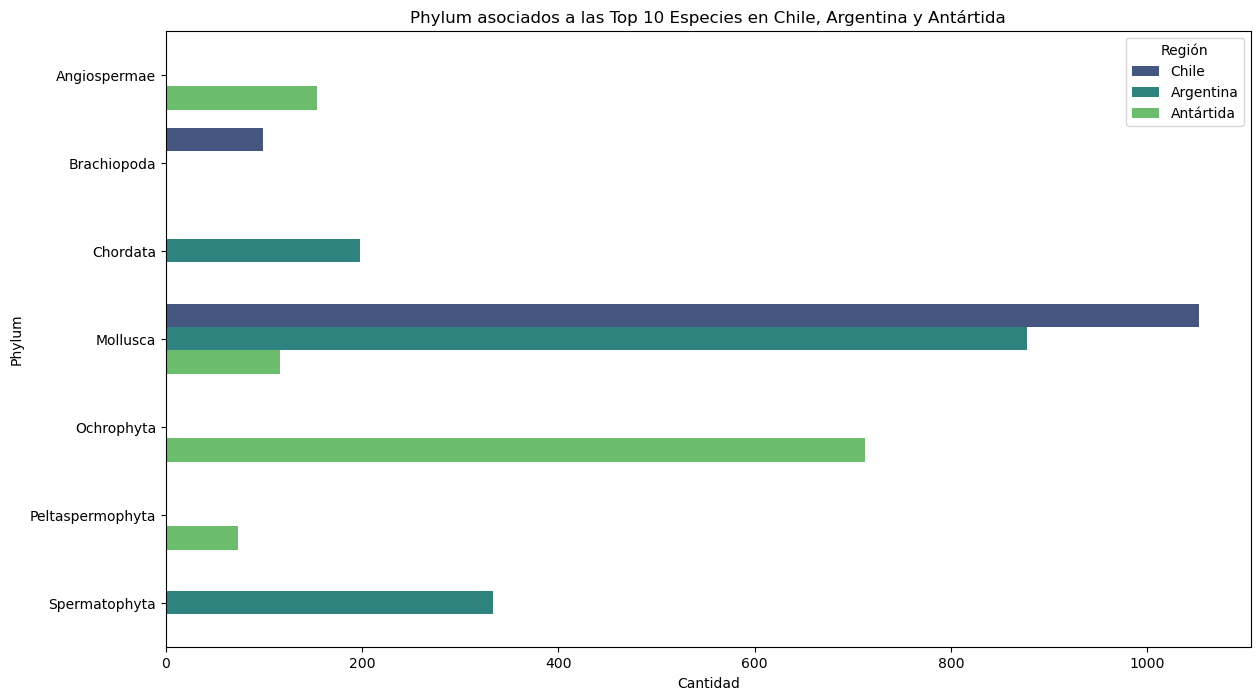

In [90]:
chile_top_especies_df = chile_df_phylum[chile_df_phylum['accepted_name'].isin(top_10_especies_chile.index)]
argentina_top_especies_df = argentina_df_phylum[argentina_df_phylum['accepted_name'].isin(top_10_especies_argentina.index)]
antartica_top_especies_df = antartica_df_phylum[antartica_df_phylum['accepted_name'].isin(top_10_especies_antartica.index)]

chile_phylum_top_especies = chile_top_especies_df['phylum'].value_counts()
argentina_phylum_top_especies = argentina_top_especies_df['phylum'].value_counts()
antartica_phylum_top_especies = antartica_top_especies_df['phylum'].value_counts()

combined_phylum_df = pd.DataFrame({
    'Chile': chile_phylum_top_especies,
    'Argentina': argentina_phylum_top_especies,
    'Antártida': antartica_phylum_top_especies
}).fillna(0)

combined_phylum_df_reset = combined_phylum_df.reset_index().melt(id_vars='phylum', var_name='Región', value_name='Cantidad')

plt.figure(figsize=(14, 8))
sns.barplot(data=combined_phylum_df_reset, x='Cantidad', y='phylum', hue='Región', palette='viridis')
plt.title('Phylum asociados a las Top 10 Especies en Chile, Argentina y Antártida')
plt.xlabel('Cantidad')
plt.ylabel('Phylum')
plt.legend(title='Región')
plt.show()


### Observaciones

1. **Phylum predominante**:
   - *Mollusca* es el phylum más representado en las tres regiones, reflejando la alta preservación de moluscos (bivalvos, gasterópodos, etc.) en el registro fósil.

3. **Conclusión general**:
   - Notamos que por primera vez aparece un nivel taxonómico que abarca las 3 regiones, en este caso es *Mollusca*, la cual actúa como un phylum común entre las regiones, subrayando su importancia en el registro fósil marino.

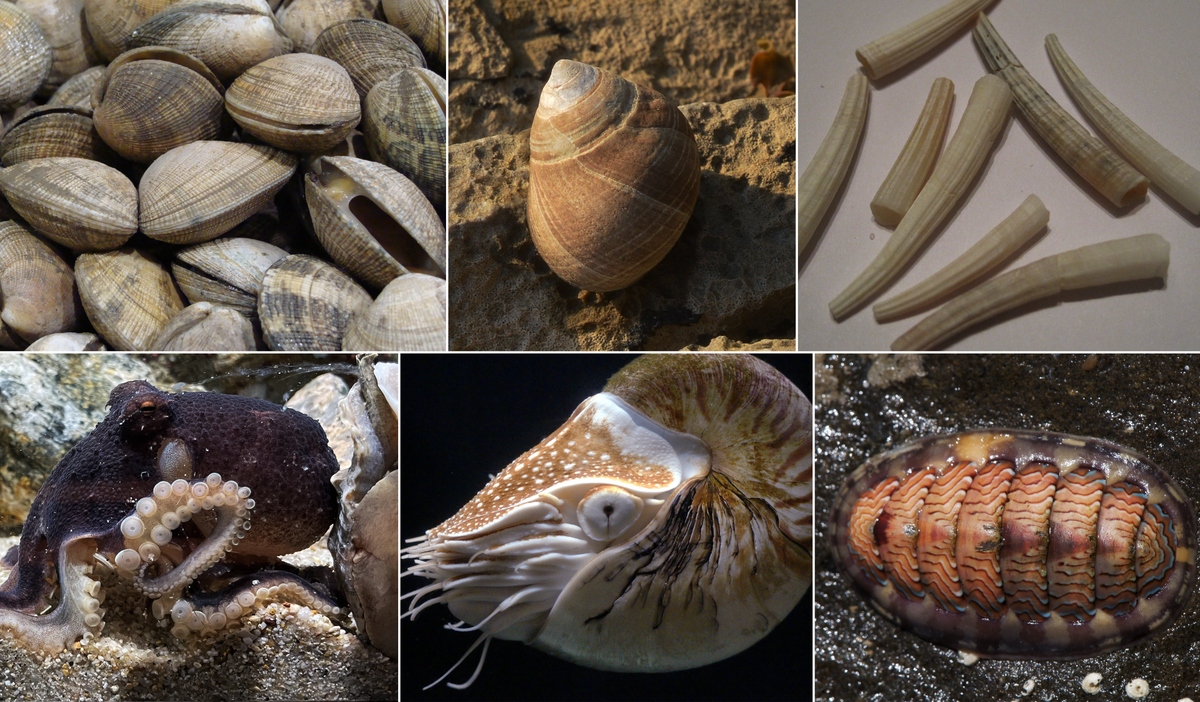

In [92]:
from IPython.display import Image
Image(filename=r'data\img\mollusca.png')

### **Distribución por era (`era_early`)**

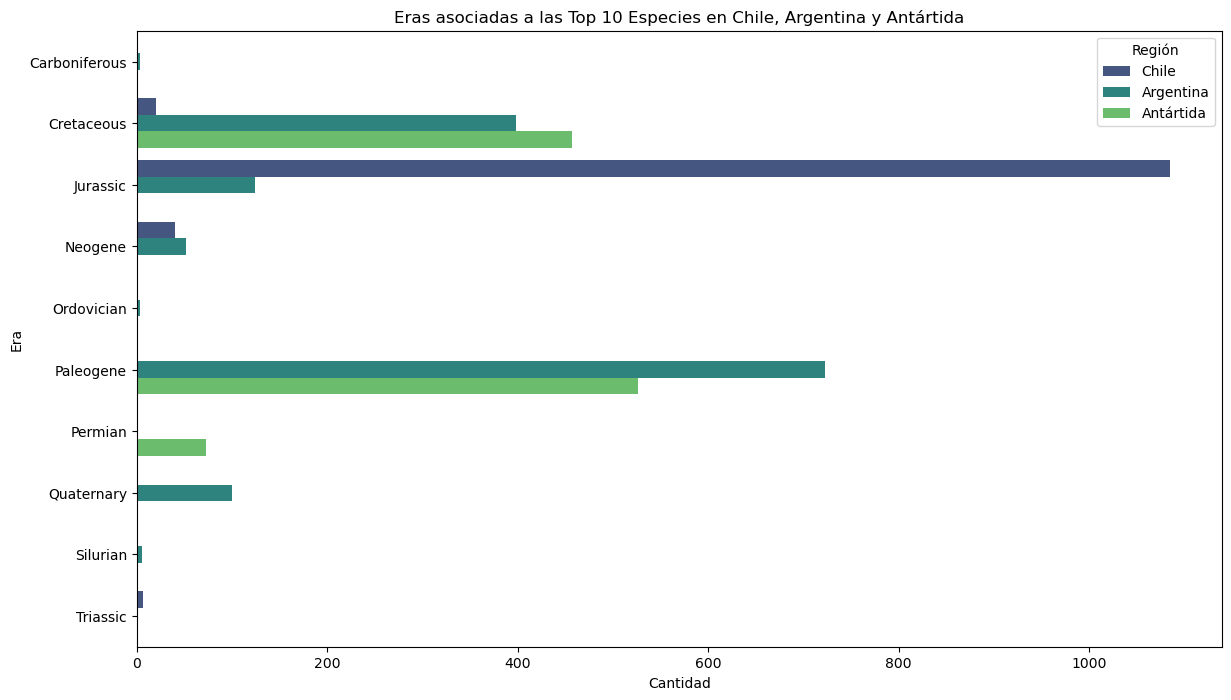

In [94]:
chile_top_especies_df = chile_df[chile_df['accepted_name'].isin(top_10_especies_chile.index)]
argentina_top_especies_df = argentina_df[argentina_df['accepted_name'].isin(top_10_especies_argentina.index)]
antartica_top_especies_df = antartica_df[antartica_df['accepted_name'].isin(top_10_especies_antartica.index)]

chile_eras_top_especies = chile_top_especies_df['era_early'].value_counts()
argentina_eras_top_especies = argentina_top_especies_df['era_early'].value_counts()
antartica_eras_top_especies = antartica_top_especies_df['era_early'].value_counts()

combined_eras_df = pd.DataFrame({
    'Chile': chile_eras_top_especies,
    'Argentina': argentina_eras_top_especies,
    'Antártida': antartica_eras_top_especies
}).fillna(0)

combined_eras_df_reset = combined_eras_df.reset_index().melt(id_vars='era_early', var_name='Región', value_name='Cantidad')

plt.figure(figsize=(14, 8))
sns.barplot(data=combined_eras_df_reset, x='Cantidad', y='era_early', hue='Región', palette='viridis')
plt.title('Eras asociadas a las Top 10 Especies en Chile, Argentina y Antártida')
plt.xlabel('Cantidad')
plt.ylabel('Era')
plt.legend(title='Región')
plt.show()


### Observaciones

1. **Eras predominantes**:
   - **Cretaceous** abarca las tres regiones (Chile, Argentina y Antártida), siendo la era más representada en los fósiles. Esto sugiere una importancia geológica y biológica significativa durante este periodo.
   - **Jurassic** domina en Chile, reflejando una rica historia fósil en esta era en esa región.


**Conclusión general**: Aunque hay diferencias en las eras predominantes, el **Cretaceous** conecta a las tres regiones, destacando su relevancia en términos de biodiversidad, y evolución fósil sobretodo en fosiles marinos.

---

### Conclusión General


1. **Predominio de ecosistemas acuáticos**:
   - La gran mayoría de los fósiles analizados en todas las regiones están asociados a ambientes acuáticos, como *marine indet.*, *offshore*, y *open shallow subtidal*. Esto resalta la importancia de los ambientes marinos y transicionales en la preservación fósil y su papel crucial en la evolución de la biodiversidad.

2. **Conexiones entre las regiones**:
   - Se observaron similitudes taxonómicas y geológicas significativas, como el orden **Pectinida**, presente en Chile y Argentina, y el phylum **Mollusca**, ampliamente compartido. Además, el **Cretaceous** destaca como una era que conecta a las tres regiones, lo que sugiere un pasado geológico común vinculado al supercontinente Gondwana.

3. **Especificidad regional**:
   - Cada región también refleja características únicas. Argentina muestra una mayor diversidad en ambientes continentales y terrestres, mientras que Chile se caracteriza por una marcada dominancia de ambientes marinos. La Antártida, aunque más limitada en representación, ofrece un equilibrio entre ambientes marinos frios y costeros.

# ¿Qué diferencias y similitudes existen en la biodiversidad fósil entre estas regiones a lo largo de diferentes eras geológicas?


### Enfoque y Objetivo

En este análisis, buscamos explorar la biodiversidad fósil en Chile, Argentina y Antártida utilizando índices de biodiversidad a lo largo de diferentes eras geológicas. 
El objetivo es comparar la diversidad a seis niveles taxonómicos:
1. **Especies**
2. **Géneros**
3. **Familias**
4. **Órdenes**
5. **Clases**
6. **Filos**


Este enfoque nos permitirá:
- Identificar cómo cambian los patrones de diversidad entre niveles taxonómicos.
- Detectar eras con alta o baja biodiversidad en términos de riqueza y equitatividad.
- Explorar si los patrones observados a nivel de especies se mantienen en niveles taxonómicos más amplios.

Utilizaremos **índices de biodiversidad** como:

### **Índice de Shannon**
$$ H' = -\sum_{i=1}^S p_i \ln(p_i) $$

- $H'$: Índice de Shannon (la medida de diversidad).
- $S$: Número total de grupos (por ejemplo, especies, géneros o familias).
- $p_i$: Proporción de individuos del grupo $i$ en relación al total. Se calcula como:
  $$ p_i = \frac{n_i}{N} $$

- $n_i$: Número de individuos en el grupo $i$.
- $N$: Número total de individuos en la comunidad.

---

- Mide la diversidad combinando **riqueza** (cantidad de grupos) y **equitatividad** (distribución de los individuos entre los grupos).
- Valores más altos indican mayor diversidad y equitatividad.

| **Índice de Shannon** | **Significado**                                                                 |
|------------------------|---------------------------------------------------------------------------------|
| **0**                 | No hay diversidad (solo hay un grupo, por ejemplo, una sola especie).           |
| **1-2**               | Baja diversidad, dominada por unas pocas especies (grupos).                     |
| **3-4**               | Diversidad moderada; hay más grupos y una mejor distribución entre ellos.        |
| **5 o más**           | Alta diversidad; hay una gran cantidad de grupos y están distribuidos uniformemente. |

---

### **Índice de Simpson**

$$ D = 1 - \sum_{i=1}^S p_i^2 $$

- $D$: Índice de Simpson (la medida de diversidad).
- $S$: Número total de grupos (por ejemplo, especies, géneros o familias).
- $p_i$: Proporción de individuos del grupo $i$ en relación al total. Se calcula como:
  $$ p_i = \frac{n_i}{N} $$

- $n_i$: Número de individuos en el grupo $i$.
- $N$: Número total de individuos en la comunidad.
---
- Mide la **probabilidad de que dos individuos seleccionados al azar pertenezcan al mismo grupo**.
- A diferencia de Shannon, es más sensible a la **dominancia** de unos pocos grupos. Valores altos reflejan **menos dominancia** y mayor equitatividad.

| **Índice de Simpson** | **Significado**                                                                 |
|------------------------|---------------------------------------------------------------------------------|
| **0**                 | Total dominancia; todos los individuos pertenecen a un solo grupo.              |
| **0.1-0.4**           | Baja equitatividad; dominancia de unos pocos grupos.                            |
| **0.5-0.7**           | Moderada equitatividad; cierta dominancia, pero con más grupos presentes.        |
| **0.8 o más**         | Alta equitatividad; las especies (grupos) están distribuidas uniformemente.      |

---

### Estructura del Análisis

1. **Calcular índices de biodiversidad**:
   Aplicaremos los índices a las eras con mayor riqueza para **especies**, **géneros**, **familias**, **órdenes**, **clases** y **filos**. Esto nos permitirá observar patrones en todos los niveles taxonómicos y cómo estos cambian a lo largo del tiempo.

2. **Visualizar resultados**:
   Compararemos los índices entre niveles taxonómicos y eras.
3. **Interpretar patrones**:
   Discutiremos cómo los patrones de biodiversidad varían a lo largo del tiempo y entre niveles taxonómicos.

---


## Chile 



In [100]:
chile_df.dropna(subset=['accepted_name', 'genus', 'family', "order", "class", "phylum"], inplace=True)

In [101]:
#tomamos los top 5 eras por especies unicas en chile
top5_chile_especies = chile_df.groupby('era_early')['accepted_name'].nunique().nlargest(5)

print("Top 5 eras por especies unicas en Chile:")
print(top5_chile_especies)


Top 5 eras por especies unicas en Chile:
era_early
Neogene       645
Jurassic      598
Cretaceous    443
Quaternary    210
Triassic      151
Name: accepted_name, dtype: int64


### Cálculo de Índices de Biodiversidad

A continuación, calcularemos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Chile a cada nivel taxonómico (especies, géneros y familias).


In [103]:
from scipy.stats import entropy

#calculamos los indices de shannon y simpson
def calcular_indices(df, eras, nivel_taxonomico):
    indices = {}
    for era in eras.index:
        subset = df[df['era_early'] == era]
        taxon_counts = subset[nivel_taxonomico].value_counts()
        total_counts = taxon_counts.sum()
        proportions = taxon_counts / total_counts
        shannon_index = entropy(proportions, base=2)  # shannon 
        simpson_index = 1 - sum(proportions**2)      # simpson
        indices[era] = {'Shannon': shannon_index, 'Simpson': simpson_index}
    return indices

In [104]:
#dropiamos los no especificados
chile_df_p2_generos = chile_df.drop(chile_df[chile_df['genus'] == 'NO_GENUS_SPECIFIED'].index)
chile_df_p2_familias = chile_df.drop(chile_df[chile_df['family'] == 'NO_FAMILY_SPECIFIED'].index)
chile_df_p2_ordenes = chile_df.drop(chile_df[chile_df['order'] == 'NO_ORDER_SPECIFIED'].index)  
chile_df_p2_clases = chile_df.drop(chile_df[chile_df['class'] == 'NO_CLASS_SPECIFIED'].index)   
chile_df_p2_phylum = chile_df.drop(chile_df[chile_df['phylum'] == 'NO_PHYLUM_SPECIFIED'].index)

In [105]:
#calculamos los indices
indices_chile_especies = calcular_indices(chile_df, top5_chile_especies, 'accepted_name')
indices_chile_generos = calcular_indices(chile_df_p2_generos, top5_chile_especies, 'genus')  
indices_chile_familias = calcular_indices(chile_df_p2_familias, top5_chile_especies, 'family')  
indices_chile_ordenes = calcular_indices(chile_df_p2_ordenes, top5_chile_especies, 'order')
indices_chile_clases = calcular_indices(chile_df_p2_clases, top5_chile_especies, 'class')
indices_chile_phylum = calcular_indices(chile_df_p2_phylum, top5_chile_especies, 'phylum')


print("\nÍndices por especies en Chile:")
print(pd.DataFrame(indices_chile_especies).T)

print("\nÍndices por géneros en Chile:")
print(pd.DataFrame(indices_chile_generos).T)

print("\nÍndices por familias en Chile:")
print(pd.DataFrame(indices_chile_familias).T)

print("\nÍndices por ordenes en Chile:")
print(pd.DataFrame(indices_chile_ordenes).T)

print("\nÍndices por clases en Chile:")
print(pd.DataFrame(indices_chile_clases).T)

print("\nÍndices por phylum en Chile:")
print(pd.DataFrame(indices_chile_phylum).T)


Índices por especies en Chile:
             Shannon   Simpson
Neogene     8.627208  0.995495
Jurassic    7.732674  0.990075
Cretaceous  8.159620  0.994163
Quaternary  7.032858  0.988201
Triassic    6.898211  0.988160

Índices por géneros en Chile:
             Shannon   Simpson
Neogene     7.963480  0.993124
Jurassic    7.055302  0.984711
Cretaceous  7.688936  0.991922
Quaternary  6.663366  0.985421
Triassic    6.288502  0.979896

Índices por familias en Chile:
             Shannon   Simpson
Neogene     6.805490  0.984770
Jurassic    5.833524  0.970931
Cretaceous  6.366124  0.979647
Quaternary  5.728536  0.970187
Triassic    5.666709  0.969217

Índices por ordenes en Chile:
             Shannon   Simpson
Neogene     4.938961  0.932146
Jurassic    3.709118  0.876582
Cretaceous  4.454115  0.887394
Quaternary  4.433645  0.925011
Triassic    4.538763  0.942200

Índices por clases en Chile:
             Shannon   Simpson
Neogene     2.579828  0.740347
Jurassic    1.790354  0.586619
Cretace

## Visualización de Índices de Biodiversidad en Chile

A continuación, graficaremos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Chile, comparando los diferentes niveles taxonómicos.


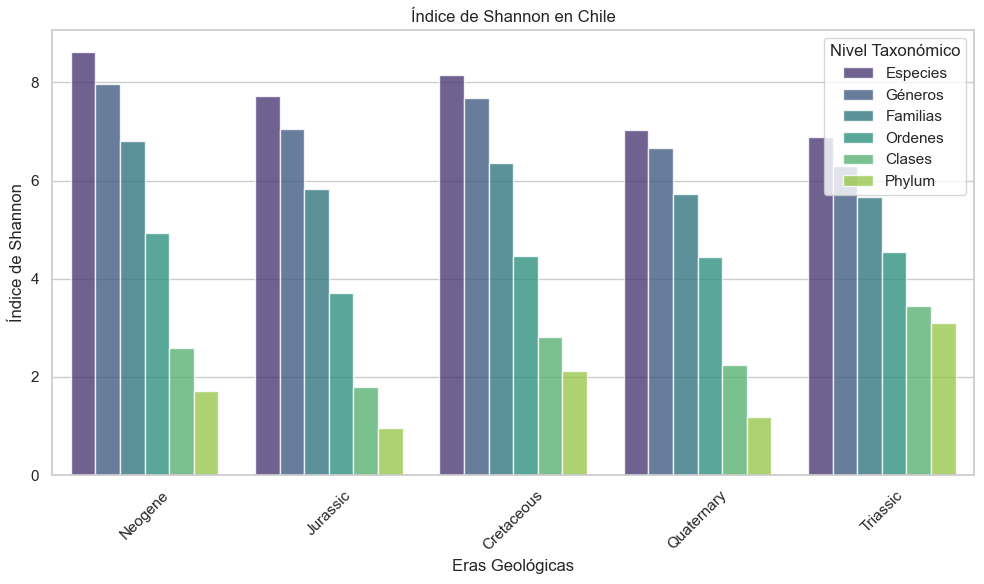

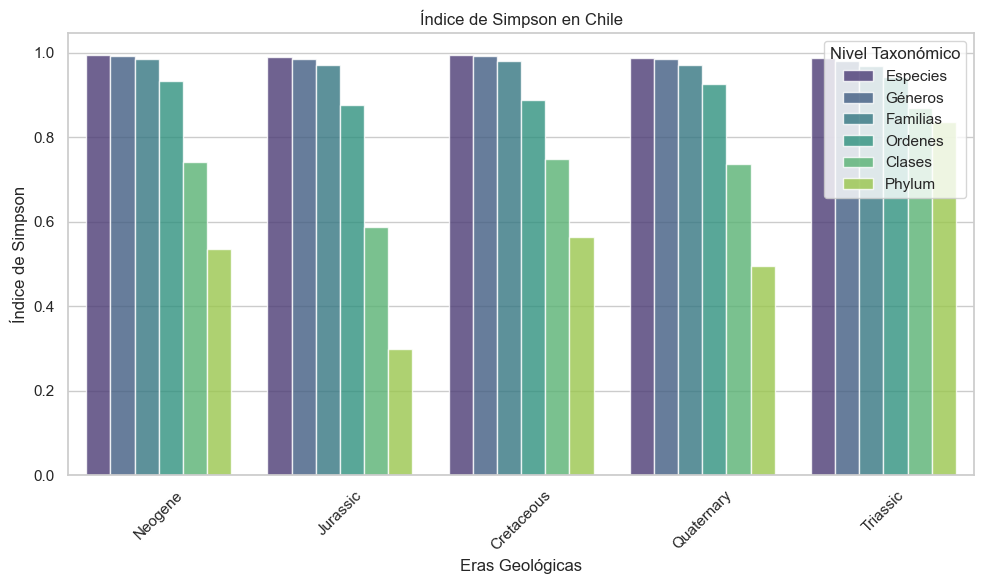

In [107]:
#creamos un df con los indices
df_especies = pd.DataFrame(indices_chile_especies).T
df_generos = pd.DataFrame(indices_chile_generos).T
df_familias = pd.DataFrame(indices_chile_familias).T
df_ordenes = pd.DataFrame(indices_chile_ordenes).T
df_clases = pd.DataFrame(indices_chile_clases).T
df_phylum = pd.DataFrame(indices_chile_phylum).T

#agregamos el nivel taxonomico
df_especies['Nivel'] = 'Especies'
df_generos['Nivel'] = 'Géneros'
df_familias['Nivel'] = 'Familias'
df_ordenes['Nivel'] = 'Ordenes'
df_clases['Nivel'] = 'Clases'
df_phylum['Nivel'] = 'Phylum'

#concatenamos
df_total_chile = pd.concat([df_especies, df_generos, df_familias, df_ordenes, df_clases, df_phylum])
df_total_chile.reset_index(inplace=True)
df_total_chile.rename(columns={'index': 'Era'}, inplace=True)

sns.set_theme(style="whitegrid")

#shannon
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_chile,x='Era', y='Shannon', hue='Nivel',palette='viridis', alpha=0.8)
plt.title('Índice de Shannon en Chile')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Shannon')
plt.legend(title='Nivel Taxonómico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#simpson
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_chile,x='Era', y='Simpson', hue='Nivel',palette='viridis', alpha=0.8)
plt.title('Índice de Simpson en Chile')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Simpson')
plt.legend(title='Nivel Taxonómico', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Observaciones**

1. **Neogene como la era de mayor diversidad**:
   - El **Neogene** destaca como la era con los índices de Shannon más altos en todos los niveles taxonómicos, desde especies hasta filos. 
   - Esto sugiere una biodiversidad excepcionalmente rica y bien distribuida durante este período, reflejando condiciones ambientales favorables o eventos evolutivos significativos.

2. **Cretaceous con una alta diversidad**:
   - El **Cretaceous** muestra valores altos en los índices de Shannon para géneros y familias, aunque en niveles superiores, como órdenes y clases, se observa una ligera disminución en la diversidad.
   - Los índices de Simpson para esta era indican una buena equitatividad, lo que implica una distribución equilibrada entre los grupos presentes.

3. **Triassic como la era de menor diversidad**:
   - En todos los niveles taxonómicos, el **Triassic** presenta los índices de Shannon más bajos. Esto indica una riqueza limitada en comparación con otras eras.
   - Los índices de Simpson también muestran una menor equitatividad relativa, lo que sugiere una dominancia de unos pocos grupos durante esta era.

4. **Relación entre niveles taxonómicos**:
   - A medida que se asciende en la jerarquía taxonómica, desde especies hasta filos, los índices de Shannon disminuyen de manera consistente. Esto refleja que, aunque hay muchas especies presentes, el número de grupos en niveles superiores es más reducido.
   
   - Por otro lado, los índices de Simpson permanecen altos en los primeros 3 niveles, lo que indica una distribución uniforme entre estos grupos. Sin embargo, a medida que se analizan niveles taxonómicos más amplios, como el orden, la clase y el filo, la uniformidad disminuye, lo que refleja una mayor concentración de diversidad en ciertos grupos dominantes dentro de estas categorías más generales.


### **Conclusión**:
El análisis de los niveles taxonómicos desde especies hasta filos resalta al **Neogene** como la era con la biodiversidad más rica y balanceada en Chile. Aunque otras eras como el **Cretaceous** muestran una diversidad significativa, el **Triassic** evidencia una biodiversidad más limitada. Este análisis proporciona una visión integral de cómo la biodiversidad fósil varía a través del tiempo y entre niveles taxonómicos.


## Argentina


In [110]:
argentina_df.dropna(subset=['accepted_name', 'genus', 'family', "order", "class", "phylum"], inplace=True)

In [111]:
top5_argentina_especies = argentina_df.groupby('era_early')['accepted_name'].nunique().nlargest(5)

print("Top 5 eras por especies únicas en Argentina:")
print(top5_argentina_especies)

Top 5 eras por especies únicas en Argentina:
era_early
Paleogene     1904
Cretaceous    1843
Neogene       1815
Ordovician     914
Jurassic       682
Name: accepted_name, dtype: int64


## Cálculo de Índices de Biodiversidad

A continuación, calcularemos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Argentina a cada nivel taxonómico (especies, géneros y familias).


In [113]:
argentina_df_p2_genero = argentina_df.drop(argentina_df[argentina_df['genus'] == 'NO_GENUS_SPECIFIED'].index)
argentina_df_p2_familias = argentina_df.drop(argentina_df[argentina_df['family'] == 'NO_FAMILY_SPECIFIED'].index)
argentina_df_p2_ordenes = argentina_df.drop(argentina_df[argentina_df['order'] == 'NO_ORDER_SPECIFIED'].index)
argentina_df_p2_clases = argentina_df.drop(argentina_df[argentina_df['class'] == 'NO_CLASS_SPECIFIED'].index)
argentina_df_p2_phylum = argentina_df.drop(argentina_df[argentina_df['phylum'] == 'NO_PHYLUM_SPECIFIED'].index)


In [114]:
indices_argentina_especies = calcular_indices(argentina_df, top5_argentina_especies, 'accepted_name')
indices_argentina_generos = calcular_indices(argentina_df_p2_genero, top5_argentina_especies, 'genus')
indices_argentina_familias = calcular_indices(argentina_df_p2_familias, top5_argentina_especies, 'family')  
indices_argentina_ordenes = calcular_indices(argentina_df_p2_ordenes, top5_argentina_especies, 'order')
indices_argentina_clases = calcular_indices(argentina_df_p2_clases, top5_argentina_especies, 'class')
indices_argentina_phylum = calcular_indices(argentina_df_p2_phylum, top5_argentina_especies, 'phylum')

print("\nÍndices por especies en argentina:")
print(pd.DataFrame(indices_argentina_especies).T)

print("\nÍndices por géneros en argentina:")
print(pd.DataFrame(indices_argentina_generos).T)

print("\nÍndices por familias en argentina:")
print(pd.DataFrame(indices_argentina_familias).T)

print("\nÍndices por ordenes en argentina:")
print(pd.DataFrame(indices_argentina_ordenes).T)

print("\nÍndices por clases en argentina:")
print(pd.DataFrame(indices_argentina_clases).T)

print("\nÍndices por phylum en argentina:")
print(pd.DataFrame(indices_argentina_phylum).T)


Índices por especies en argentina:
              Shannon   Simpson
Paleogene    9.960087  0.998153
Cretaceous   9.971598  0.998042
Neogene     10.022243  0.998383
Ordovician   8.958215  0.996215
Jurassic     8.578481  0.995255

Índices por géneros en argentina:
             Shannon   Simpson
Paleogene   9.091181  0.996431
Cretaceous  9.090625  0.996487
Neogene     8.914170  0.996100
Ordovician  7.953243  0.990930
Jurassic    7.963408  0.993094

Índices por familias en argentina:
             Shannon   Simpson
Paleogene   7.215504  0.986745
Cretaceous  7.134241  0.987567
Neogene     6.680568  0.982380
Ordovician  5.921207  0.951311
Jurassic    6.242092  0.978097

Índices por ordenes en argentina:
             Shannon   Simpson
Paleogene   5.582721  0.956545
Cretaceous  5.531884  0.962231
Neogene     4.541274  0.898159
Ordovician  4.375513  0.914334
Jurassic    3.639628  0.825434

Índices por clases en argentina:
             Shannon   Simpson
Paleogene   3.574494  0.856349
Cretaceous  

## Visualización de Índices de Biodiversidad en Argentina

A continuación, graficaremos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Argentina, comparando los diferentes niveles taxonómicos.


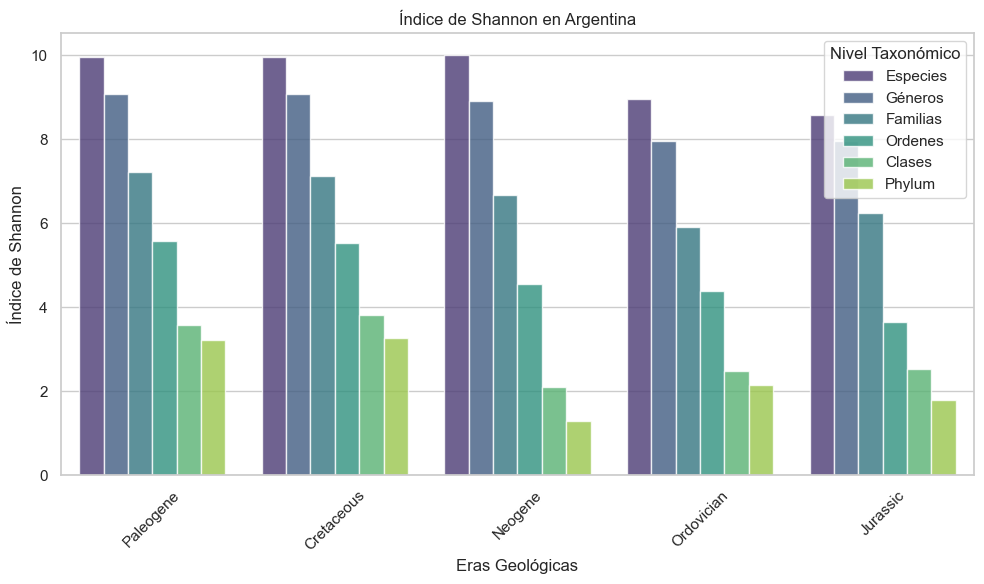

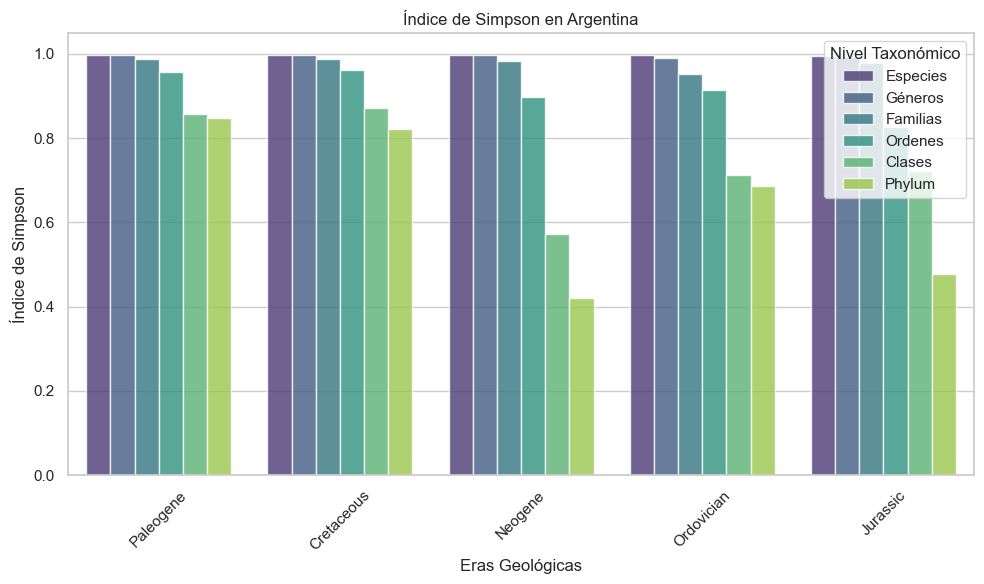

In [116]:
df_especies = pd.DataFrame(indices_argentina_especies).T
df_generos = pd.DataFrame(indices_argentina_generos).T
df_familias = pd.DataFrame(indices_argentina_familias).T
df_ordenes = pd.DataFrame(indices_argentina_ordenes).T
df_clases = pd.DataFrame(indices_argentina_clases).T
df_phylum = pd.DataFrame(indices_argentina_phylum).T

df_especies['Nivel'] = 'Especies'
df_generos['Nivel'] = 'Géneros'
df_familias['Nivel'] = 'Familias'
df_ordenes['Nivel'] = 'Ordenes'
df_clases['Nivel'] = 'Clases'
df_phylum['Nivel'] = 'Phylum'

df_total_argentina = pd.concat([df_especies, df_generos, df_familias, df_ordenes, df_clases, df_phylum])
df_total_argentina.reset_index(inplace=True)
df_total_argentina.rename(columns={'index': 'Era'}, inplace=True)


sns.set_theme(style="whitegrid")

#shannon
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_argentina, x='Era', y='Shannon', hue='Nivel', palette='viridis', alpha=0.8)
plt.title('Índice de Shannon en Argentina')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Shannon')
plt.legend(title='Nivel Taxonómico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#simpson
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_argentina, x='Era', y='Simpson', hue='Nivel',palette='viridis', alpha=0.8)
plt.title('Índice de Simpson en Argentina')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Simpson')
plt.legend(title='Nivel Taxonómico', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Observaciones**

1. **Paleogene y Cretaceous como las eras más diversas**:
   - El **Paleogene** y el **Cretaceous** sobresalen con los índices de Shannon más altos en todos los niveles taxonómicos, desde especies hasta filos. Esto los posiciona como los períodos con mayor riqueza taxonómica.

2. **Neogene con alta diversidad**:
   - El **Neogene** muestra valores elevados de Shannon, especialmente en los niveles de especies, géneros y familias. Sin embargo, la diversidad tiende a disminuir ligeramente en niveles más generales, como órdenes y clases.

3. **Jurassic con menor diversidad relativa**:
   - El **Jurassic** presenta índices de Shannon más bajos que las demás eras, particularmente en los niveles de especies y géneros, lo que indica una menor riqueza taxonómica durante este período en comparación con el **Paleogene** y el **Cretaceous**.

### **Conclusión**:
El análisis de múltiples niveles taxonómicos revela que el **Paleogene** y el **Cretaceous** se destacan como las eras más diversas, seguidas por el **Neogene**. A pesar de estas diferencias en riqueza, los altos índices de Simpson observados en todas las eras reflejan una distribución relativamente equilibrada entre los grupos presentes, subrayando la estabilidad ecológica de los ecosistemas fósiles en estas épocas.

## Antartica

In [119]:
antartica_df.dropna(subset=['accepted_name', 'genus', 'family', "order", "class", "phylum"], inplace=True)

In [120]:
top5_antartica_especies = antartica_df.groupby('era_early')['accepted_name'].nunique().nlargest(5)

print("Top 5 eras por especies únicas en Antartica:")
print(top5_antartica_especies)


Top 5 eras por especies únicas en Antartica:
era_early
Cretaceous    1082
Paleogene      682
Jurassic       398
Cambrian       197
Neogene        110
Name: accepted_name, dtype: int64


In [121]:
antartica_df.dropna(subset=['accepted_name', 'genus', 'family', "order", "class", "phylum"], inplace=True)

## Cálculo de Índices de Biodiversidad

A continuación, calcularemos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Antartica a cada nivel taxonómico (especies, géneros y familias).


In [123]:
antartica_df_p2_genus = antartica_df[antartica_df.family != 'NO_GENUS_SPECIFIED']
antartica_df_p2_familias= antartica_df[antartica_df.family != 'NO_FAMILY_SPECIFIED']
antartica_df_p2_ordenes = antartica_df[antartica_df.order != 'NO_ORDER_SPECIFIED']
antartica_df_p2_clases = antartica_df[antartica_df['class'] != 'NO_CLASS_SPECIFIED']    
antartica_df_p2_phylum = antartica_df[antartica_df['phylum'] != 'NO_PHYLUM_SPECIFIED']


In [124]:
indices_antartica_especies = calcular_indices(antartica_df, top5_antartica_especies, 'accepted_name')
indices_antartica_generos = calcular_indices(antartica_df_p2_genus, top5_antartica_especies, 'genus')  
indices_antartica_familias = calcular_indices(antartica_df_p2_familias, top5_antartica_especies, 'family')  
indices_antartica_ordenes = calcular_indices(antartica_df_p2_ordenes, top5_antartica_especies, 'order')
indices_antartica_clases = calcular_indices(antartica_df_p2_clases, top5_antartica_especies, 'class')
indices_antartica_phylum = calcular_indices(antartica_df_p2_phylum, top5_antartica_especies, 'phylum')

print("\nÍndices por especies en antartica:")
print(pd.DataFrame(indices_antartica_especies).T)

print("\nÍndices por géneros en antartica:")
print(pd.DataFrame(indices_antartica_generos).T)

print("\nÍndices por familias en antartica:")
print(pd.DataFrame(indices_antartica_familias).T)

print("\nÍndices por ordenes en antartica:")
print(pd.DataFrame(indices_antartica_ordenes).T)

print("\nÍndices por clases en antartica:")
print(pd.DataFrame(indices_antartica_clases).T)

print("\nÍndices por phylum en antartica:")
print(pd.DataFrame(indices_antartica_phylum).T)


Índices por especies en antartica:
             Shannon   Simpson
Cretaceous  9.017879  0.996338
Paleogene   8.359675  0.992989
Jurassic    7.980337  0.994396
Cambrian    7.421521  0.993008
Neogene     6.544330  0.986676

Índices por géneros en antartica:
             Shannon   Simpson
Cretaceous  8.212143  0.993433
Paleogene   7.835154  0.989796
Jurassic    6.404770  0.976696
Cambrian    7.168272  0.991198
Neogene     6.310020  0.982459

Índices por familias en antartica:
             Shannon   Simpson
Cretaceous  6.199853  0.973108
Paleogene   6.560792  0.978556
Jurassic    5.172061  0.943419
Cambrian    6.234134  0.981812
Neogene     5.627235  0.969219

Índices por ordenes en antartica:
             Shannon   Simpson
Cretaceous  4.731771  0.915555
Paleogene   5.367070  0.959072
Jurassic    2.364538  0.688997
Cambrian    4.318983  0.928490
Neogene     3.593081  0.856047

Índices por clases en antartica:
             Shannon   Simpson
Cretaceous  3.510670  0.869877
Paleogene   3.5500

## Visualización de Índices de Biodiversidad en Antartica

A continuación, graficaremos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Antartica, comparando los diferentes niveles taxonómicos.


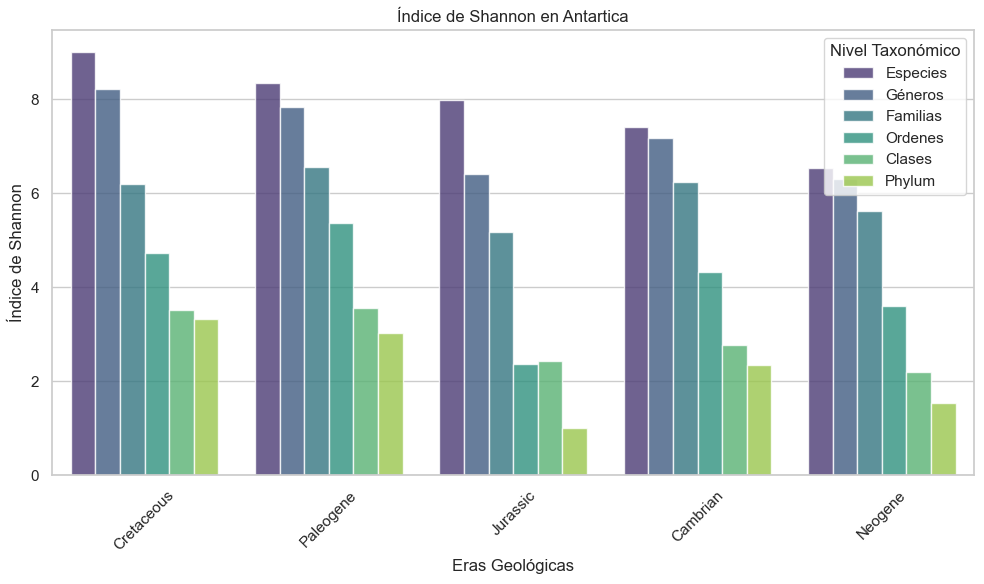

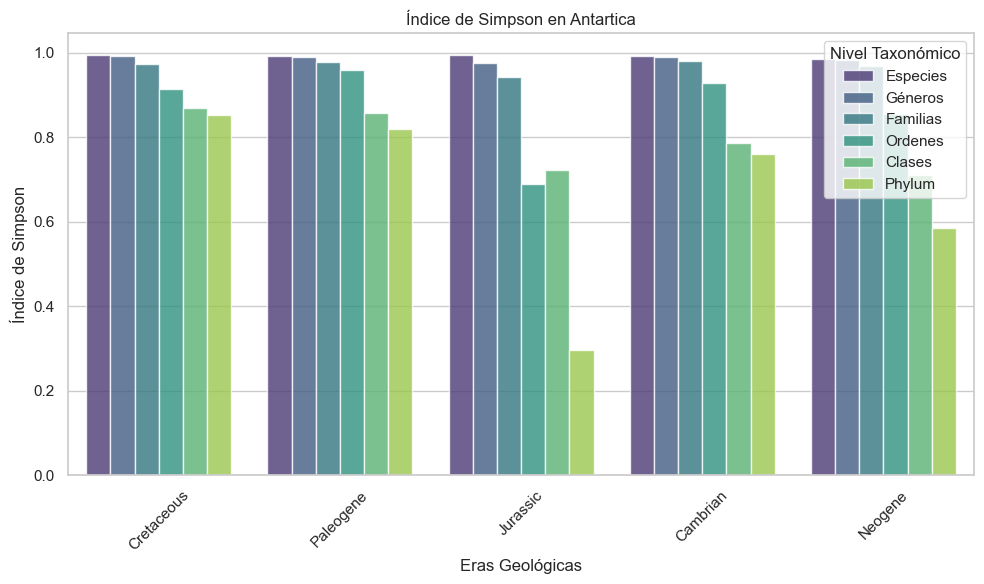

In [126]:
df_especies = pd.DataFrame(indices_antartica_especies).T
df_generos = pd.DataFrame(indices_antartica_generos).T
df_familias = pd.DataFrame(indices_antartica_familias).T
df_ordenes = pd.DataFrame(indices_antartica_ordenes).T
df_clases = pd.DataFrame(indices_antartica_clases).T
df_phylum = pd.DataFrame(indices_antartica_phylum).T

df_especies['Nivel'] = 'Especies'
df_generos['Nivel'] = 'Géneros'
df_familias['Nivel'] = 'Familias'
df_ordenes['Nivel'] = 'Ordenes'
df_clases['Nivel'] = 'Clases'
df_phylum['Nivel'] = 'Phylum'

df_total_antartica = pd.concat([df_especies, df_generos, df_familias, df_ordenes, df_clases, df_phylum])
df_total_antartica.reset_index(inplace=True)
df_total_antartica.rename(columns={'index': 'Era'}, inplace=True)

sns.set_theme(style="whitegrid")

#shannon
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_antartica,x='Era', y='Shannon', hue='Nivel',palette='viridis', alpha=0.8)
plt.title('Índice de Shannon en Antartica')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Shannon')
plt.legend(title='Nivel Taxonómico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#simpson
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_antartica,x='Era', y='Simpson', hue='Nivel',palette='viridis', alpha=0.8)
plt.title('Índice de Simpson en Antartica')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Simpson')
plt.legend(title='Nivel Taxonómico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Análisis de la biodiversidad en la Antártida**

1. **Cretaceous como era dominante**:
   - La era **Cretaceous** muestra los valores más altos del índice de Shannon en niveles taxonómicos de **especies** y **géneros**, indicando una diversidad significativa en estos niveles.
   - En niveles más amplios, como **familias**, **órdenes**, y **clases**, la diversidad se mantiene elevada pero con una ligera disminución.

2. **Paleogene con alta equitatividad**:
   - El índice de Simpson en el **Paleogene** es consistentemente cercano a 1 para todos los niveles taxonómicos, lo que indica una distribución equilibrada entre los grupos fósiles.
   - Este patrón sugiere un ecosistema más balanceado en comparación con otras eras.

3. **Cambrian como una era taxonómicamente interesante**:
   - Aunque la diversidad en términos de **especies** es menor, el índice de Shannon muestra valores elevados para **géneros** y **familias**, lo que podría reflejar una diversidad estructural más notable en niveles amplios.

4. **Neogene con diversidad más limitada**:
   - El **Neogene** presenta valores más bajos en los índices de Shannon y Simpson, especialmente en **especies** y **géneros**, lo que sugiere una menor diversidad y equitatividad en esta era.

5. **Relación entre niveles taxonómicos**:
   - Los índices muestran una caída progresiva desde **especies** hacia **phylum**, indicando una disminución en la diversidad a medida que se amplía el nivel taxonómico. Este patrón es consistente con las otras regiones estudiadas.


### **Conclusión**
La Antártida muestra patrones únicos de biodiversidad fósil, donde eras como el **Cretaceous** y el **Paleogene** destacan por su alta diversidad y equitatividad. Sin embargo, en niveles taxonómicos más amplios, como **familias**, **órdenes** y **phylum**, la diversidad disminuye, reflejando una estructura ecológica más concentrada. 

El equilibrio observado en los índices de Simpson sugiere ecosistemas relativamente estables y balanceados en comparación con otras regiones. Esto podría estar relacionado con factores ambientales específicos de la Antártida durante estas eras, como condiciones climáticas o restricciones geográficas. Por otro lado, la menor diversidad en eras como el **Neogene** apunta a posibles limitaciones evolutivas o ambientales en el desarrollo de los ecosistemas en esta región.

---



### Conclusión General

El análisis de la biodiversidad fósil en Chile, Argentina y la Antártida a lo largo de las eras geológicas resalta patrones consistentes y diferencias importantes:

1. **Eras dominantes en biodiversidad**:
   - El **Neogene** sobresale como la era con mayor diversidad en Chile, mientras que el **Paleogene** y el **Cretaceous** lideran en Argentina y la Antártida. Estas eras destacan por sus altos índices de Shannon, que reflejan una rica diversidad taxonómica en todos los niveles.

2. **Relación entre niveles taxonómicos**:
   - A medida que se asciende en la jerarquía taxonómica, desde especies hasta filos, los índices de Shannon disminuyen en todas las regiones. Esto es un reflejo natural, ya que en niveles más amplios se agrupan menos categorías, reduciendo la diversidad observada.
   - Por otro lado, los altos índices de Simpson en niveles más específicos (especies, géneros y familias) sugieren una distribución uniforme entre los grupos fósiles, destacando ecosistemas relativamente balanceados.

3. **Impacto de las regiones estudiadas**:
   - Al analizar regiones geográficamente extensas como países enteros o la Antártida, es esperable encontrar índices altos de Shannon y Simpson debido al gran número de registros disponibles. Esto subraya la importancia de interpretar estos resultados en un contexto amplio, reconociendo las limitaciones inherentes al trabajar con áreas tan grandes.

4. **Generalidades evolutivas**:
   - Las altas concentraciones de fósiles en ciertas eras y regiones reflejan ecosistemas particularmente favorables para la vida en esos períodos, posiblemente debido a condiciones climáticas y geológicas específicas. En contraste, eras como el **Triassic** y el **Cambrian** muestran una menor diversidad, pero siguen siendo de interés evolutivo.



## ¿Cómo varía la distribución de especies fósiles a lo largo del tiempo en cada región?

### **Estructura del Análisis**

1. **Incorporar Datos Geográficos**:  
   Agregamos una columna para asignar regiones específicas en Chile y Argentina utilizando latitud y longitud, mejorando la organización y el análisis regional.

2. **Calcular Totales de Fósiles**:  
   Estimamos el número total de fósiles en Chile, Argentina y Antártida para obtener una visión general de la riqueza fósil por país.

3. **Definir las Top 5 Eras**:  
   Identificamos las cinco eras con mayor riqueza de fósiles en cada país, enfocando el análisis en los períodos más relevantes.

4. **Visualizar en Mapas**:  
   Creamos mapas para las top 5 eras de cada región, facilitando la comparación visual de la distribución de fósiles.

5. **Comparar Eras entre Países**:  
   Analizamos diferencias en las eras comunes entre Chile, Argentina y Antártida.

6. **Interpretar Resultados**:  
   Discutimos las diferencias en la biodiversidad fósil entre las regiones y sus implicaciones ecológicas y geológicas.


In [132]:
from shapely.geometry import Point

# creamos la función asignar_regiones
def asignar_regiones(df, lat_col, lng_col, shapefile_path):
    
    regiones = gpd.read_file(shapefile_path).to_crs(4326)

    # transformar en gdf
    df['geometry'] = df.apply(lambda row: Point(row[lng_col], row[lat_col]), axis=1)
    geo_df = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')

    # union
    resultado = gpd.sjoin(geo_df, regiones, how='left', predicate='intersects')

    resultado = resultado.drop(columns='geometry')

    return resultado

shapefile_path = os.path.join('data', 'Regional.shp')
# asignar regiones
resultado = asignar_regiones(chile_df, 'lat', 'lng', shapefile_path)

chile_df['region'] = resultado['Region']  

print(chile_df[['species_name', 'lat', 'lng', 'region']])
chile_df = chile_df.drop(columns='geometry', errors='ignore')

     species_name        lat        lng  \
0       ceciliana -37.000000 -73.000000   
1      amuriensis -37.000000 -73.000000   
2     cuneiformis -37.000000 -73.000000   
3     levitestata -37.000000 -73.000000   
4         pencana -37.000000 -73.000000   
...           ...        ...        ...   
9475          sp. -50.884998 -72.625000   
9476          sp. -50.884998 -72.625000   
9477   antarctica -50.884998 -72.625000   
9478          sp. -50.884998 -72.625000   
9479   saladensis -27.684723 -70.949997   

                                        region  
0                           Región del Bío-Bío  
1                           Región del Bío-Bío  
2                           Región del Bío-Bío  
3                           Región del Bío-Bío  
4                           Región del Bío-Bío  
...                                        ...  
9475  Región de Magallanes y Antártica Chilena  
9476  Región de Magallanes y Antártica Chilena  
9477  Región de Magallanes y Antártica Chi

Ahora veremos cuantos fosiles hay en chile y como estan distribuidos por todo el pais separandolo por region.

                                       region  total_ocurrencias
0                Región de Arica y Parinacota               39.0
1                          Región de Tarapacá              101.0
2                       Región de Antofagasta              808.0
3    Región de Magallanes y Antártica Chilena              493.0
4   Región de Aysén del Gral.Ibañez del Campo              487.0
5                           Región de Atacama             4407.0
6                          Región de Coquimbo              602.0
7                        Región de Valparaíso               39.0
8            Región Metropolitana de Santiago              438.0
9                         Región de Los Lagos              171.0
10                         Región de Los Ríos               10.0
11                     Región de La Araucanía               12.0
12                         Región del Bío-Bío              240.0
13                            Región de Ñuble               31.0
14                       

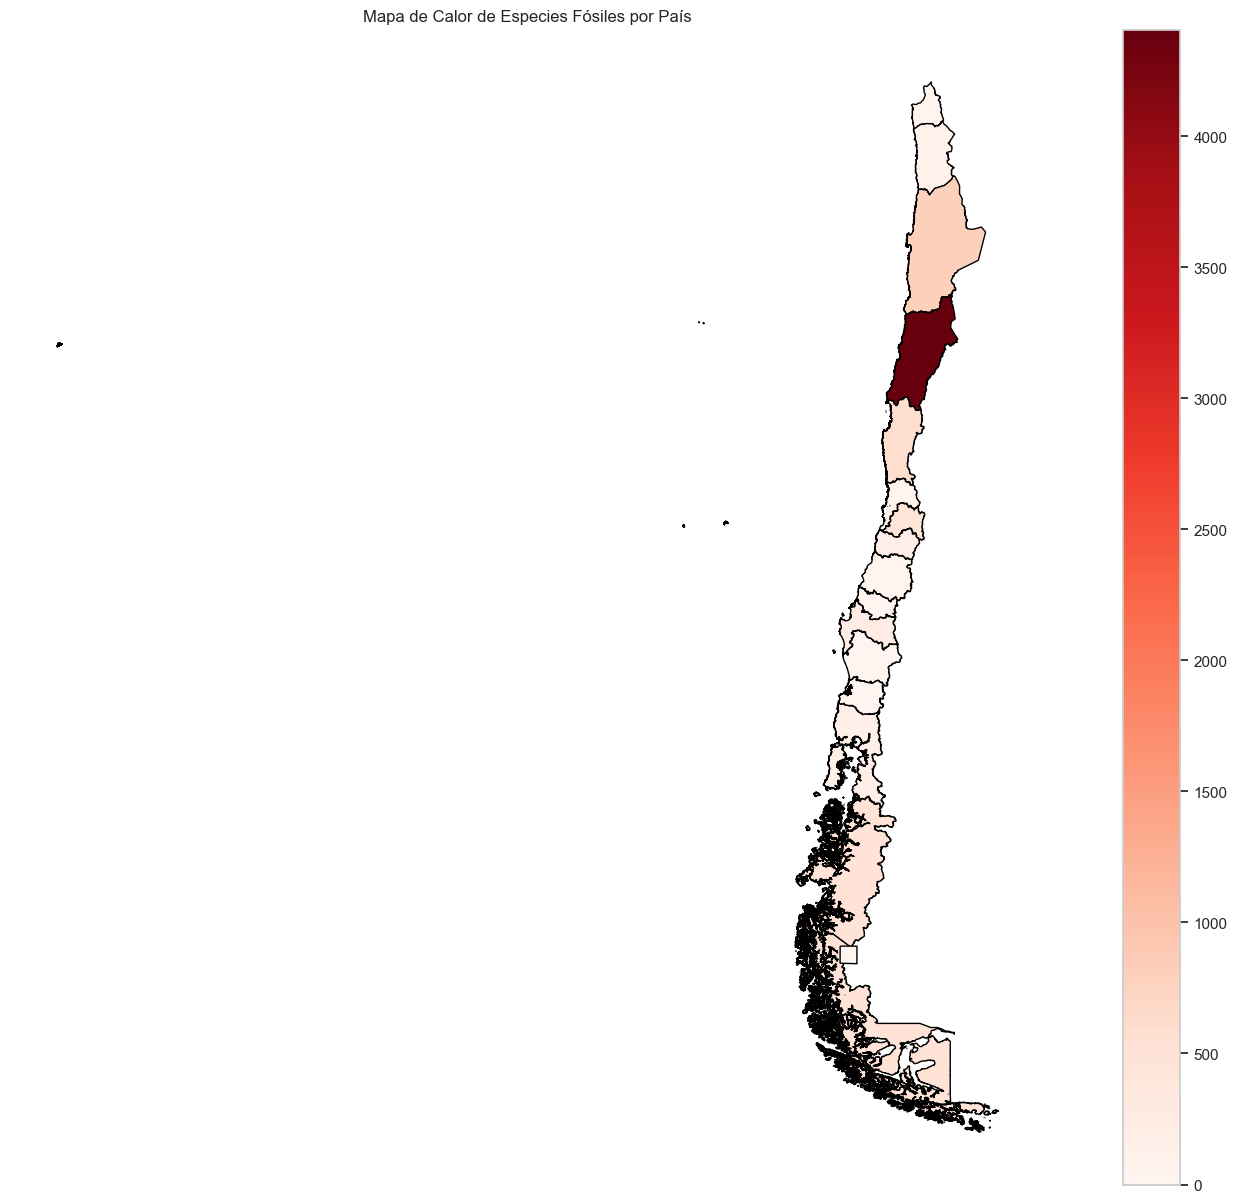

In [134]:

paises = gpd.read_file(shapefile_path).to_crs(4326)
df = pd.concat([chile_df, argentina_df, antartica_df], ignore_index=True)

distribucion = df.groupby('region').agg({'species_name': 'count'}).reset_index()
distribucion.rename(columns={'species_name': 'total_ocurrencias'}, inplace=True)

paises = paises.rename(columns={'Region': 'region'})

paises['region'] = paises['region'].astype(str)
distribucion['region'] = distribucion['region'].astype(str)

merged = paises.merge(distribucion, on='region', how='left')
merged['total_ocurrencias'] = merged['total_ocurrencias'].fillna(0)

print(merged[['region', 'total_ocurrencias']])

fig, ax = plt.subplots(1, 1, figsize=(20, 15))
merged.plot(column='total_ocurrencias', ax=ax, legend=True,
            cmap='Reds', vmin=0, vmax=merged['total_ocurrencias'].max(),
            edgecolor='black')

ax.set_title('Mapa de Calor de Especies Fósiles por País')
ax.set_axis_off()  

plt.show()

Se puede ver en el anterior mapa que el mapa de calor y la mayor cantidad de fosiles estan en la region de atacama. 

Como lo hicimos en Chile con las regiones lo haremos con el simil de argentina el cual son las provincias.

In [137]:
def asignar_provincias(df, lat_col, lng_col, shapefile_path):
    provincias = gpd.read_file(shapefile_path).to_crs(4326)
    print(provincias.columns)
    
    df['geometry'] = df.apply(lambda row: Point(row[lng_col], row[lat_col]), axis=1)
    geo_df = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')

    resultados_arg = gpd.sjoin(geo_df, provincias, how='left', predicate='intersects')
    resultados_arg = resultados_arg.drop(columns='geometry')

    return resultados_arg


shapefile_path_pro = os.path.join('data','provincia.shp')


resultados_arg = asignar_provincias(argentina_df, 'lat', 'lng', shapefile_path_pro)
print(resultados_arg.columns)

argentina_df['region'] = resultados_arg['nam'] 

print(argentina_df[['species_name', 'lat', 'lng', 'region']])
argentina_df = argentina_df.drop(columns='geometry', errors='ignore')

Index(['gid', 'entidad', 'fna', 'gna', 'nam', 'in1', 'fdc', 'sag', 'geometry'], dtype='object')
Index(['species_name', 'occurrence_no', 'accepted_name', 'early_interval',
       'late_interval', 'phylum', 'class', 'order', 'family', 'genus', 'lat',
       'lng', 'diet', 'life_habit', 'environment', 'taxon_environment',
       'primary_name', 'era_early', 'era_late', 'index_right', 'gid',
       'entidad', 'fna', 'gna', 'nam', 'in1', 'fdc', 'sag'],
      dtype='object')
          species_name        lat        lng   region
0                  sp. -39.000000 -69.000000  Neuquén
1               rocana -39.000000 -69.000000  Neuquén
2           feruglioli -39.000000 -69.000000  Neuquén
3                  sp. -39.000000 -69.000000  Neuquén
4      mechanquilensis -39.000000 -69.000000  Neuquén
...                ...        ...        ...      ...
31876         cretacea -38.099998 -68.383331  Neuquén
31877     macrocephala -38.099998 -68.383331  Neuquén
31878        excellens -38.099998 -68.38

Columnas en el shapefile de provincias: Index(['gid', 'entidad', 'fna', 'gna', 'nam', 'in1', 'fdc', 'sag', 'geometry'], dtype='object')
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                8.0
1                                             Neuquén             3463.0
2                                            San Luis              145.0
3                                            Santa Fe              297.0
4                                            La Rioja              619.0
5                                           Catamarca              480.0
6                                             Tucumán               87.0
7                                               Chaco               30.0
8                                             Formosa                8.0
9                                          Santa Cruz             4655.0
10                                             Chubut        

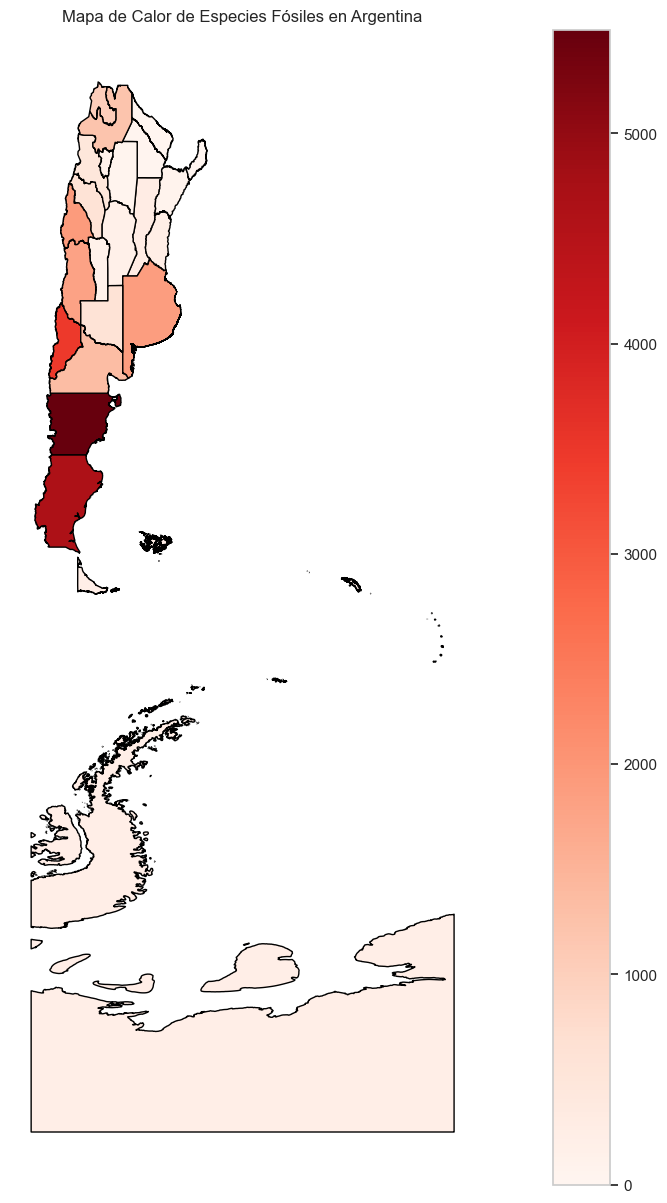

In [138]:
provincias = gpd.read_file(shapefile_path_pro).to_crs(4326)

print("Columnas en el shapefile de provincias:", provincias.columns)

df = pd.concat([chile_df, argentina_df, antartica_df], ignore_index=True)

distribucion = df.groupby('region').agg({'species_name': 'count'}).reset_index()
distribucion.rename(columns={'species_name': 'total_ocurrencias'}, inplace=True)

provincias['nam'] = provincias['nam'].astype(str)  
distribucion['region'] = distribucion['region'].astype(str)  

merged = provincias.merge(distribucion, left_on='nam', right_on='region', how='left')
merged['total_ocurrencias'] = merged['total_ocurrencias'].fillna(0)

print(merged[['nam', 'total_ocurrencias']])

fig, ax = plt.subplots(1, 1, figsize=(20, 15))
merged.plot(column='total_ocurrencias', ax=ax, legend=True,
            cmap='Reds', vmin=0, vmax=merged['total_ocurrencias'].max(),
            edgecolor='black')

ax.set_title('Mapa de Calor de Especies Fósiles en Argentina')
ax.set_axis_off()  

plt.show()

En el anterior mapa podemos ver que en la provincia de Chubut es en la cual esta la mayoria de los fosiles del territorio argentino.

In [140]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo())

ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

ax.scatter(antartica_df['lng'], antartica_df['lat'], color='blue', alpha=0.6, s=10,
           transform=ccrs.PlateCarree())

plt.title('Distribución Geográfica de Especies en la Antártida')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

ModuleNotFoundError: No module named 'cartopy'

Y en este mapa de la antartica se puede ver que justamente en la parte perteneciente a Chile y Argentina es en la cual se ubican la mayoria de hallasgos fosiles

Definiremos las top 5 eras en Chile,Argentina y la Antartica para analizar la pregunta

In [155]:
top_eras_chile = chile_df.groupby('era_early').agg({'species_name': 'count'}).reset_index()

top_eras_chile.rename(columns={'species_name': 'total_fossils'}, inplace=True)

# sorteamos
top_5_eras_chile = top_eras_chile.sort_values(by='total_fossils', ascending=False).head(5)

print(top_5_eras_chile)

     era_early  total_fossils
3     Jurassic           4789
4      Neogene           1658
1   Cretaceous           1107
9   Quaternary            518
10    Triassic            240


In [157]:
top_eras_argentina = argentina_df.groupby('era_early').agg({'species_name': 'count'}).reset_index()

top_eras_argentina.rename(columns={'species_name': 'total_fossils'}, inplace=True)

top_5_eras_argentina = top_eras_argentina.sort_values(by='total_fossils', ascending=False).head(5)

print(top_5_eras_argentina)

    era_early  total_fossils
7   Paleogene           6776
5     Neogene           5913
2  Cretaceous           5743
6  Ordovician           3246
4    Jurassic           2060


In [159]:
top_eras_antartica = antartica_df.groupby('era_early').agg({'species_name': 'count'}).reset_index()

top_eras_antartica.rename(columns={'species_name': 'total_fossils'}, inplace=True)

top_5_eras_antartica = top_eras_antartica.sort_values(by='total_fossils', ascending=False).head(5)

print(top_5_eras_antartica)

    era_early  total_fossils
2  Cretaceous           4468
7   Paleogene           3121
4    Jurassic           1754
0    Cambrian            282
9  Quaternary            204


Ahora lo que haremos es mostrar los 5 mapas de cada uno de los top en chile para ver los posibles cambios en la biodiversidad segun la era.

Datos combinados para la era Jurassic:
                                       region  total_ocurrencias
0                Región de Arica y Parinacota               16.0
1                          Región de Tarapacá               96.0
2                       Región de Antofagasta              606.0
3    Región de Magallanes y Antártica Chilena               14.0
4   Región de Aysén del Gral.Ibañez del Campo                5.0
5                           Región de Atacama             3400.0
6                          Región de Coquimbo              166.0
7                        Región de Valparaíso               16.0
8            Región Metropolitana de Santiago              398.0
9                         Región de Los Lagos                0.0
10                         Región de Los Ríos                0.0
11                     Región de La Araucanía                0.0
12                         Región del Bío-Bío                0.0
13                            Región de Ñuble      

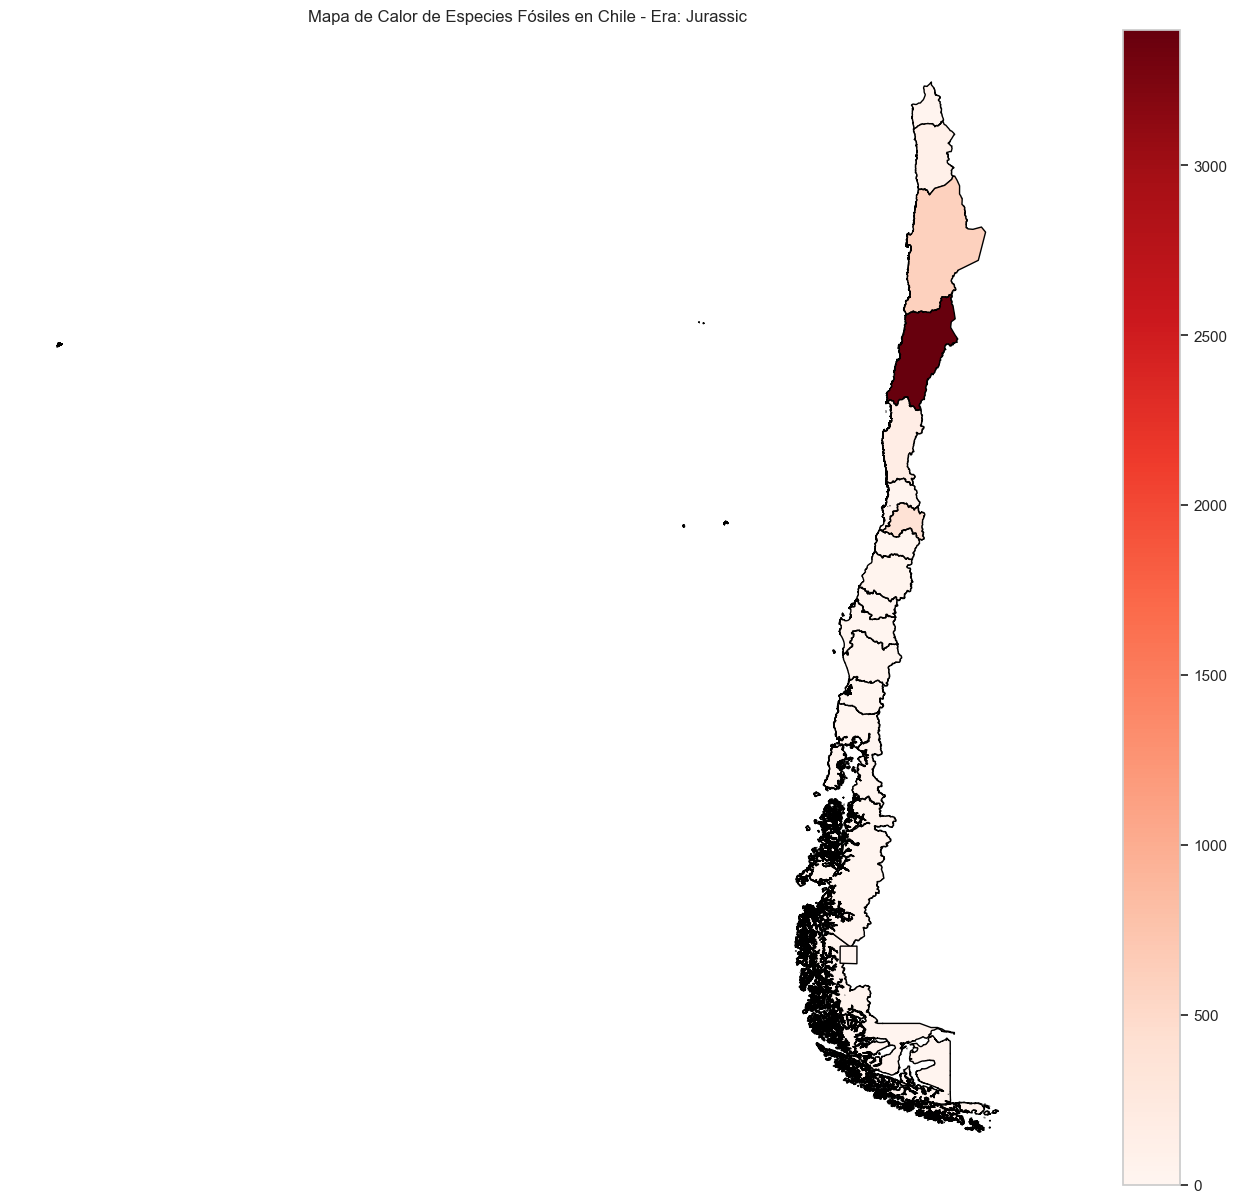

Datos combinados para la era Neogene:
                                       region  total_ocurrencias
0                Región de Arica y Parinacota               20.0
1                          Región de Tarapacá                0.0
2                       Región de Antofagasta               71.0
3    Región de Magallanes y Antártica Chilena               16.0
4   Región de Aysén del Gral.Ibañez del Campo              471.0
5                           Región de Atacama              288.0
6                          Región de Coquimbo              180.0
7                        Región de Valparaíso               17.0
8            Región Metropolitana de Santiago                4.0
9                         Región de Los Lagos              161.0
10                         Región de Los Ríos                2.0
11                     Región de La Araucanía                9.0
12                         Región del Bío-Bío               71.0
13                            Región de Ñuble       

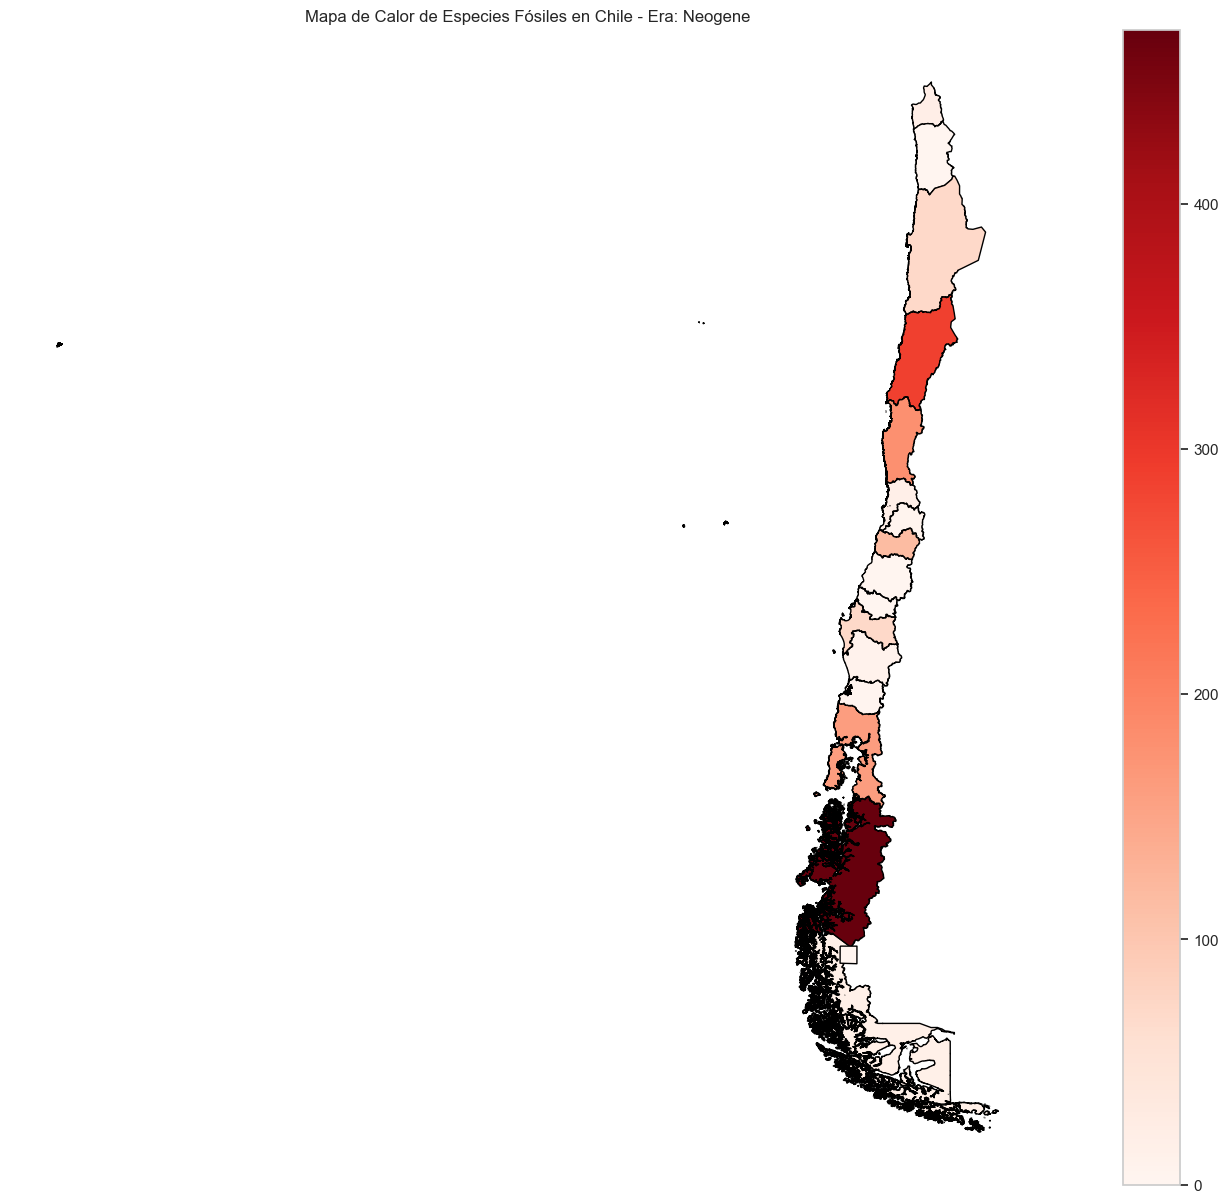

Datos combinados para la era Cretaceous:
                                       region  total_ocurrencias
0                Región de Arica y Parinacota                1.0
1                          Región de Tarapacá                0.0
2                       Región de Antofagasta               12.0
3    Región de Magallanes y Antártica Chilena              349.0
4   Región de Aysén del Gral.Ibañez del Campo                0.0
5                           Región de Atacama              323.0
6                          Región de Coquimbo              189.0
7                        Región de Valparaíso                0.0
8            Región Metropolitana de Santiago               29.0
9                         Región de Los Lagos                0.0
10                         Región de Los Ríos                0.0
11                     Región de La Araucanía                0.0
12                         Región del Bío-Bío               96.0
13                            Región de Ñuble    

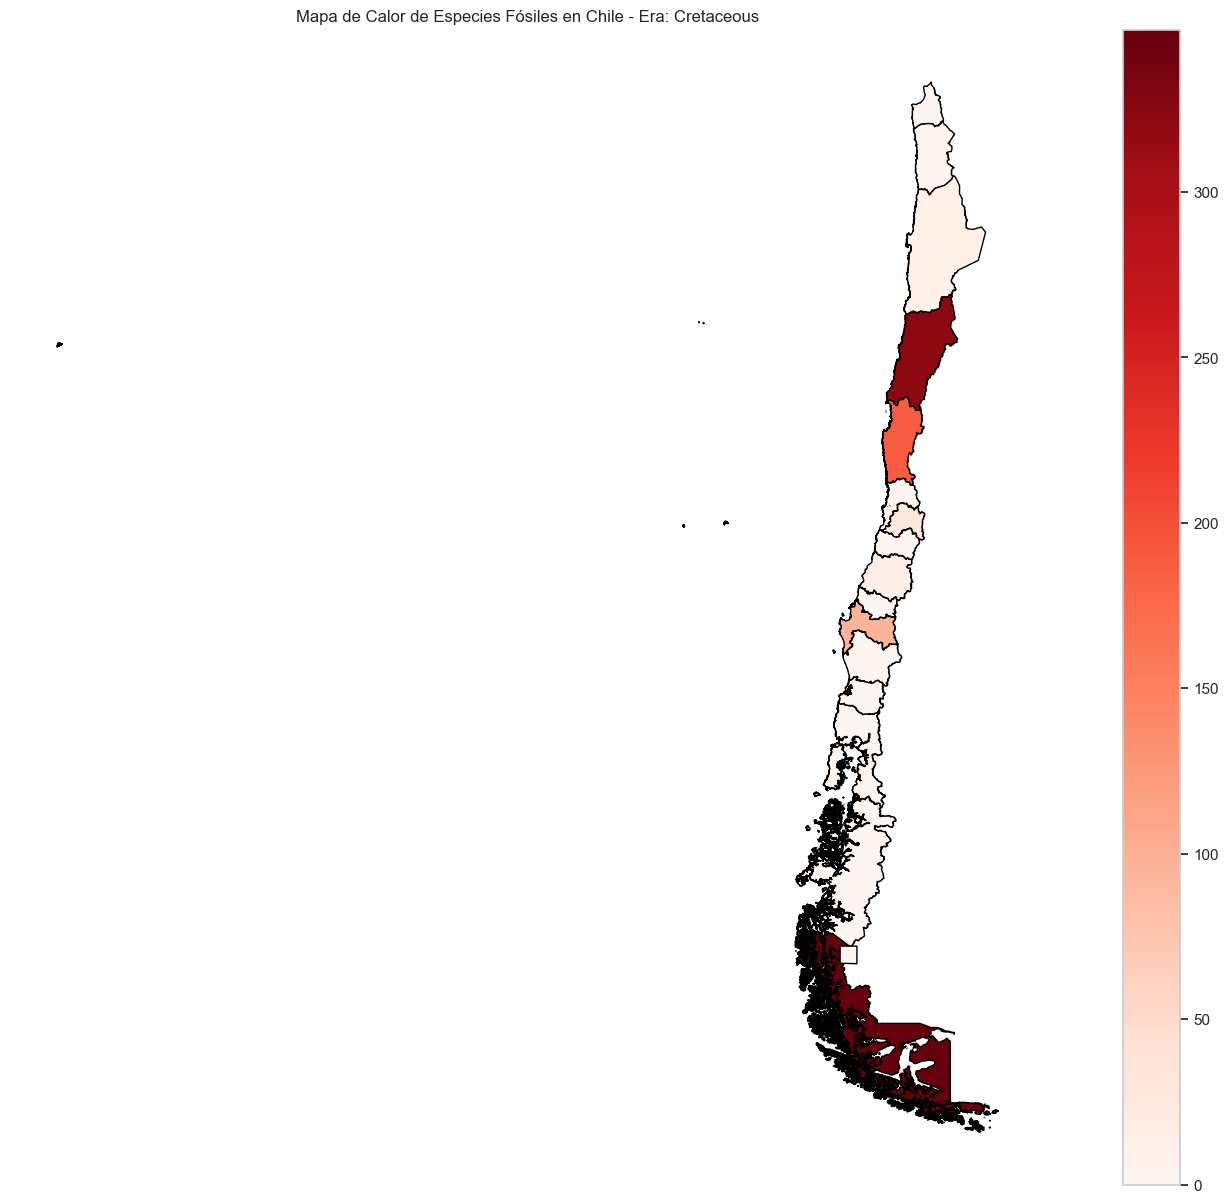

Datos combinados para la era Quaternary:
                                       region  total_ocurrencias
0                Región de Arica y Parinacota                2.0
1                          Región de Tarapacá                4.0
2                       Región de Antofagasta               10.0
3    Región de Magallanes y Antártica Chilena               53.0
4   Región de Aysén del Gral.Ibañez del Campo               10.0
5                           Región de Atacama              238.0
6                          Región de Coquimbo               47.0
7                        Región de Valparaíso                2.0
8            Región Metropolitana de Santiago                7.0
9                         Región de Los Lagos                9.0
10                         Región de Los Ríos                3.0
11                     Región de La Araucanía                3.0
12                         Región del Bío-Bío               25.0
13                            Región de Ñuble    

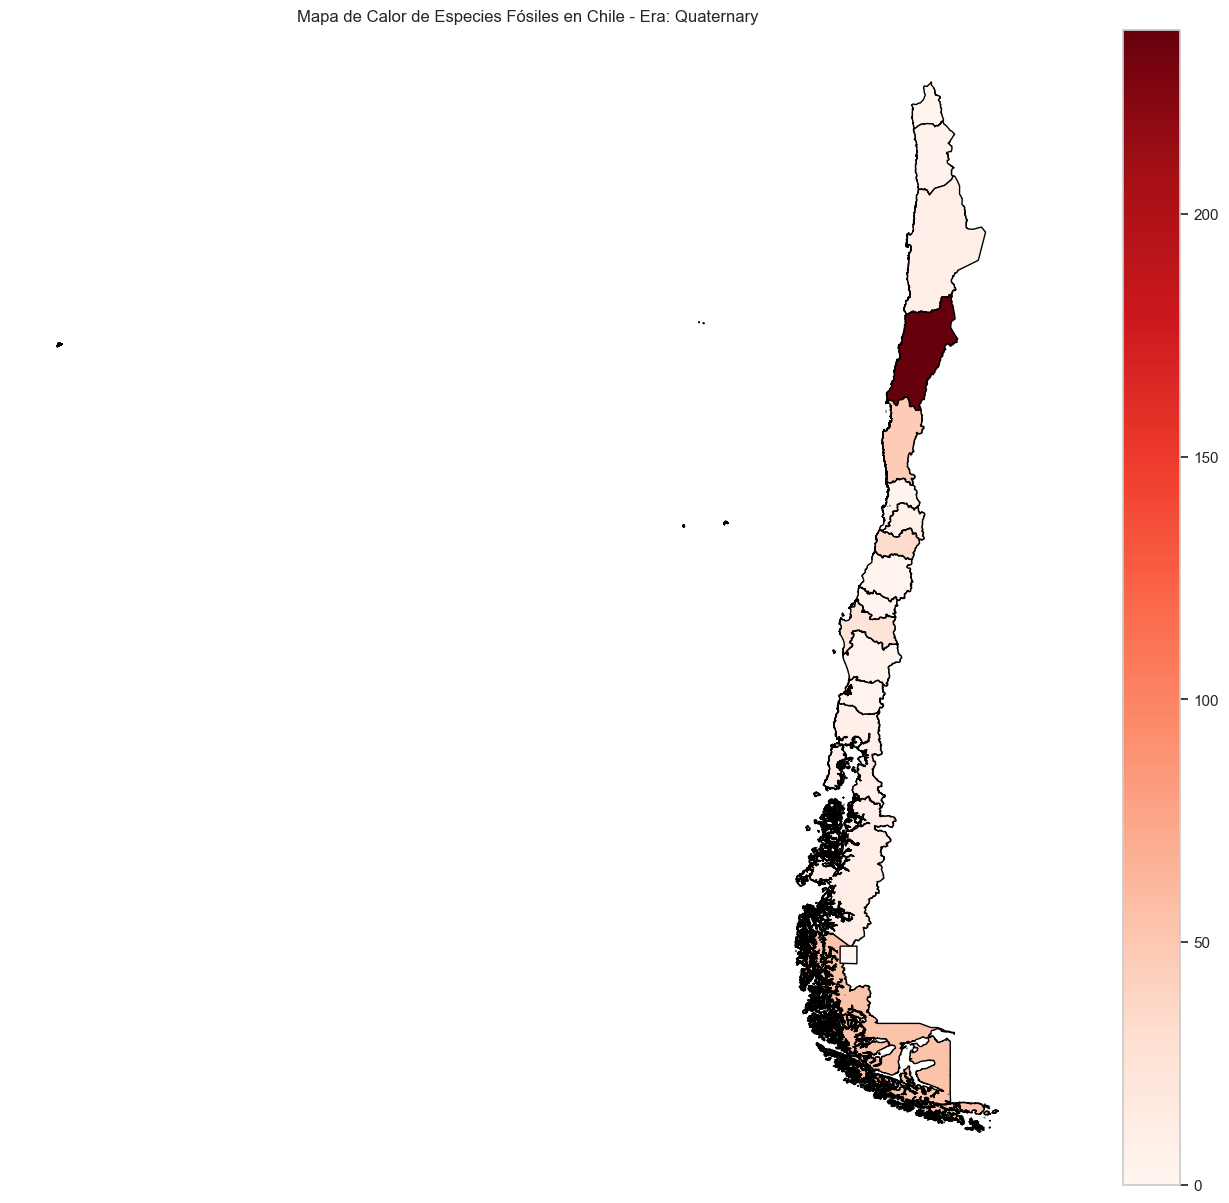

Datos combinados para la era Triassic:
                                       region  total_ocurrencias
0                Región de Arica y Parinacota                0.0
1                          Región de Tarapacá                0.0
2                       Región de Antofagasta               50.0
3    Región de Magallanes y Antártica Chilena                0.0
4   Región de Aysén del Gral.Ibañez del Campo                1.0
5                           Región de Atacama              124.0
6                          Región de Coquimbo                0.0
7                        Región de Valparaíso                4.0
8            Región Metropolitana de Santiago                0.0
9                         Región de Los Lagos                0.0
10                         Región de Los Ríos                5.0
11                     Región de La Araucanía                0.0
12                         Región del Bío-Bío               43.0
13                            Región de Ñuble      

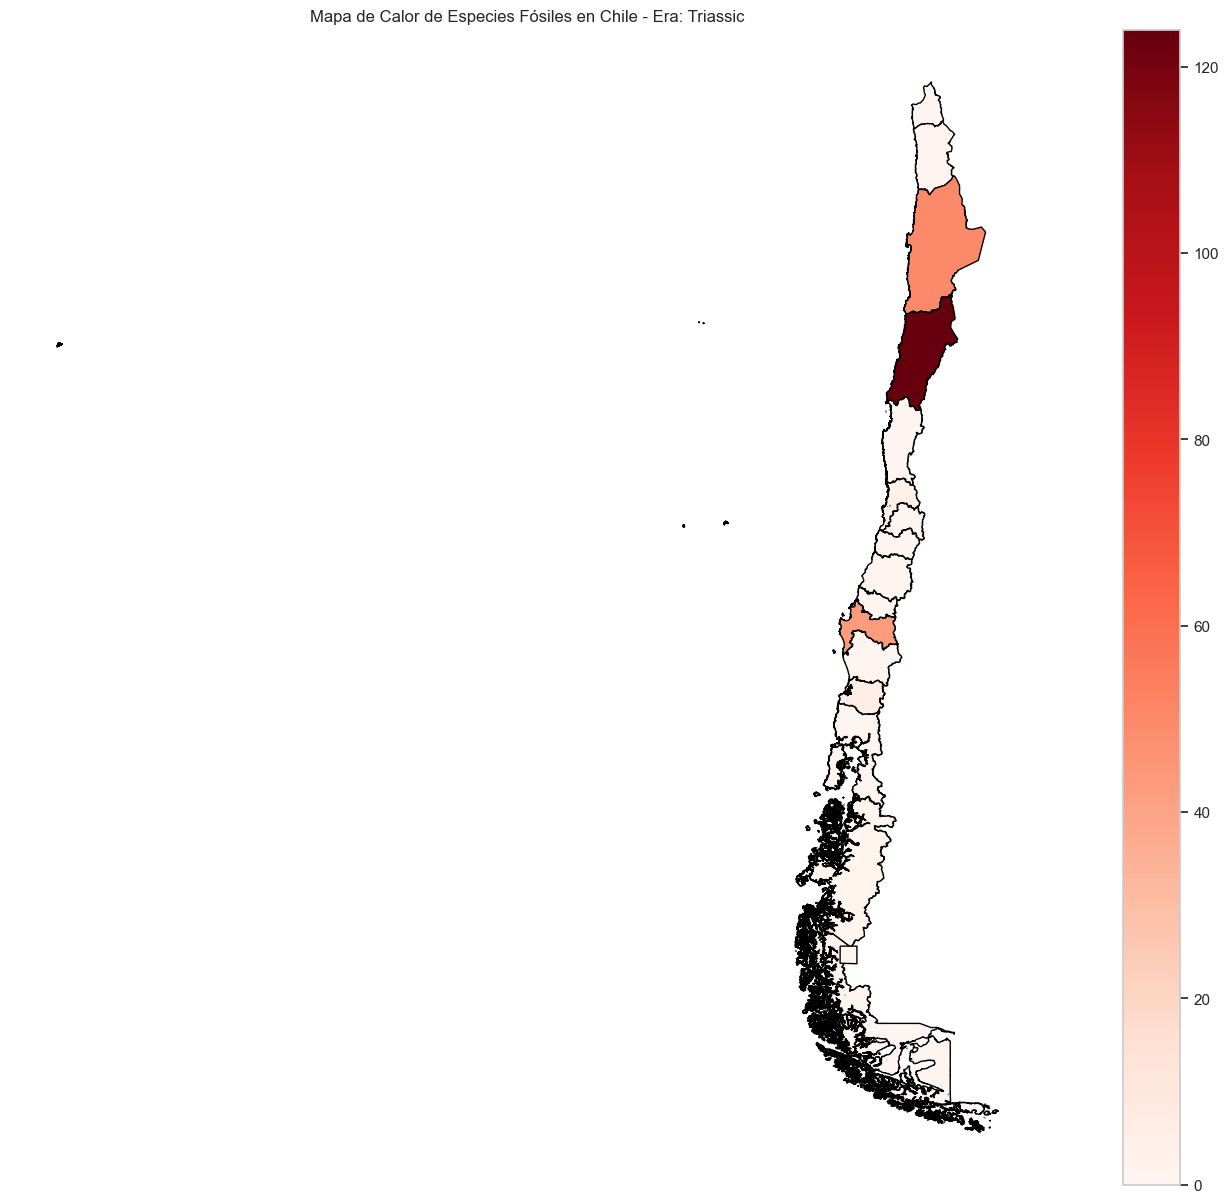

In [162]:
paises = gpd.read_file(shapefile_path).to_crs(4326)

df = pd.concat([chile_df, argentina_df, antartica_df], ignore_index=True)

distribucion = df.groupby(['region', 'era_early']).agg({'species_name': 'count'}).reset_index()
distribucion.rename(columns={'species_name': 'total_ocurrencias'}, inplace=True)

paises = paises.rename(columns={'Region': 'region'})

paises['region'] = paises['region'].astype(str)
distribucion['region'] = distribucion['region'].astype(str)

for era in top_5_eras_chile['era_early']:
    distribucion_era = distribucion[distribucion['era_early'] == era]
    
    merged = paises.merge(distribucion_era, on='region', how='left')
    merged['total_ocurrencias'] = merged['total_ocurrencias'].fillna(0)

    print(f"Datos combinados para la era {era}:")
    print(merged[['region', 'total_ocurrencias']])

    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
    merged.plot(column='total_ocurrencias', ax=ax, legend=True,
                cmap='Reds', vmin=0, vmax=merged['total_ocurrencias'].max(),
                edgecolor='black')

    ax.set_title(f'Mapa de Calor de Especies Fósiles en Chile - Era: {era}')
    ax.set_axis_off()

    plt.show()

Viendo los mapas de calor de las top 5 eras de Chile (Jurassic, Neogene, Cretaceous, Quaternary y Triassic), se observa una tendencia clara hacia una mayor concentración de fósiles en el norte del país, especialmente en la Región de Atacama. Este patrón puede estar relacionado con las características geológicas y climáticas de la zona, que han favorecido la preservación y el descubrimiento de fósiles a lo largo del tiempo.


Ahora haremos los mapas para las top 5 eras en Argentina

C:\Users\ignac\AppData\Local\Temp\ipykernel_9856\2846094503.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribucion_era['region'] = distribucion_era['region'].astype(str)


Datos combinados para la era Paleogene:
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                0.0
1                                             Neuquén              765.0
2                                            San Luis                0.0
3                                            Santa Fe                0.0
4                                            La Rioja                8.0
5                                           Catamarca               26.0
6                                             Tucumán                8.0
7                                               Chaco                0.0
8                                             Formosa                0.0
9                                          Santa Cruz              999.0
10                                             Chubut             3092.0
11                                            Mendoza               77.0
12         

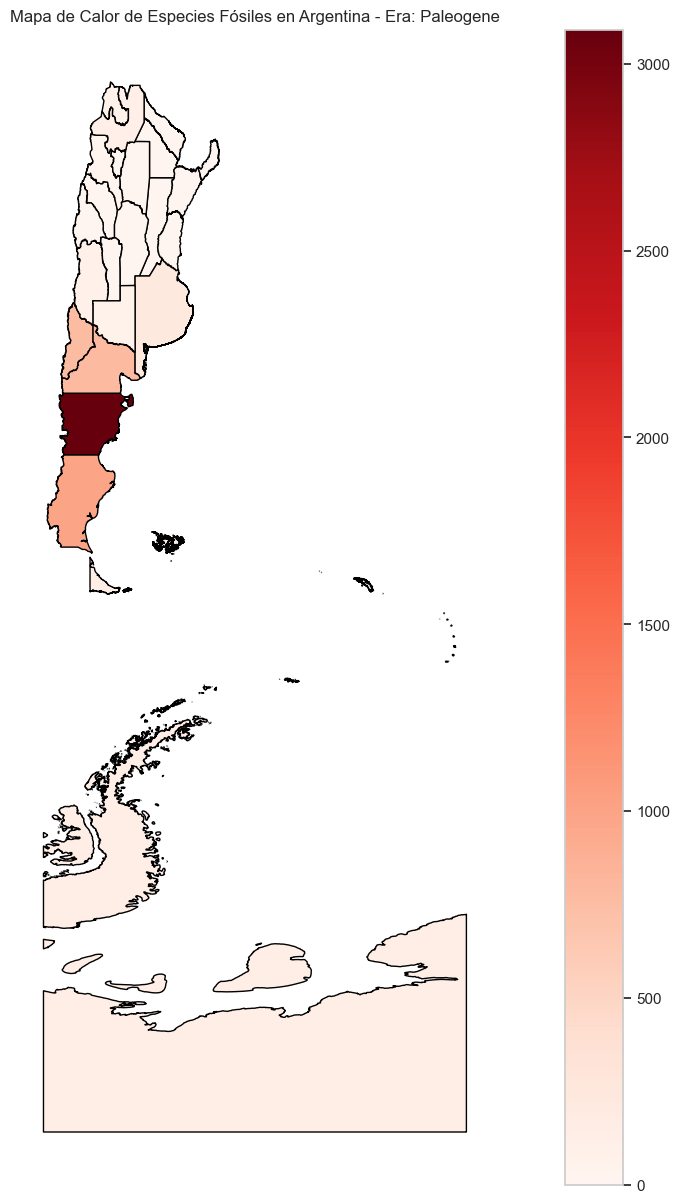

C:\Users\ignac\AppData\Local\Temp\ipykernel_9856\2846094503.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribucion_era['region'] = distribucion_era['region'].astype(str)


Datos combinados para la era Neogene:
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                0.0
1                                             Neuquén               85.0
2                                            San Luis               17.0
3                                            Santa Fe              227.0
4                                            La Rioja               64.0
5                                           Catamarca              353.0
6                                             Tucumán               27.0
7                                               Chaco                4.0
8                                             Formosa                0.0
9                                          Santa Cruz             1623.0
10                                             Chubut              703.0
11                                            Mendoza               88.0
12           

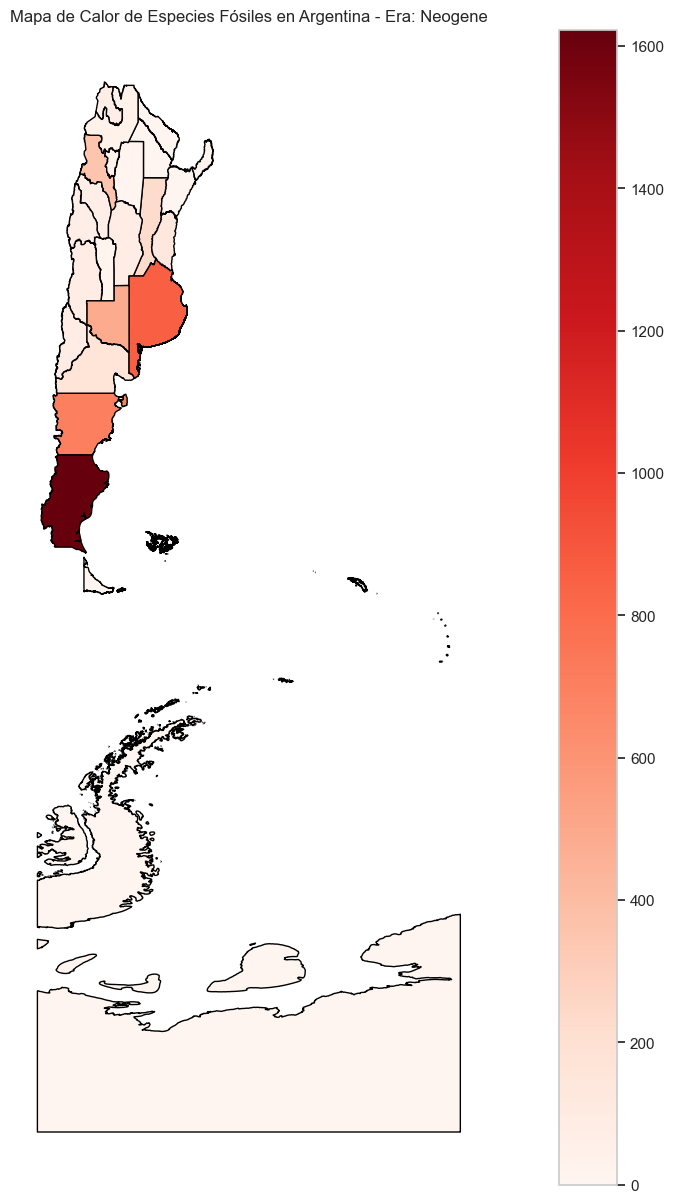

C:\Users\ignac\AppData\Local\Temp\ipykernel_9856\2846094503.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribucion_era['region'] = distribucion_era['region'].astype(str)


Datos combinados para la era Cretaceous:
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                0.0
1                                             Neuquén             1612.0
2                                            San Luis               91.0
3                                            Santa Fe                0.0
4                                            La Rioja                3.0
5                                           Catamarca                0.0
6                                             Tucumán               15.0
7                                               Chaco                0.0
8                                             Formosa                0.0
9                                          Santa Cruz             1832.0
10                                             Chubut             1282.0
11                                            Mendoza              391.0
12        

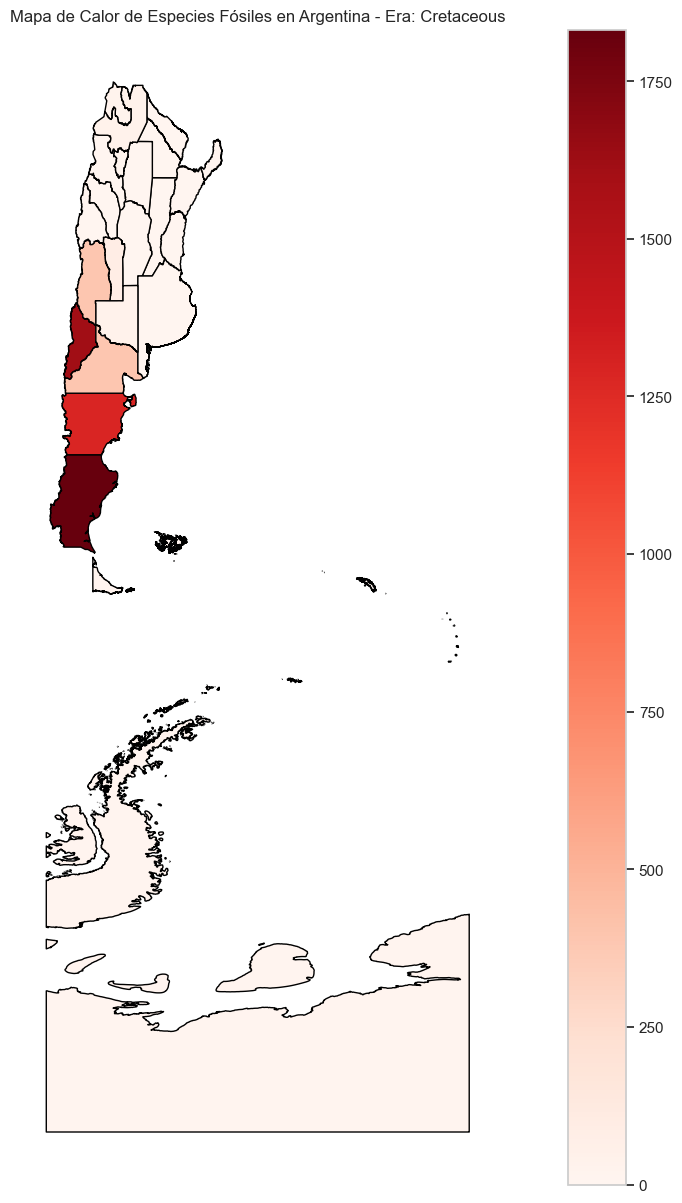

C:\Users\ignac\AppData\Local\Temp\ipykernel_9856\2846094503.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribucion_era['region'] = distribucion_era['region'].astype(str)


Datos combinados para la era Ordovician:
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                0.0
1                                             Neuquén                0.0
2                                            San Luis               12.0
3                                            Santa Fe                0.0
4                                            La Rioja              216.0
5                                           Catamarca               74.0
6                                             Tucumán                0.0
7                                               Chaco                0.0
8                                             Formosa                0.0
9                                          Santa Cruz                0.0
10                                             Chubut                0.0
11                                            Mendoza               95.0
12        

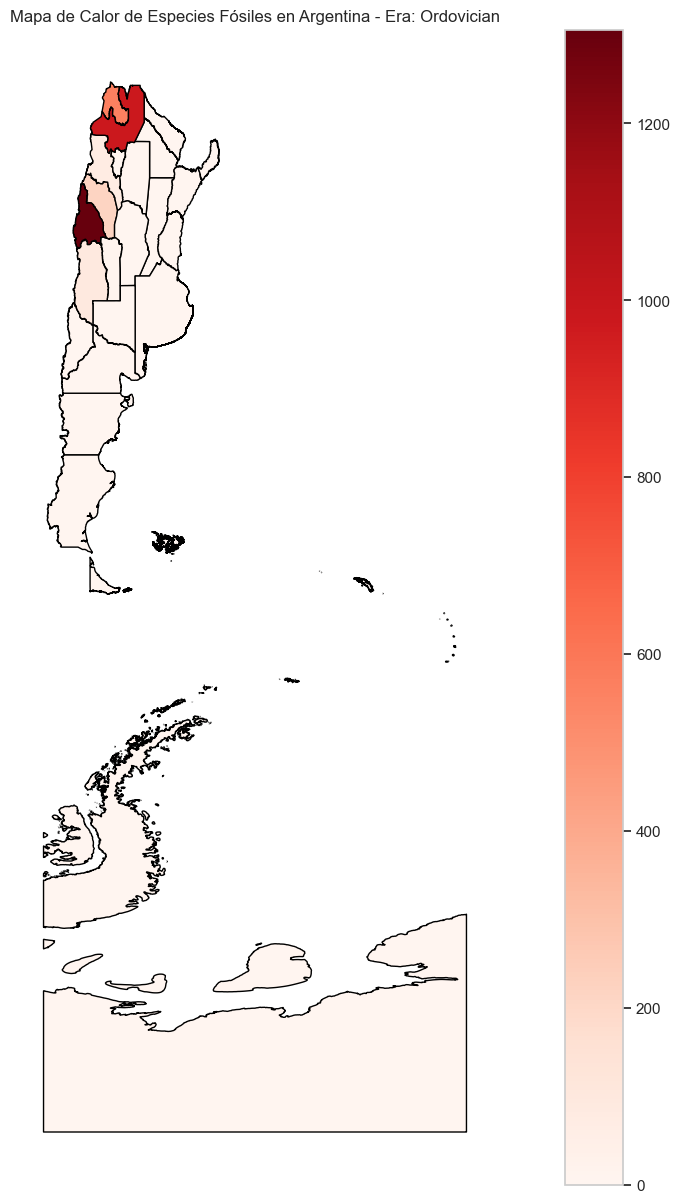

C:\Users\ignac\AppData\Local\Temp\ipykernel_9856\2846094503.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribucion_era['region'] = distribucion_era['region'].astype(str)


Datos combinados para la era Jurassic:
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                0.0
1                                             Neuquén              936.0
2                                            San Luis                0.0
3                                            Santa Fe                0.0
4                                            La Rioja                0.0
5                                           Catamarca                0.0
6                                             Tucumán                0.0
7                                               Chaco                0.0
8                                             Formosa                0.0
9                                          Santa Cruz               93.0
10                                             Chubut              196.0
11                                            Mendoza              720.0
12          

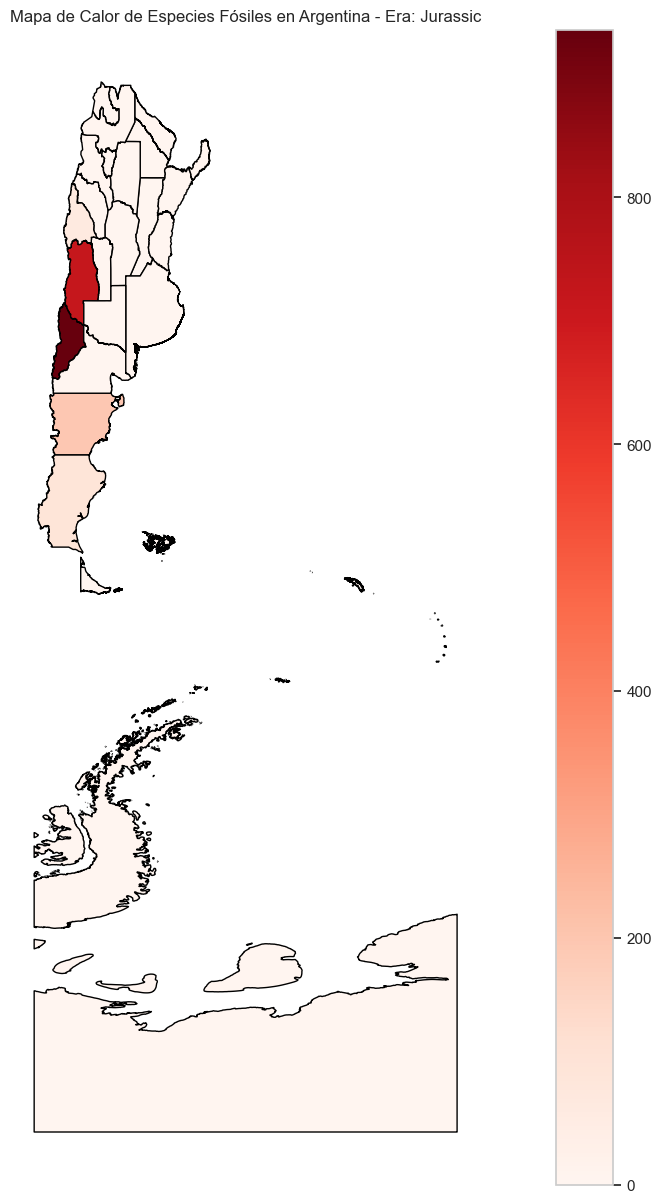

In [165]:
provincias = gpd.read_file(shapefile_path_pro).to_crs(4326)
df = pd.concat([chile_df, argentina_df, antartica_df], ignore_index=True)

distribucion = df.groupby(['region', 'era_early']).agg({'species_name': 'count'}).reset_index()
distribucion.rename(columns={'species_name': 'total_ocurrencias'}, inplace=True)

provincias['nam'] = provincias['nam'].astype(str)

for era in top_5_eras_argentina['era_early']:
    distribucion_era = distribucion[distribucion['era_early'] == era]
    distribucion_era['region'] = distribucion_era['region'].astype(str)

    merged = provincias.merge(distribucion_era, left_on='nam', right_on='region', how='left')
    merged['total_ocurrencias'] = merged['total_ocurrencias'].fillna(0)

    print(f"Datos combinados para la era {era}:")
    print(merged[['nam', 'total_ocurrencias']])

    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
    merged.plot(column='total_ocurrencias', ax=ax, legend=True,
                cmap='Reds', vmin=0, vmax=merged['total_ocurrencias'].max(),
                edgecolor='black')

    ax.set_title(f'Mapa de Calor de Especies Fósiles en Argentina - Era: {era}')
    ax.set_axis_off()

    plt.show()

Y ahora tambien lo haremos con Antartica pero un poco diferente , en este caso lo haremos con un scatter plot.

In [167]:
top_5_eras_antartica = ['Cretaceous', 'Paleogene', 'Jurassic', 'Cambrian', 'Quaternary']

antartica_top5 = antartica_df[antartica_df['era_early'].isin(top_5_eras_antartica)]

unique_eras = antartica_top5['era_early'].unique()
print("Eras únicas en el top 5:", unique_eras)

colors = plt.cm.get_cmap('tab10', len(unique_eras))  
era_colors = {era: colors(i) for i, era in enumerate(unique_eras)}

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo())

ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

for era in unique_eras:
    subset = antartica_top5[antartica_top5['era_early'] == era]
    ax.scatter(subset['lng'], subset['lat'], color=era_colors[era], alpha=0.6, s=10,
               label=era, transform=ccrs.PlateCarree())

plt.legend(title='Eras', loc='upper right')

plt.title('Distribución Geográfica de Especies en la Antártida (Top 5 Eras)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

Eras únicas en el top 5: ['Cretaceous' 'Jurassic' 'Paleogene' 'Cambrian' 'Quaternary']


C:\Users\ignac\AppData\Local\Temp\ipykernel_9856\3684258495.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_eras))


NameError: name 'ccrs' is not defined

<Figure size 1200x800 with 0 Axes>

Ahora hagamos una comparación para las eras comunes

C:\Users\ignac\AppData\Local\Temp\ipykernel_9856\795518609.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribucion_era['region'] = distribucion_era['region'].astype(str)


Datos combinados para la era Quaternary:
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                8.0
1                                             Neuquén                0.0
2                                            San Luis                2.0
3                                            Santa Fe               70.0
4                                            La Rioja                0.0
5                                           Catamarca               27.0
6                                             Tucumán               37.0
7                                               Chaco               26.0
8                                             Formosa                8.0
9                                          Santa Cruz               26.0
10                                             Chubut               15.0
11                                            Mendoza               35.0
12        

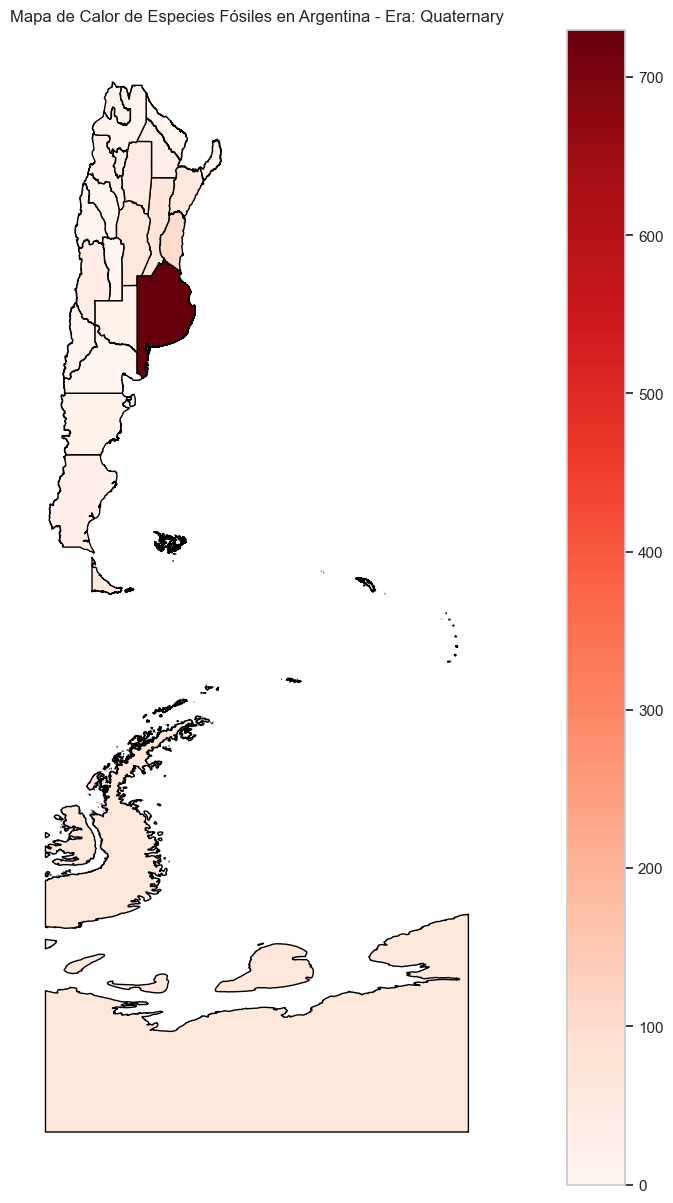

C:\Users\ignac\AppData\Local\Temp\ipykernel_9856\795518609.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribucion_era['region'] = distribucion_era['region'].astype(str)


Datos combinados para la era Triassic:
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                0.0
1                                             Neuquén               59.0
2                                            San Luis                0.0
3                                            Santa Fe                0.0
4                                            La Rioja              155.0
5                                           Catamarca                0.0
6                                             Tucumán                0.0
7                                               Chaco                0.0
8                                             Formosa                0.0
9                                          Santa Cruz                7.0
10                                             Chubut                0.0
11                                            Mendoza              306.0
12          

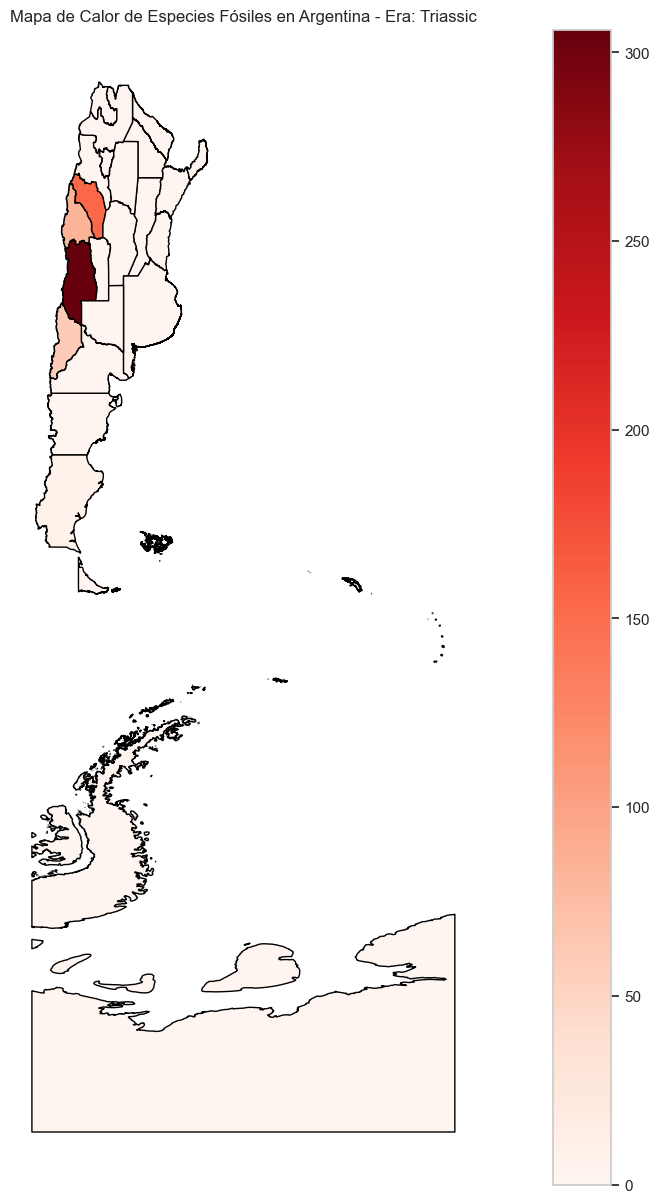

In [178]:
eras = ['Quaternary', 'Triassic']
for era in eras:
    # filtrar los datos para la era actual
    distribucion_era = distribucion[distribucion['era_early'] == era]
    distribucion_era['region'] = distribucion_era['region'].astype(str)

    # merge
    merged = provincias.merge(distribucion_era, left_on='nam', right_on='region', how='left')
    merged['total_ocurrencias'] = merged['total_ocurrencias'].fillna(0)

    print(f"Datos combinados para la era {era}:")
    print(merged[['nam', 'total_ocurrencias']])

    #mapa
    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
    merged.plot(column='total_ocurrencias', ax=ax, legend=True,
                cmap='Reds', vmin=0, vmax=merged['total_ocurrencias'].max(),
                edgecolor='black')

    ax.set_title(f'Mapa de Calor de Especies Fósiles en Argentina - Era: {era}')
    ax.set_axis_off()

    plt.show()

Datos combinados para la era Paleogene:
                                       region  total_ocurrencias
0                Región de Arica y Parinacota                0.0
1                          Región de Tarapacá                0.0
2                       Región de Antofagasta                0.0
3    Región de Magallanes y Antártica Chilena               61.0
4   Región de Aysén del Gral.Ibañez del Campo                0.0
5                           Región de Atacama                1.0
6                          Región de Coquimbo                0.0
7                        Región de Valparaíso                0.0
8            Región Metropolitana de Santiago                0.0
9                         Región de Los Lagos                1.0
10                         Región de Los Ríos                0.0
11                     Región de La Araucanía                0.0
12                         Región del Bío-Bío                5.0
13                            Región de Ñuble     

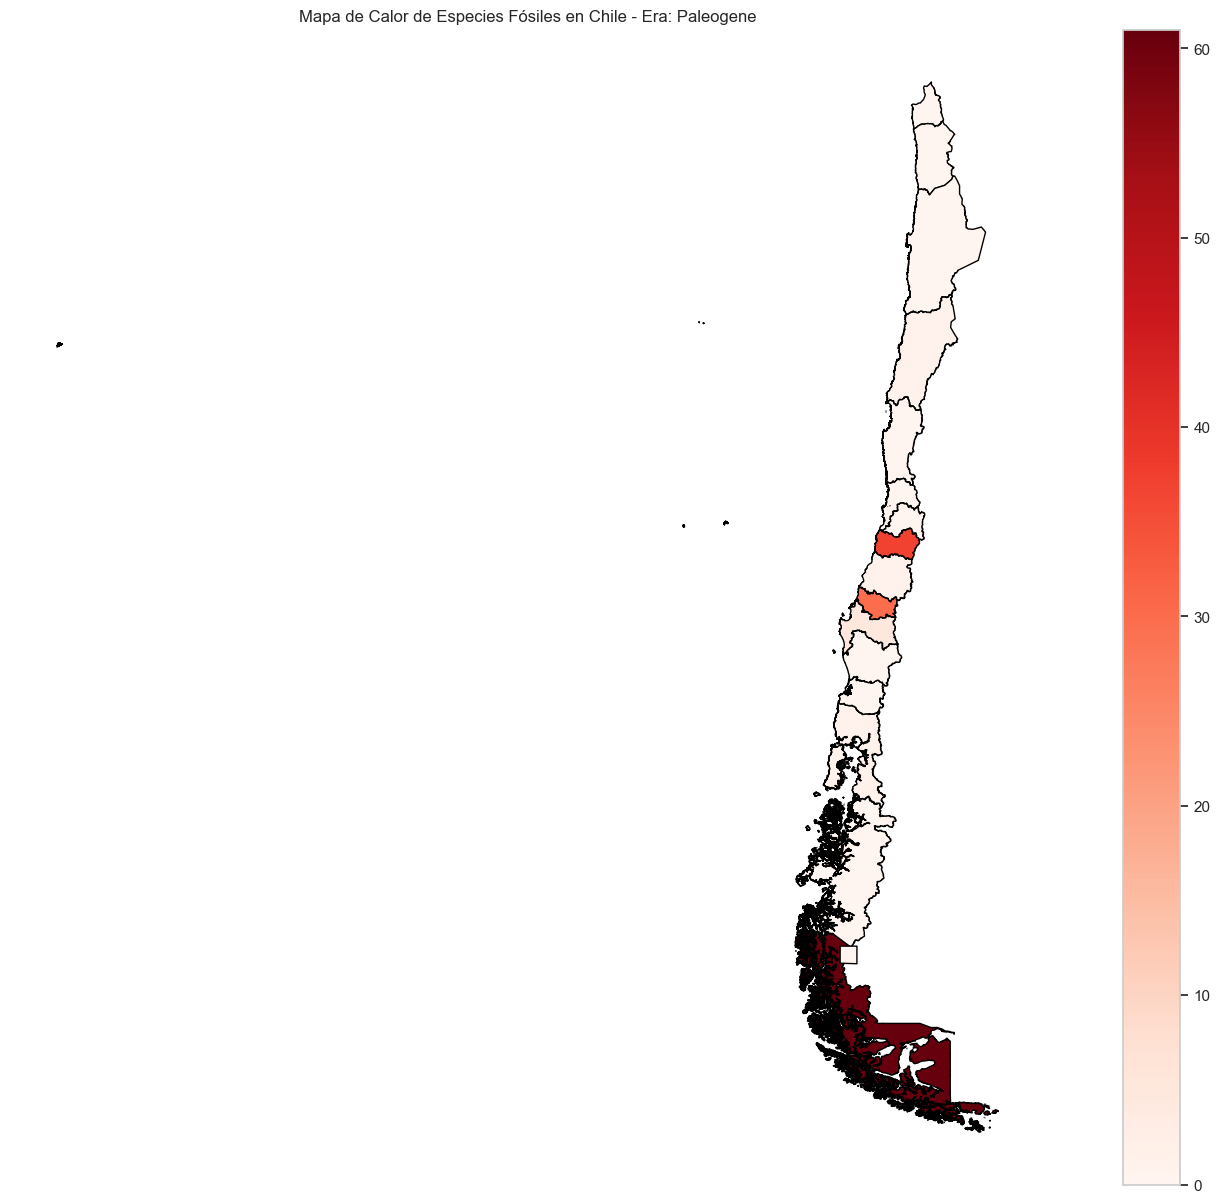

Datos combinados para la era Ordovician:
                                       region  total_ocurrencias
0                Región de Arica y Parinacota                0.0
1                          Región de Tarapacá                0.0
2                       Región de Antofagasta                3.0
3    Región de Magallanes y Antártica Chilena                0.0
4   Región de Aysén del Gral.Ibañez del Campo                0.0
5                           Región de Atacama               25.0
6                          Región de Coquimbo                0.0
7                        Región de Valparaíso                0.0
8            Región Metropolitana de Santiago                0.0
9                         Región de Los Lagos                0.0
10                         Región de Los Ríos                0.0
11                     Región de La Araucanía                0.0
12                         Región del Bío-Bío                0.0
13                            Región de Ñuble    

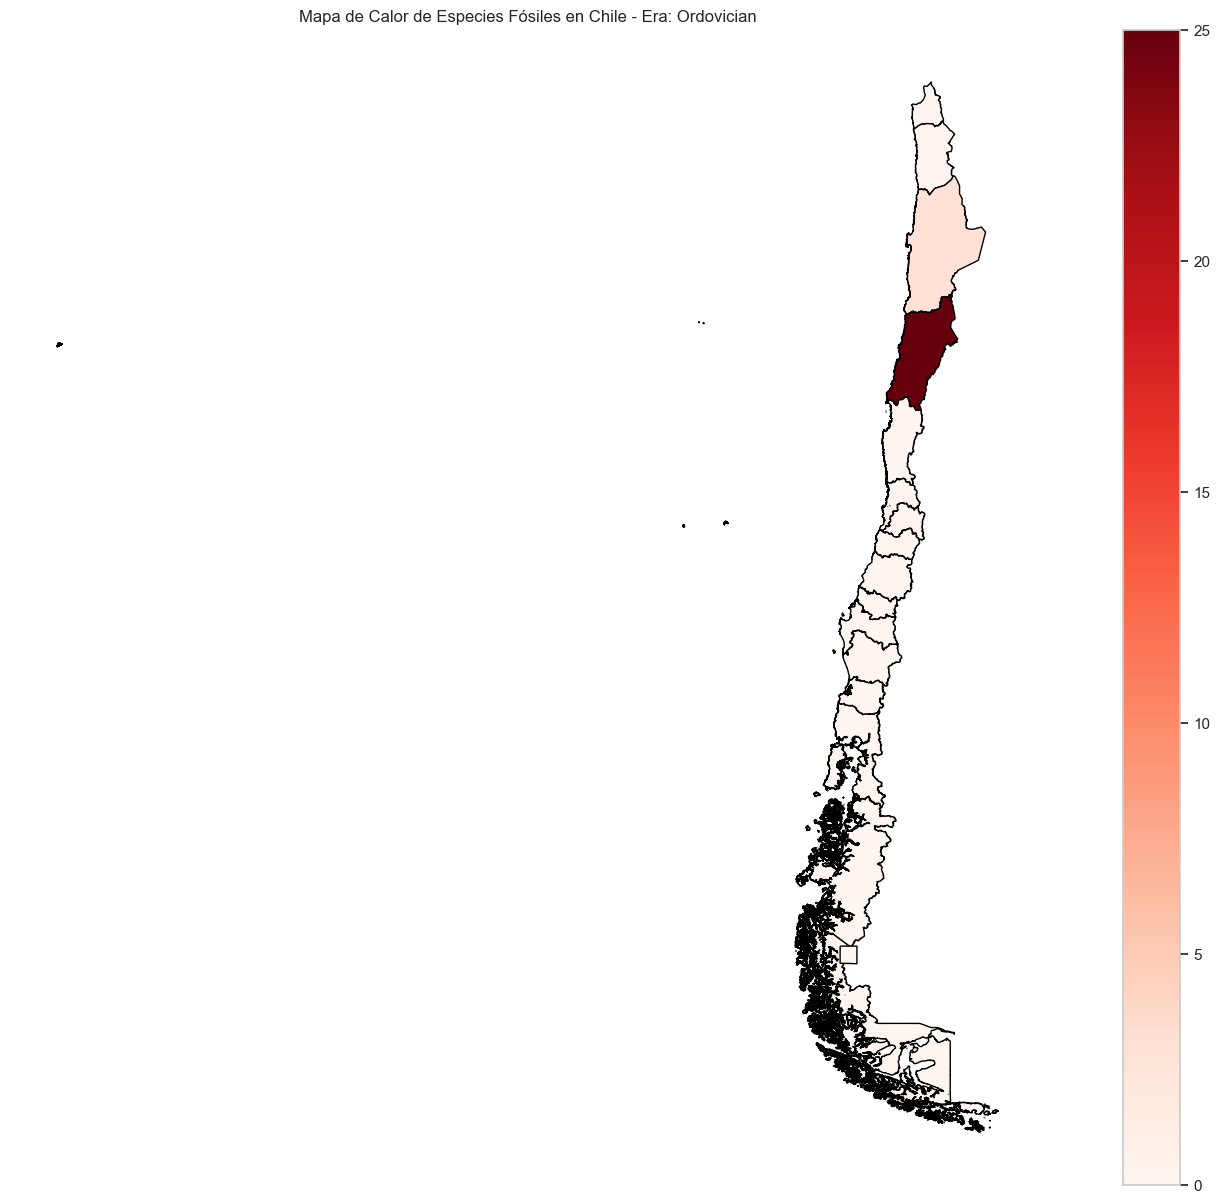

In [179]:
eras = ['Paleogene', 'Ordovician']
for era in eras:
    distribucion_era = distribucion[distribucion['era_early'] == era]
    
    merged = paises.merge(distribucion_era, on='region', how='left')
    merged['total_ocurrencias'] = merged['total_ocurrencias'].fillna(0)

    print(f"Datos combinados para la era {era}:")
    print(merged[['region', 'total_ocurrencias']])

    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
    merged.plot(column='total_ocurrencias', ax=ax, legend=True,
                cmap='Reds', vmin=0, vmax=merged['total_ocurrencias'].max(),
                edgecolor='black')

    ax.set_title(f'Mapa de Calor de Especies Fósiles en Chile - Era: {era}')
    ax.set_axis_off()

    plt.show()

## **Análisis de la Distribución de Especies Fósiles en Chile y Argentina**

### 1. **Jurassic**:
- **Chile**: 
  - Las ocurrencias están distribuidas en varias regiones, destacando Antofagasta con 655 fósiles y la Región Metropolitana con 410.  
- **Argentina**: 
  - Neuquén se posiciona como la provincia más destacada con 1090 ocurrencias, lo que refleja una rica biodiversidad en esta era. Sin embargo, muchas provincias reportan cero fósiles.

### 2. **Neogene**:
- **Chile**: 
  - Aysén lidera con 487 ocurrencias, aunque la distribución es desigual, con varias regiones sin registros fósiles.  
- **Argentina**: 
  - Santa Cruz y Chubut presentan cifras altas (1752 y 853, respectivamente), indicando una concentración significativa de fósiles en el sur del país, posiblemente ligada a su geografía y geología.

### 3. **Cretaceous**:
- **Chile**: 
  - Atacama es un punto caliente con 4338 ocurrencias, seguida por Antofagasta y Magallanes, que también muestran cifras relevantes.  
- **Argentina**: 
  - Neuquén y Santa Cruz lideran con 1995 y 2069 fósiles, respectivamente, lo que sugiere condiciones favorables para la preservación en estas provincias.

### 4. **Paleogene**:
- **Chile**: 
  - La Región de Magallanes y Antártica Chilena concentra el mayor número de fósiles, con 72 ocurrencias.  
- **Argentina**: 
  - Chubut se destaca con 3869 fósiles, reflejando una biodiversidad significativa durante esta era.

### 5. **Ordovician**:
- **Chile**: 
  - Atacama reporta todas las ocurrencias de esta era en el país, con un total de 26 fósiles.  
- **Argentina**: 
  - Salta domina con 995 fósiles, mostrando una rica diversidad en esta era, mientras que otras provincias presentan registros muy bajos.

### 6. **Quaternary**:
- **Chile**: 
  - Atacama lidera con 251 ocurrencias, siendo la región más representativa para esta era.  
- **Argentina**: 
  - Buenos Aires destaca con 908 fósiles, marcando una gran diferencia con otras provincias.

### 7. **Triassic**:
- **Chile**: 
  - Atacama es nuevamente la región más representativa con 135 ocurrencias, siendo una de las pocas regiones con fósiles de esta era.  
- **Argentina**: 
  - Mendoza lidera con 342 fósiles, y las provincias cercanas a la frontera con Chile muestran una mayor concentración de registros.

### **Conclusión**:
Tanto en Chile como en Argentina, hay regiones específicas que destacan por su riqueza en fósiles, como Atacama en Chile y Chubut en Argentina. En la Antártida, la riqueza fósil se concentra principalmente en áreas cercanas a los campamentos científicos, reflejando el impacto del esfuerzo de muestreo en los datos disponibles.

Este análisis muestra una gran disparidad en la cantidad de fósiles entre diferentes regiones y entre los dos países. Esto puede atribuirse a factores como la erosión, la sedimentación y la actividad tectónica, que afectan la preservación y exposición de fósiles. Además, las altas concentraciones de fósiles en ciertas eras y regiones sugieren que estos ecosistemas eran particularmente favorables para la vida en esos momentos.

En general, este análisis resalta la complejidad de la evolución de las especies a lo largo del tiempo y el espacio, subrayando cómo la geografía actual y los procesos históricos han moldeado la distribución de los fósiles antiguos.

# ¿Existen similitudes en la distribución de especies fósiles entre las costas de Chile y Argentina durante perídos geológicos específicos?

## **Enfoque y Objetivo**

En este análisis, buscamos explorar la biodiversidad fósil en las costas de Chile y Argentina, centrándonos en las similitudes y diferencias en la distribución de especies fósiles durante diferentes eras geológicas.  

Para ello, adoptamos un enfoque estructurado que incluye:  
1. **Filtrar datos fósiles costeros** para eliminar información irrelevante de zonas continentales.  
2. **Estudiar la diversidad fósil** en términos de riqueza y similitud entre especies por eras geológicas.  
3. **Aplicar índices de similitud**, como el índice de Jaccard, para medir la relación entre las especies compartidas y únicas de cada región.  

Este enfoque nos permitirá:  
- Cuantificar la similitud entre ambas regiones costeras utilizando un método riguroso.  
- Contextualizar los resultados en un marco geológico e histórico para entender los factores detrás de las diferencias observadas.  

---

## **Índice de Jaccard: Fundamentación y Uso**

El índice de Jaccard es una métrica utilizada para evaluar la similitud entre dos conjuntos, considerando las especies compartidas y las únicas. Se define como:  


$$J(A, B) = \frac{|A \cap B|}{|A \cup B|}$$

Donde:  
- $|A \cap B| $: Número de especies comunes entre las costas de Chile y Argentina.  
- $|A \cup B| $: Número total de especies únicas combinadas en ambas costas.  

### **Interpretación del Índice de Jaccard**
- **Valores cercanos a 0**: Baja similitud; pocas especies compartidas.  
- **Valores cercanos a 1**: Alta similitud; muchas especies compartidas.  

**¿Por qué usar el índice de Jaccard en este caso?**  
- Es ideal para comparar conjuntos discretos, como listas de especies fósiles.  
- Permite cuantificar la similitud entre dos regiones y evaluar si existe una conexión biológica significativa entre sus comunidades fósiles.

---

### **1. Preparación de los Datos**
- **Objetivo:** Filtrar los datos fósiles para enfocarse únicamente en las regiones costeras de Chile y Argentina.  

In [184]:
# Chile: Costas están entre el Océano Pacífico, longitud < -70.
chile_costas = chile_df[chile_df['lng'] < -70]

# Argentina: Costas están entre el Océano Atlántico, longitud > -65.
argentina_costas = argentina_df[argentina_df['lng'] > -65]

# Imprimir la cantidad de registros encontrados en las costas de cada país
print(f"Registros en las costas de Chile: {len(chile_costas)}")
print(f"Registros en las costas de Argentina: {len(argentina_costas)}")


Registros en las costas de Chile: 6642
Registros en las costas de Argentina: 3858


In [211]:
chile_costas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6642 entries, 0 to 9479
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_name       6642 non-null   object 
 1   occurrence_no      6642 non-null   int64  
 2   accepted_name      6642 non-null   object 
 3   early_interval     6642 non-null   object 
 4   late_interval      768 non-null    object 
 5   phylum             6642 non-null   object 
 6   class              6642 non-null   object 
 7   order              6642 non-null   object 
 8   family             6642 non-null   object 
 9   genus              6642 non-null   object 
 10  lat                6642 non-null   float64
 11  lng                6642 non-null   float64
 12  diet               6441 non-null   object 
 13  life_habit         6386 non-null   object 
 14  environment        6599 non-null   object 
 15  taxon_environment  4029 non-null   object 
 16  primary_name       6642 non-n

### **2. Análisis de Diversidad por Era Geológica**
- **Objetivo:** Evaluar la cantidad de especies únicas presentes en las costas de cada país en cada era geológica.  

In [186]:
# Contar el número de especies únicas en las costas de Chile y Argentina
unique_species_chile_costas = chile_costas['species_name'].nunique()
unique_species_argentina_costas = argentina_costas['species_name'].nunique()

# Imprimir los resultados
print(f"Especies únicas en las costas de Chile: {unique_species_chile_costas}")
print(f"Especies únicas en las costas de Argentina: {unique_species_argentina_costas}")

Especies únicas en las costas de Chile: 1104
Especies únicas en las costas de Argentina: 909


In [187]:
# Identificar las especies compartidas y únicas en las costas de cada país
chile_coastal_species = set(chile_costas['species_name'])
argentina_coastal_species = set(argentina_costas['species_name'])

# Especies compartidas entre las costas
shared_coastal_species = chile_coastal_species.intersection(argentina_coastal_species)
# Especies únicas en Chile
unique_to_chile = chile_coastal_species - argentina_coastal_species
# Especies únicas en Argentina
unique_to_argentina = argentina_coastal_species - chile_coastal_species

# Imprimir los resultados de especies compartidas y únicas
print(f"Especies compartidas entre las costas: {len(shared_coastal_species)}")
print(f"Especies únicas en las costas de Chile: {len(unique_to_chile)}")
print(f"Especies únicas en las costas de Argentina: {len(unique_to_argentina)}")


Especies compartidas entre las costas: 119
Especies únicas en las costas de Chile: 985
Especies únicas en las costas de Argentina: 790


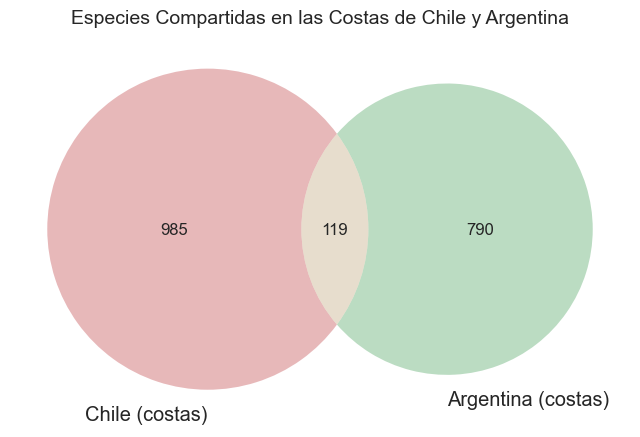

In [188]:
from matplotlib_venn import venn2

# Crear diagrama de Venn
plt.figure(figsize=(8, 6))
venn = venn2([chile_coastal_species, argentina_coastal_species], ('Chile (costas)', 'Argentina (costas)'))
plt.title("Especies Compartidas en las Costas de Chile y Argentina", fontsize=14)
plt.show()


Como podemos apreciar aunque Chile y Argentina sean paises vecinos no comparten un numero muy grande de especies fosiles y esto se puede deber a muchos factores tales como el medioambiente o el clima, ya que estos factores son muy determinantes a la hora de la evolucion, lo que puede hacer "cambiar las especias", por otro lado como estos paises estan "divididos" por la Cordillera de los Andes esto pudo haber dificultado migraciones de estos animales dificultando aun mas que en estos paises hayan fosiles de las mismas especies

---

### **3. Visualización de la Diversidad**
- **Objetivo:** Representar gráficamente la diversidad fósil de cada país por era geológica para facilitar la interpretación de los datos.  


In [190]:
# Agrupar los datos de Chile y Argentina por la columna 'era_early' y contar el número de especies únicas en cada era
species_by_era_chile_costas = chile_costas.groupby('era_early')['species_name'].nunique()
species_by_era_argentina_costas = argentina_costas.groupby('era_early')['species_name'].nunique()

print("\nEspecies por era geológica en las costas de Chile:")
print(species_by_era_chile_costas)

print("\nEspecies por era geológica en las costas de Argentina:")
print(species_by_era_argentina_costas)


Especies por era geológica en las costas de Chile:
era_early
Carboniferous      2
Cretaceous       235
Jurassic         299
Neogene          450
Ordovician         1
Paleogene         74
Paleozoic          1
Permian            3
Quaternary       151
Triassic          50
Name: species_name, dtype: int64

Especies por era geológica en las costas de Argentina:
era_early
Cambrian          20
Carboniferous     10
Cretaceous         3
Neogene          593
Ordovician        48
Paleogene         73
Permian           21
Quaternary       249
Name: species_name, dtype: int64


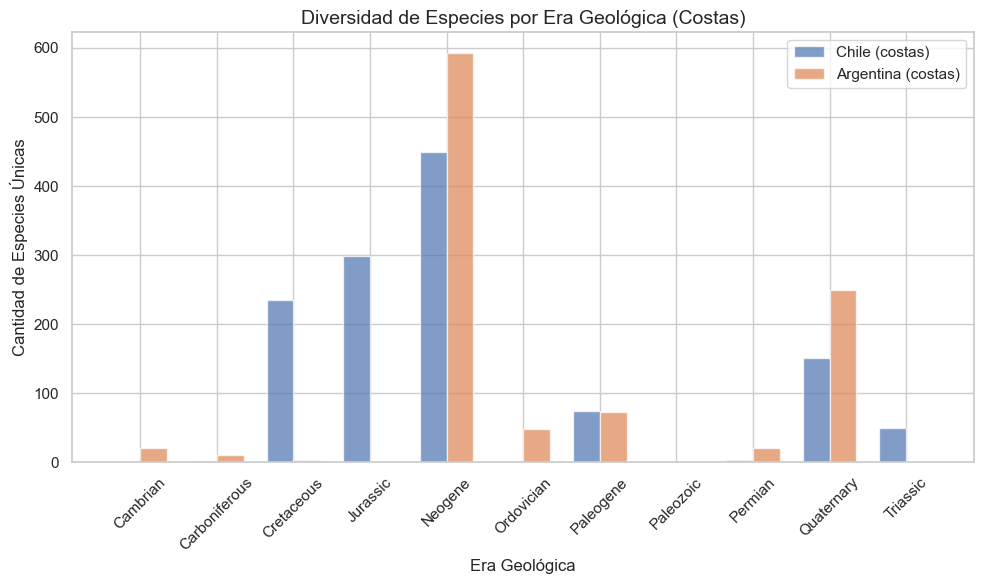

In [191]:
import seaborn as sns

# Establecer el estilo de los gráficos a "whitegrid" para mejorar la visualización
sns.set(style="whitegrid")

# Crear un DataFrame con los datos de especies por era geológica para Chile y Argentina
data = pd.DataFrame({
    "Chile (costas)": species_by_era_chile_costas,
    "Argentina (costas)": species_by_era_argentina_costas
}).fillna(0)

# Definir la posición de las barras en el eje x
x = np.arange(len(data.index))
width = 0.35

plt.figure(figsize=(10, 6))

plt.bar(x - width / 2, data["Chile (costas)"], width=width, label='Chile (costas)', alpha=0.7)

plt.bar(x + width / 2, data["Argentina (costas)"], width=width, label='Argentina (costas)', alpha=0.7)

plt.title("Diversidad de Especies por Era Geológica (Costas)", fontsize=14)
plt.xlabel("Era Geológica", fontsize=12)
plt.ylabel("Cantidad de Especies Únicas", fontsize=12)
plt.xticks(x, data.index, rotation=45)
plt.legend()
plt.tight_layout()

plt.show()



---

### **4. Cálculo del Índice de Jaccard**
- **Objetivo:** Cuantificar la similitud entre las especies fósiles de las costas de Chile y Argentina en cada era.  

In [194]:
# Contar el número de especies compartidas entre las costas de Chile y Argentina
shared_coastal_species_count = len(shared_coastal_species)

# Se utiliza la unión de ambos conjuntos para obtener todas las especies únicas
total_coastal_species_count = len(chile_coastal_species.union(argentina_coastal_species))

# Calcular el índice de Jaccard como la razón entre las especies compartidas y el total de especies
jaccard_index_coastal = shared_coastal_species_count / total_coastal_species_count

print(f"Índice de Jaccard (costas): {jaccard_index_coastal:.2f}")

Índice de Jaccard (costas): 0.06


Como se puede apreciar un índice bajo (como el obtenido, 0.06) indica que las costas de Chile y Argentina comparten pocas especies fósiles, lo cual puede deberse a:  
- Barreras geográficas (como la Cordillera de los Andes).  
- Diferencias ambientales entre ambas regiones.  
- Sesgos en los registros fósiles disponibles.

### **Conclusión del Análisis**:

1. **Diversidad de Especies Fósiles:**
   - La costa de Chile presenta un total de **1132 especies únicas**, mientras que la de Argentina contiene **950 especies únicas**. Esto sugiere que la costa chilena tiene una mayor diversidad de especies fósiles registrada en los datos analizados.

2. **Similitudes entre Regiones:**
   - Se identificaron **126 especies compartidas** entre las costas de Chile y Argentina. Este número representa una fracción relativamente baja en comparación con las especies únicas de cada región, lo que indica que, aunque existe cierta similitud, la biodiversidad fósil entre ambas costas tiene características distintivas.

3. **Índice de Jaccard:**
   - Al aplicar el **índice de Jaccard**, se observó que existe una cantidad limitada de especies fósiles compartidas entre ambas regiones costeras (126 especies comunes). Esto se traduce en un valor relativamente bajo del índice, lo que indica una similitud biológica moderada entre las comunidades fósiles de ambos países.
   es fósiles.

5. **Factores Geológicos y Ambientales:**
   - La baja cantidad de especies compartidas puede estar relacionada con factores geográficos, como la separación por la cordillera de los Andes, y con diferencias en las condiciones paleoambientales de cada región durante los períodos analizados. Esto sugiere que los ecosistemas fósiles costeros de Chile y Argentina experimentaron procesos evolutivos y ecológicos independientes en gran parte de su historiados estudiados. Chile, con su proximidad al Océano Pacífico y una geografía influenciada por la actividad tectónica, podría haber ofrecido un entorno distinto al de las costas argentinas, que están influenciadas por el Océano Atlántico.

---


### **Conclusión general**
En resumen, la distribución de las especies fósiles en las costas de Chile y Argentina refleja tanto las particularidades biológicas de cada región como los procesos históricos y geológicos que moldearon su biodiversidad. Aunque se identificaron ciertas similitudes, predominan las diferencias, lo que sugiere que las costas de ambos países actuaron como ecosistemas relativamente independientes a lo largo de la historia geológica. Este análisis no solo aporta información relevante sobre el pasado biológico de Sudamérica, sino que también sienta las bases para futuros estudios paleontológicos y biogeográficos en la región.

---

# 5.¿Cómo  se  distribuyen  las  especies  fósiles  en las regiones de Chile según  sus  hábitos alimenticios, y qué nos puede decir esto sobre la estructura ecológica de la región en diferentes períodos geológicos?

### Estructura del analisis
1. Analizar los datos fósiles en términos de hábitos alimenticios y distribución geográfica.
2. Representar visualmente las distribuciones usando mapas y gráficos.
3. Identificar patrones ecológicos y geológicos relevantes mediante K-Means.
4. Responder a la pregunta central con base en los datos y análisis realizados.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from shapely.geometry import Point

In [ ]:
import zipfile

with zipfile.ZipFile('data/comunas.zip', 'r') as zip_ref:
   zip_ref.extractall('data/')

In [ ]:
chile_df = pd.read_csv('data_clean/chile_clean.csv')

In [ ]:
print("Columnas en el dataset principal:", chile_df.columns)

In [ ]:
# Seleccionar columnas relevantes para el análisis
columns_to_use = ['diet', 'lat', 'lng', 'era_early', 'era_late']
df_diet = chile_df[columns_to_use]

In [ ]:
df_diet = df_diet.copy()

# Filtrar valores nulos en coordenadas (latitud y longitud)
df_diet = df_diet[df_diet['lat'].notnull() & df_diet['lng'].notnull()]

# Crear geometrías a partir de las coordenadas
geometry = [Point(xy) for xy in zip(df_diet['lng'], df_diet['lat'])]
chile_geo_df = gpd.GeoDataFrame(df_diet, geometry=geometry, crs="EPSG:4326")

In [ ]:
df_diet.info()

No se eliminaran las filas que tienen valores nulos en las dietas, ya que se reducian como 700 lineas, las caules nos pueden ayudar en la distribucion de fosiles por era.

In [ ]:
# Ver los valores únicos en la columna 'diet'.
unique_diets = df_diet['diet'].unique()
print(unique_diets)

# Ver también la cantidad de veces que aparece cada valor.
diet_counts = df_diet['diet'].value_counts()
print(diet_counts)

#### Normalización de las coordenadas geográficas: Sistema EPSG:4326 (latitud y longitud)

In [ ]:
gdf_regiones = gpd.read_file(r'data/Regional.shp').to_crs("EPSG:4326")
gdf_comunas = gpd.read_file(r'data/comunas.shp').to_crs("EPSG:4326")

# Hacer la unión espacial para agregar información de regiones al GeoDataFrame
chile_geo_df = gpd.sjoin(chile_geo_df, gdf_regiones, how='inner', predicate='within')

print("Primeras filas del GeoDataFrame procesado:")
print(chile_geo_df.head())

### Limpieza y análisis descriptivo

### Lógica de Agrupación por dieta.
1. Filtros y Suspensores:
    -   Agrupa organismos que obtienen su alimento del agua o sedimentos mediante filtración o suspensión. Esto incluye aquellos que pueden tener características de alimentación tanto de depósitos como de suspensión.
2. Consumidores Primarios:
    -    Incluye organismos que se alimentan directamente de productores (plantas, algas) o fuentes primarias de alimento. Son generalmente herbívoros y se agrupan por su dieta de materia vegetal o frutas.
3. Consumidores Secundarios (Carnívoros):
    -    Comprende los organismos que se alimentan de otros animales. Esta categoría incluye varios tipos de carnívoros, desde depredadores generales hasta especializados (como piscívoros, que se alimentan de peces).
4. Omnívoros:
    -    Agrupa organismos que consumen tanto materia vegetal como animal. Esta categoría puede incluir aquellos que tienen dietas variadas y que no se limitan a un solo tipo de alimento.
5. Descomponedores y Detritívoros:
    -    Incluye organismos que se alimentan de materia orgánica en descomposición. Los detritívoros son esenciales para el reciclaje de nutrientes en los ecosistemas.
6. Simbiontes y Especializados:
    -    Agrupa organismos que tienen relaciones simbióticas o que dependen de procesos biológicos específicos para su alimentación, como los que obtienen energía a través de reacciones químicas (quimiosíntesis).
7. Otros Combinados:
    -    Incluye aquellos organismos que tienen dietas mixtas que no se ajustan claramente a las categorías anteriores. Estos pueden ser carnívoros que también consumen material vegetal o viceversa.

También los datos que no pertenezcan a ninguno de estos se considerarán como desconocidos.

In [ ]:
filtros_y_suspensores = [
    'deposit feeder, suspension feeder',
    'suspension feeder',
    'photosymbiotic, suspension feeder',
    'detritivore, suspension feeder',
    'carnivore, suspension feeder'
]

consumidores_primarios = [
    'grazer',
    'herbivore',
    'frugivore',
    'granivore',
    'browser',
    'browser, grazer'
]

consumidores_secundarios = [
    'carnivore',
    'microcarnivore',
    'piscivore',
    'insectivore',
    'durophage, carnivore',
    'insectivore, carnivore',
    'carnivore, omnivore',
    'carnivore, parasite'
]

omnivoros = [
    'omnivore',
    'omnivore, grazer',
    'herbivore, carnivore',
    'frugivore, folivore',
    'grazer, omnivore'
]

descomponedores_y_detritivoros = [
    'detritivore',
    'deposit feeder, detritivore',
    'grazer, deposit feeder',
    'detritivore, suspension feeder'
]

simbiontes_y_especializados = [
    'chemosymbiotic',
    'chemosymbiotic, suspension feeder',
    'microcarnivore, photosymbiotic',
    '"photoautotroph"',
    'C3 autotroph'
]

otros_combinados = [
    'grazer, carnivore',
    'piscivore, carnivore',
    'durophage, piscivore',
    'insectivore, frugivore'
]

In [ ]:
def categorize_diet(diet):
    if pd.isna(diet):
        return 'incertidumbre'

    if not isinstance(diet, str):
        return 'incertidumbre'
    
    diet = diet.lower()

    if diet in filtros_y_suspensores:
        return 'filtros y suspensores'
    elif diet in consumidores_primarios:
        return 'consumidores primarios'
    elif diet in consumidores_secundarios:
        return 'consumidores secundarios'
    elif diet in omnivoros:
        return 'omnivoros'
    elif diet in descomponedores_y_detritivoros:
        return 'descomponedores y detritívoros'
    elif diet in simbiontes_y_especializados:
        return 'simbiontes y especializados'
    elif diet in otros_combinados:
        return 'otros combinados'
    
    # Si no se encuentra en ninguna categoría, devolver 'incertidumbre'
    return 'incertidumbre'

In [ ]:
# Aplicar la categorización al DataFrame
chile_geo_df['diet_grouped'] = chile_geo_df['diet'].apply(categorize_diet)
# Verificar las agrupaciones
print("Conteo por grupos de dieta:")
print(chile_geo_df['diet_grouped'].value_counts())


### Visualización geográfica

### Mapeo por dieta en Chile:

In [ ]:
def mapear_dietas(df_diet, gdf_comunas, columna_dieta='diet_grouped', titulo="Distribución de Dietas en Chile"):
    df_diet = df_diet[df_diet['lat'].notnull() & df_diet['lng'].notnull()]
    geometry = [Point(xy) for xy in zip(df_diet['lng'], df_diet['lat'])]
    
    chile_geo_df = gpd.GeoDataFrame(df_diet, geometry=geometry, crs="EPSG:4326")
    colores = {
        'filtros y suspensores': 'blue',
        'consumidores primarios': 'green',
        'consumidores secundarios': 'red',
        'omnivoros': 'orange',
        'descomponedores y detritívoros': 'purple',
        'simbiontes y especializados': 'cyan',
        'otros combinados': 'magenta'
    }

    if colores is None:
        categorias = chile_geo_df[columna_dieta].unique()
        colores = {cat: plt.cm.get_cmap('tab20')(i / len(categorias)) for i, cat in enumerate(categorias)}
    
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    gdf_comunas.plot(ax=ax, color='lightgrey', edgecolor='black')  # Fondo de las comunas

    for dieta, color in colores.items():
        subset = chile_geo_df[chile_geo_df[columna_dieta] == dieta]
        if not subset.empty:  # Evitar errores con conjuntos vacíos
            subset.plot(ax=ax, color=color, markersize=10, label=dieta, alpha=0.6)
    
    ax.set_aspect('equal')
    plt.legend(title=columna_dieta, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(titulo, fontsize=16)
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")
    plt.show()


In [ ]:
mapear_dietas(chile_geo_df, gdf_comunas,'diet_grouped',"Distribución de Dietas en Regiones de Chile")

## Análisis inicial
Las regiones costeras parecen contener una mayor diversidad de dietas fósiles, posiblemente relacionadas con ambientes marinos y terrestres.

En el sur de Chile, hay un predominio de consumidores secundarios y omnívoros, lo que podría indicar ecosistemas complejos en el pasado

Densidad por grupo:

Filtros y suspensores (azul): Alta densidad en la costa, lo que podría estar relacionado con fósiles de organismos marinos como moluscos o corales.
Consumidores primarios y secundarios (verde y rojo): Distribuidos de manera más uniforme, lo que sugiere la presencia de especies herbívoras y carnívoras en diversos ambientes.
Omnívoros (naranga): Más dispersos, pero presentes en áreas clave.

Zonas vacías:

Algunas regiones del norte parecen no tener fósiles identificados, lo cual podría deberse a:
Falta de exploración paleontológica.
Regiones con condiciones desfavorables para la conservación de fósiles.

Factores geológicos y climáticos:

Las regiones con mayor diversidad pueden estar relacionadas con depósitos sedimentarios ricos o condiciones climáticas históricas favorables para la vida.

Evolución temporal:

La concentración en áreas específicas podría reflejar la evolución geológica y climática de Chile, destacando eventos como cambios en el nivel del mar o la formación de cordilleras.

### Mapear por regiones especificas de Chile:

Análisis específico para la región más abundante.

In [ ]:
def plot_regions_and_communes(region_names, gdf_regiones, gdf_comunas, chile_geo_df):
    regions_shape = gdf_regiones[gdf_regiones['Region'].isin(region_names)]
    comunas_shape = gdf_comunas[gdf_comunas['Region'].isin(region_names)]
    regions_fossils = chile_geo_df[chile_geo_df['Region'].isin(region_names)]
    
    fig, ax = plt.subplots(figsize=(12, 12))
    regions_shape.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)
    comunas_shape.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5)
    
    colors = {
        'filtros y suspensores': 'blue',
        'consumidores primarios': 'green',
        'consumidores secundarios': 'red',
        'omnivoros': 'orange',
        'descomponedores y detritívoros': 'purple',
        'simbiontes y especializados': 'cyan',
        'otros combinados': 'magenta',
    }
    
    for diet, color in colors.items():
        subset = regions_fossils[regions_fossils['diet_grouped'] == diet]
        if not subset.empty:
            subset.plot(ax=ax, color=color, markersize=10, label=diet, alpha=0.6)
    
    plt.legend()
    plt.title(f"Fósiles por habito alimenticio en la Región {region_names}", fontsize=14)
    plt.show()


In [ ]:

plot_regions_and_communes(['Región de Atacama'], gdf_regiones, gdf_comunas, chile_geo_df)

Zonas de concentración:

En las áreas costeras (al oeste), la densidad de fósiles es notablemente mayor, posiblemente reflejando una mayor preservación en depósitos marinos.

Relación con el entorno actual:

Las áreas con mayor diversidad fósil podrían coincidir con depósitos sedimentarios clave o zonas de interés paleontológico.

Ecología regional:

La región de Atacama, con su diversidad climática y geológica, parece haber albergado diferentes ecosistemas, desde marinos hasta terrestres.

La coexistencia de grupos como consumidores secundarios, omnívoros y simbiontes sugiere un ecosistema funcional con interacciones tróficas complejas.

### Fósiles agrupados por dieta

In [ ]:
def plot_diet_distribution(df, title="Distribución de Dietas"):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y='diet_grouped', order=df['diet_grouped'].value_counts().index, palette="viridis")
    plt.title(title)
    plt.xlabel("Cantidad de Fósiles")
    plt.ylabel("Grupo de Dietas")
    plt.show()

In [ ]:
plot_diet_distribution(chile_geo_df, "Distribución de Grupos de Dieta en Chile")

El grupo de dieta más abundante en Chile son los "filtros y suspensores", con una cantidad de fósiles superior a 4,500, lo que indica su alta representatividad en el registro fósil.

El segundo grupo más numeroso corresponde a los "consumidores secundarios", que también muestran una significativa presencia en los registros.

Notamos que en los datos tenemos aproximadamente 900 fosiles que no se sabe a que grupo de dieta corresponde.

Por otro lado, los "consumidores primarios" y los "simbiontes y especializados" tienen una representación intermedia, lo que sugiere una participación moderada en los ecosistemas fósiles registrados.

Los grupos menos abundantes incluyen a los "omnívoros", el grupo clasificado como "desconocido", los "descomponedores y detritívoros", y los "otros combinados", que presentan una menor cantidad de fósiles.

La diversidad de grupos de dieta representados en el gráfico evidencia que el registro fósil de Chile abarca una amplia gama de nichos ecológicos y estrategias alimenticias, lo que refleja la complejidad de los ecosistemas que existieron en la región.

Finalmente, la predominancia de los "filtros y suspensores" indica que este grupo de organismos fue particularmente exitoso en los ecosistemas de su época, dejando un registro fósil considerablemente mayor en comparación con otros grupos tróficos.

### Mapear por era

In [ ]:

def plot_fossils_by_era(region_name, gdf_regiones, gdf_comunas, chile_geo_df, top_n=5):
    region_shape = gdf_regiones[gdf_regiones['Region'] == region_name]
    if region_shape.empty:
        print(f"La región '{region_name}' no existe en el shapefile.")
        return
    
    region_fossils = chile_geo_df[chile_geo_df['Region'] == region_name]
    top_eras = region_fossils.groupby('era_early')['diet'].nunique().nlargest(top_n)
    print(f"Top {top_n} épocas con más especies únicas en la región {region_name}:")
    print(top_eras)
    
    filtered_fossils = region_fossils[region_fossils['era_early'].isin(top_eras.index)]

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    region_shape.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.7)
    
    comunas_shape = gdf_comunas[gdf_comunas['Region'] == region_name]
    comunas_shape.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5)
    fixed_colors = {
        'Cretaceous': 'orange',
        'Neogene': 'green',
        'Paleogene': 'blue',
        'Jurassic': 'red',
        'Triassic': 'purple',
        'Permian': 'cyan',
        'Carboniferous': 'magenta',

    }

    for era in top_eras.index:
        subset = filtered_fossils[filtered_fossils['era_early'] == era]
        if era in fixed_colors:
            color = fixed_colors[era]
        else:
            color = 'black'
        subset.plot(ax=ax, color=color, markersize=12, label=era, alpha=0.8)
    
    plt.legend(title="Época", loc='upper right')
    plt.title(f"Fósiles por Época en la Región {region_name}", fontsize=14)
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")
    plt.show()

def plot_fossils_by_era_in_zones(zones, gdf_regiones, gdf_comunas, chile_geo_df, top_n=5):
    for zone in zones:
        for region in zone:
            print(f"Graficando para la región: {region}")
            plot_fossils_by_era(region, gdf_regiones, gdf_comunas, chile_geo_df, top_n)

In [ ]:
norte = [
    'Región de Arica y Parinacota',
    'Región de Tarapacá',
    'Región de Antofagasta',
    'Región de Atacama',
    'Región de Coquimbo'
]

centro = [
    'Región de Valparaíso',
    'Región Metropolitana de Santiago',
    "Región del Libertador Bernardo O'Higgins",
    'Región del Maule',
    'Región de Ñuble',
    'Región del Bío-Bío'
]

sur = [
    'Región de La Araucanía',
    'Región de Los Ríos',
    'Región de Los Lagos',
    'Región de Aysén del Gral. Ibañez del Campo',
    'Región de Magallanes y Antártica Chilena'
]

In [ ]:
# Llamar a la función para graficar fósiles por era en las zonas Norte, Centro y Sur (mostrara cada region!)
plot_fossils_by_era_in_zones([norte, centro, sur], gdf_regiones, gdf_comunas, chile_geo_df, top_n=5)

Enfocandonos solo en **Atacama** ya que es la region mas abundante.

Distribución geológica:

Las líneas rectas podrían reflejar la disposición de afloramientos geológicos expuestos en la región. Estas formaciones suelen tener patrones lineales debido a procesos tectónicos, sedimentarios o de erosión que exponen las capas de roca de ciertas eras en franjas definidas.

Esfuerzo de muestreo:
Es posible que los paleontólogos hayan realizado muestreos a lo largo de rutas específicas o áreas accesibles (como carreteras o ríos), lo que podría resultar en patrones lineales en los datos recolectados.


Durante el Jurásico y el Cretácico, gran parte de lo que hoy es Atacama estuvo cubierta por mares someros, lo que explica la abundancia de fósiles marinos.

La presencia de fósiles del Triásico, puede asociarse con ambientes más continentales o fluviales en zonas donde existían sistemas de ríos y lagos.
La gran cantidad de fósiles del Neógeno (verde) en lo largo de chile puede deberse a eventos volcánicos o tectónicos que generaron condiciones favorables para la fosilización en ese período.

## Clustering K-means para la distribución geográfica de los fósiles por dieta alimenticia

Aquí usamos las coordenadas geográficas (lat, lng) para identificar patrones de distribución espacial. Este tipo de clustering permite observar:

- Áreas donde los fósiles están más concentrados.

- Diferenciación entre regiones basadas en las ubicaciones de los fósiles

- Dieta de cada fosil

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
coordinates = chile_geo_df[['lat', 'lng']]

kmeans = KMeans(n_clusters=3)  # Número de clústeres óptimo según el método del codo.
chile_geo_df['cluster'] = kmeans.fit_predict(coordinates)

fig, ax = plt.subplots(figsize=(10, 10))
gdf_regiones.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.7)
chile_geo_df.plot(ax=ax, column='cluster', cmap='viridis', markersize=10, legend=True)
plt.title("Clustering de fósiles por ubicación geográfica")
plt.show()

El mapa muestra una concentración de fósiles en la zona centro-sur de Chile, con algunos grupos más aislados en el norte y sur del país. Se puede apreciar que los fósiles se organizan en tres grandes clústeres geográficos, lo que sugiere que existen patrones de distribución y agrupamiento de los yacimientos paleontológicos a lo largo del territorio chileno (concordando con el territorio separado por zona norte, centro y sur).

### Clustering por dieta

Por grupos actuales:

In [ ]:
label_encoder = LabelEncoder()
chile_geo_df['diet_encoded'] = label_encoder.fit_transform(chile_geo_df['diet_grouped'])

X = chile_geo_df[['lat', 'lng', 'diet_encoded']]

kmeans = KMeans(n_clusters=3, random_state=0) 
chile_geo_df['diet_cluster'] = kmeans.fit_predict(X)

print(chile_geo_df[['lat', 'lng', 'diet_encoded', 'diet_cluster']].head())

plt.figure(figsize=(10, 6))
plt.scatter(chile_geo_df['lng'], chile_geo_df['lat'], c=chile_geo_df['diet_cluster'], cmap='viridis', alpha=0.5)
plt.title('Clustering de Fósiles por Dieta y Ubicación Geográfica')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


#### Metodo del codo

In [ ]:
inertia = []
for k in range(1, 11): 
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.show()

Reduciendo los grupos:

Los consumidores secundarios pueden ser tanto carnívoros como omnívoros, dependiendo de su dieta y del ecosistema específico en el que se encuentren.

**Carnívoros**: Muchos consumidores secundarios son carnívoros, alimentándose de herbívoros (consumidores primarios). Estos organismos se sitúan en la parte superior de la cadena alimentaria.

**Omnívoros**: Algunos consumidores secundarios son omnívoros, lo que significa que consumen tanto materia vegetal (herbívoros) como animal (carnívoros). Esto les permite tener una mayor flexibilidad en su dieta y adaptarse a diferentes fuentes de alimento.

In [ ]:
def categorize_diet(diet):
    if diet in ['filtros y suspensores', 'consumidores primarios']:
        return 'Herbívoro'
    elif diet in ['omnivoros']:
        return 'Omnívoro'
    else:
        return 'Carnívoro'

chile_geo_df['diet_category'] = chile_geo_df['diet_grouped'].apply(categorize_diet)


In [ ]:
# Revisar la proporción de categorías de dieta por clúster
cluster_analysis = chile_geo_df.groupby('diet_cluster')['diet_category'].value_counts(normalize=True)
print(cluster_analysis)


Análisis por clúster:

**Clúster 0:**

Herbívoro: 64.51% (predomina).
Carnívoro: 33.10%.
Omnívoro: 2.39%.
Este clúster está dominado por fósiles de herbívoros, lo que sugiere un entorno favorable para estas especies, probablemente debido a la disponibilidad de recursos vegetales.

**Clúster 1:**

Carnívoro: 58.68% (predomina).
Herbívoro: 29.98%.
Omnívoro: 11.34%.
Este clúster está asociado principalmente con fósiles de carnívoros, aunque también incluye una proporción notable de herbívoros, lo que indica un ecosistema donde los depredadores tienen un papel significativo.

**Clúster 2:**

Herbívoro: 52.74% (predomina).
Carnívoro: 45.57%.
Omnívoro: 1.69%.
Este clúster está mayormente asociado con fósiles de herbívoros, aunque hay una proporción considerable de carnívoros. Esto sugiere que, aunque los herbívoros son predominantes, también hay una fuerte presencia de depredadores en el ecosistema.

In [ ]:
cluster_labels = {
    0: 'Herbívoro: 64.51% (predomina)',
    1: 'Carnívoro: 58.7% (predomina)', 
    2: 'Herbívoro: 52.78% (predomina)'
}
cluster_colors = {
    0: 'blue',  
    1: 'red',     
    2: 'lightgreen'  
}
plt.figure(figsize=(10, 6))
for cluster, label in cluster_labels.items():
    subset = chile_geo_df[chile_geo_df['diet_cluster'] == cluster]
    plt.scatter(
        subset['lng'], subset['lat'],
        c=cluster_colors[cluster], label=label,
        alpha=0.7
    )

plt.title('Clustering Geográfico y Dietético')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title="Clústeres por Dieta Predominante")
plt.show()

Clúster de fósiles herbívoros predominantes (64.51% de predominancia herbívora), distribuidos principalmente en la zona Norte de Chile.

Clúster de fósiles carnívoros predominantes (58.7% de predominancia carnívoro), concentrados también en la zona centro-sur.

Clúster de fósiles herbívoros secundarios (52.78% de predominancia herbívora), localizados principalmente en el extremo centro del país.

En cuanto a la escasez de omnívoros observada en general, esto puede deberse a varios factores:

Especialización de nichos: Es posible que los ecosistemas fósiles documentados en Chile hayan estado más dominados por organismos con dietas más especializadas, ya sea herbívoros o carnívoros, dejando menos espacio para especies omnívoras generalistas.

Limitaciones en los registros fósiles: Los restos fósiles preservados pueden no representar plenamente la diversidad original de las comunidades, sesgando la representación de tipos de dieta más raros o menos preservados.

Condiciones ambientales específicas: Las características climáticas, geográficas y de disponibilidad de recursos en las diferentes regiones de Chile quizás hayan favorecido más a los herbívoros y carnívoros, dejando un papel menos prominente a los omnívoros.

Limitaciones en la reagrupación de las dietas: La forma en que se han clasificado y agrupado los tipos de dieta puede estar restringiendo la identificación de organismos con dietas más diversas o intermedias, como los omnívoros, en comparación con las categorías más polarizadas de herbívoros y carnívoros

---
## **Conclusión Final Proyecto**

La biodiversidad fósil de Chile, Argentina y Antártida refleja una historia evolutiva influenciada por factores ambientales, geológicos y climáticos. Las diferencias en ambientes, diversidad taxonómica y distribución espacial resaltan la singularidad de cada región, aunque persisten conexiones en niveles taxonómicos más amplios, particularmente entre Chile y Argentina.

El análisis temporal muestra que eras como el Neogene y Paleogene fueron clave para la diversificación de los ecosistemas fósiles, mientras que otras, como el Triassic y el Ordovician, estuvieron marcadas por una menor riqueza. En conjunto, los patrones observados destacan la complejidad de la evolución biológica y ecológica en el hemisferio sur, ofreciendo una base sólida para futuros estudios sobre la historia natural de estas regiones.

## **¿Qué podría salir mal?**

El análisis realizado tiene ciertas limitaciones inherentes al uso de datos fósiles. En primer lugar, es importante destacar que los registros fósiles no representan la totalidad de las especies que existieron en el pasado, ya que muchas de ellas no lograron fosilizarse o sus fósiles, aunque encontrados, no siempre son registrados. Este vacío puede influir en los patrones observados y las conclusiones derivadas.

Además, existen sesgos geográficos en los datos que pueden distorsionar la interpretación. Las áreas con mayor cantidad de fósiles registrados no necesariamente corresponden a zonas de mayor biodiversidad en el pasado. En muchos casos, estas concentraciones reflejan la proximidad a centros paleontológicos o un mayor interés investigativo en determinadas regiones, lo que introduce un sesgo en los datos analizados.

Para simplificar el análisis, los períodos geológicos fueron agrupados en eras generales. Aunque esta estrategia facilita la comparación entre las regiones, puede ocultar detalles importantes sobre la evolución de la biodiversidad en lapsos de tiempo más cortos, perdiendo precisión en la reconstrucción histórica. Por otro lado, se debe tener en cuenta que similitudes observadas entre especies fósiles en Chile y Argentina, por ejemplo, no implican necesariamente una conexión biogeográfica. Dichas similitudes podrían ser resultado de eventos evolutivos convergentes o paralelos.

Otro aspecto relevante es el uso de índices de biodiversidad, como los de Shannon y Simpson, que pueden ser sensibles a la cantidad de datos disponibles. Regiones con más registros fósiles pueden aparentar tener una mayor biodiversidad simplemente porque han sido mejor estudiadas, lo cual podría llevar a conclusiones erróneas si no se considera esta diferencia en el esfuerzo de muestreo. En este caso particular, el análisis se enfocó en identificar patrones generales de biodiversidad en las regiones estudiadas más que en realizar comparaciones absolutas, por lo que no se aplicaron normalizaciones específicas.

Finalmente, el desbalance geográfico en los registros también representa una limitación. Regiones como la Antártida pueden estar subrepresentadas debido a las dificultades logísticas inherentes al trabajo en esa área. Además, la ausencia de fósiles en ciertos lugares no debe interpretarse como ausencia de biodiversidad, ya que podría reflejar simplemente una menor intensidad de muestreo en esas zonas. Estas consideraciones invitan a interpretar los resultados con cautela y plantean posibles mejoras para futuros estudios.



#### Referencias

https://www.latercera.com/que-pasa/noticia/por-que-chile-es-considerado-la-pieza-faltante-de-la-paleontologia-mundial/7OB7YAYGWJBERHAHYV5H6XQZHA/

https://www.researchgate.net/publication/368875584_Variability_in_biological_diversity_of_dinosaurs_and_types_of_their_diet

Se utilizó ChatGPT para corrección de faltas ortograficas y redacción